In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
X = pd.read_csv('train.csv')
y = pd.read_csv('train_churn_labels.csv')

In [3]:
# Check missing values
missing_percentage = X.isnull().mean()

# Drop columns with more than 95% missing values
threshold = 0.95
columns_to_drop = missing_percentage[missing_percentage > threshold].index
X = X.drop(columns=columns_to_drop)

In [4]:
# Summary statistics for numerical features
print("Summary Statistics:\n", X.describe())

# Summary statistics for categorical features
print("Categorical Features Description:\n", X.describe(include='object'))

Summary Statistics:
                 Var6          Var7          Var13         Var21         Var22  \
count   44471.000000  44461.000000   44461.000000  44471.000000  44991.000000   
mean     1326.437116      6.809496    1249.688401    234.518225    290.245382   
std      2685.693668      6.326053    2794.954874    565.560147    704.489990   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%       518.000000      0.000000       0.000000    112.000000    135.000000   
50%       861.000000      7.000000     232.000000    144.000000    180.000000   
75%      1428.000000      7.000000    1604.000000    228.000000    285.000000   
max    131761.000000    140.000000  197872.000000  36272.000000  45340.000000   

              Var24         Var25         Var28         Var35         Var38  \
count  42770.000000  44991.000000  44989.000000  44991.000000  4.499100e+04   
mean       4.507926     96.827010    224.507669      0.716810  2.579107e+06   
std        9

In [5]:
X.head(20)

Var6  Var7   Var13   Var21   Var22  Var24  Var25   Var28  Var35  \
0   1526.0   7.0   184.0   464.0   580.0   14.0  128.0  166.56    0.0   
1    525.0   0.0     0.0   168.0   210.0    2.0   24.0  353.52    0.0   
2   5236.0   7.0   904.0  1212.0  1515.0   26.0  816.0  220.08    0.0   
3      NaN   0.0     0.0     NaN     0.0    NaN    0.0   22.08    0.0   
4   1029.0   7.0  3216.0    64.0    80.0    4.0   64.0  200.00    0.0   
5    658.0   7.0  3156.0   224.0   280.0    2.0   72.0  200.00    5.0   
6   1680.0   7.0  2952.0   308.0   385.0    4.0  128.0  176.56    0.0   
7     77.0   0.0     0.0    32.0    40.0    2.0   16.0  230.56    0.0   
8   1176.0   7.0  2912.0   200.0   250.0    2.0   64.0  300.32    0.0   
9   1141.0   7.0   164.0   208.0   260.0    2.0   72.0  166.56    5.0   
10   490.0   7.0  2060.0    92.0   115.0    6.0  112.0  133.12    0.0   
11   798.0  14.0  2892.0   236.0   295.0    8.0   40.0  133.12    5.0   
12   595.0   0.0  2044.0     0.0     0.0    NaN    0.0  240.56    0.0   
13  2268.0   0.0     0.0   480.0   600.0   10.0  216.0  176.56    0.0   
14  3633.0   7.0   500.0   148.0   185.0    0.0    8.0  236.08    0.0   
15   259.0   0.0   348.0     8.0    10.0    0.0    0.0  166.56    0.0   
16  5152.0   7.0  2024.0   584.0   730.0    6.0  320.0  220.08   30.0   
17  1449.0   7.0    28.0   168.0   210.0    2.0   32.0  166.56    5.0   
18   574.0   7.0  1752.0    12.0    15.0    2.0    0.0  253.52    0.0   
19   658.0   7.0     0.0   156.0   195.0    2.0   96.0  166.56    0.0   

        Var38  ...   Var219   Var220   Var221   Var222      Var223  Var225  \
0      3570.0  ...     FzaX  1YVfGrO     oslk  fXVEsaq  jySVZNlOJy     NaN   
1   4764966.0  ...     FzaX  0AJo2f2     oslk  2Kb5FSF  LM8l689qOp     NaN   
2   5883894.0  ...     FzaX  JFM1BiF  Al6ZaUT  NKv4yOc  jySVZNlOJy    kG3k   
3         0.0  ...     FzaX  L91KIiz     oslk  CE7uk3u  LM8l689qOp     NaN   
4         0.0  ...     FzaX  OrnLfvc     oslk  1J2cvxe  LM8l689qOp    kG3k   
5         0.0  ...     FzaX  KbkKEj0     zCkv  QqVuch3  LM8l689qOp     NaN   
6     13158.0  ...     FzaX  JO03372     oslk  XlgxB9z  LM8l689qOp    kG3k   
7   3776496.0  ...      NaN  U8IKsQe     oslk  R2LdzOv         NaN     NaN   
8   6014460.0  ...     FzaX  ROeipLp     zCkv  K2SqEo9  jySVZNlOJy    kG3k   
9   5317974.0  ...     FzaX  fabLnWA     oslk  EPqQcw6  LM8l689qOp    kG3k   
10     3534.0  ...     FzaX  4UxGlow     zCkv  catzS2D  LM8l689qOp    kG3k   
11   446868.0  ...     qxDb  OXxlI5k     oslk  VWtIBQt  LM8l689qOp    kG3k   
12        0.0  ...     FzaX  fxJmel6     zCkv  WfsWw2A  LM8l689qOp     NaN   
13    87294.0  ...     FzaX  WaovEWW     oslk  QKXEsaq  LM8l689qOp    xG3x   
14  8521620.0  ...     FzaX  Hlo8hdx     oslk  kYwEsaq  LM8l689qOp     NaN   
15        0.0  ...     FzaX  XsNOZ4E     oslk  IIvQguc  LM8l689qOp    ELof   
16  3253506.0  ...     FzaX  fxJmel6     oslk  WfsWw2A  jySVZNlOJy    kG3k   
17   548748.0  ...  AU8pNoi  4UxGlow  QKW8DRm  catzS2D  LM8l689qOp     NaN   
18        0.0  ...     qxDb  meWmFX7     oslk  DQ3iZDY  jySVZNlOJy    kG3k   
19        0.0  ...     FzaX  xDj6pd1     oslk  VQZzrB7  LM8l689qOp     NaN   

    Var226   Var227                  Var228  Var229  
0     xb3V     RAYp           F2FyR07IdsN7I     NaN  
1     fKCe     RAYp           F2FyR07IdsN7I     NaN  
2     Qu4f  02N6s8f           ib5G6X1eUxUn6    am7c  
3     FSa2     RAYp           F2FyR07IdsN7I     NaN  
4     FSa2     RAYp           F2FyR07IdsN7I    mj86  
5     Qcbd  02N6s8f                 Zy3gnGM    am7c  
6     FSa2     RAYp                 55YFVY9    am7c  
7     FSa2     RAYp           F2FyR07IdsN7I     NaN  
8     PM2D     6fzt  am14IcfM7tWLrUmRT52KtA    am7c  
9     FSa2     RAYp                 55YFVY9     NaN  
10    WqMG     ZI9m           ib5G6X1eUxUn6    mj86  
11    FSa2     RAYp           F2FyR07IdsN7I     NaN  
12    me1d     ZI9m              iyHGyLCEkQ    mj86  
13    Qu4f     RAYp           F2FyR07IdsN7I     NaN  
14    PM2D     RAYp    

In [6]:
y.head(10)

Label
0     -1
1      1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9     -1

In [7]:
# Check data types and missing values
print("Data Types:\n", X.dtypes)
print("\nMissing Values:\n", X.isnull().sum())

Data Types:
 Var6      float64
Var7      float64
Var13     float64
Var21     float64
Var22     float64
           ...   
Var225     object
Var226     object
Var227     object
Var228     object
Var229     object
Length: 77, dtype: object

Missing Values:
 Var6       5529
Var7       5539
Var13      5539
Var21      5529
Var22      5009
          ...  
Var225    26144
Var226        0
Var227        0
Var228        0
Var229    28432
Length: 77, dtype: int64


In [8]:
# Identify Numerical and Categorical Columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns


In [9]:
numerical_features

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var51', 'Var57', 'Var65', 'Var72', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181', 'Var189'],
      dtype='object')

In [10]:
categorical_features

Index(['Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197', 'Var198',
       'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204', 'Var205',
       'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var214',
       'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222',
       'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object')

# Univariate Analysis


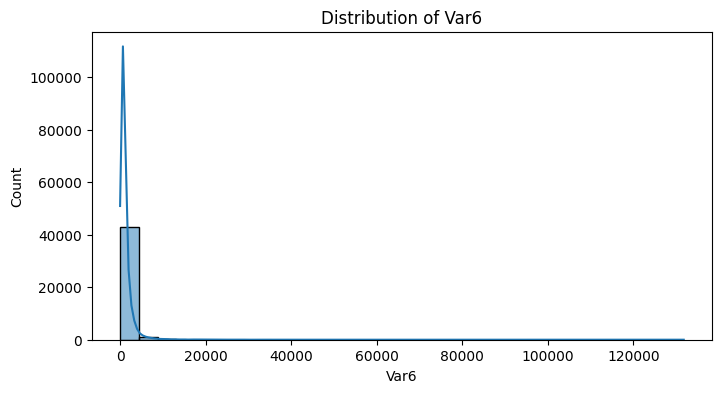

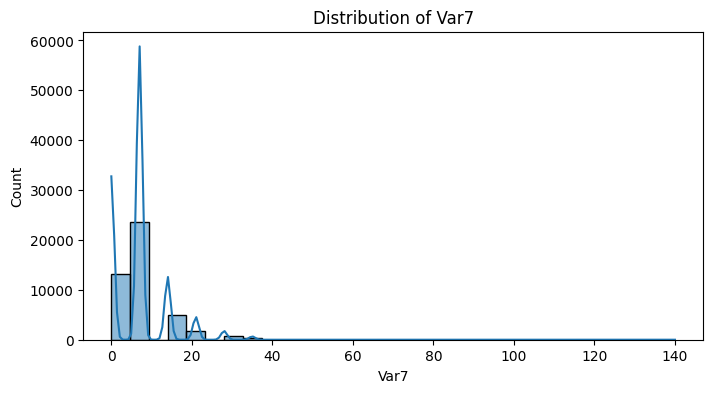

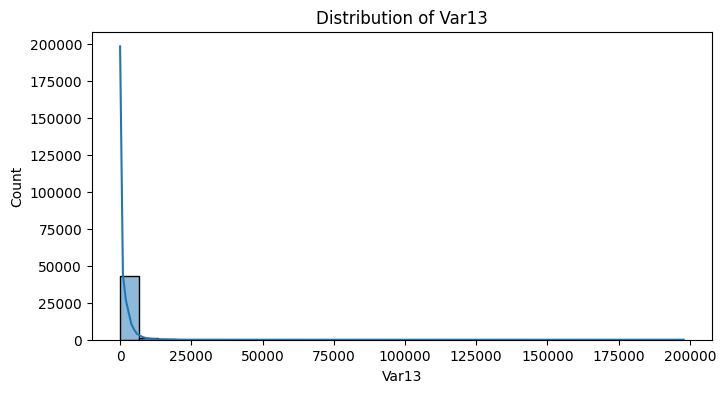

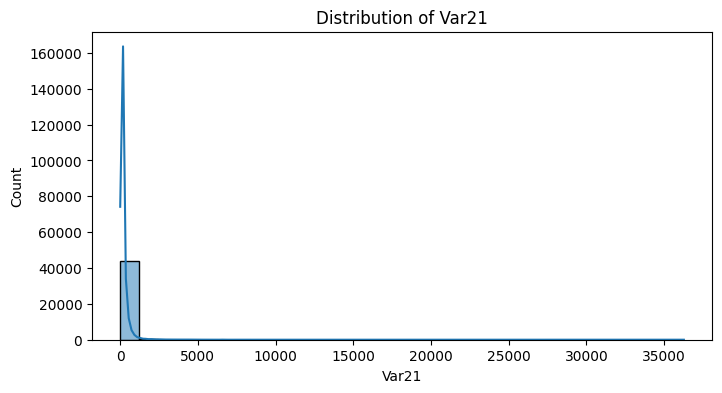

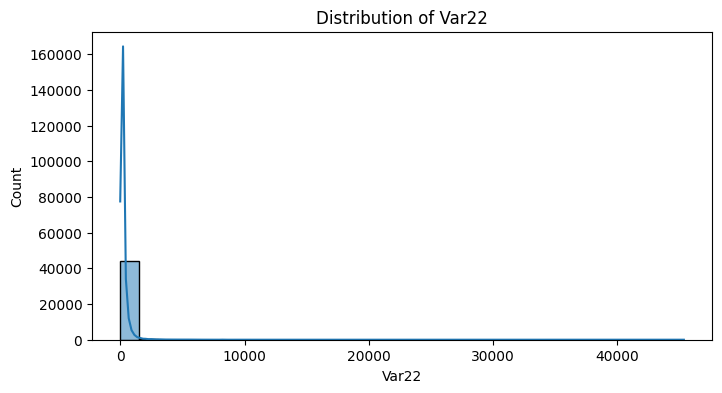

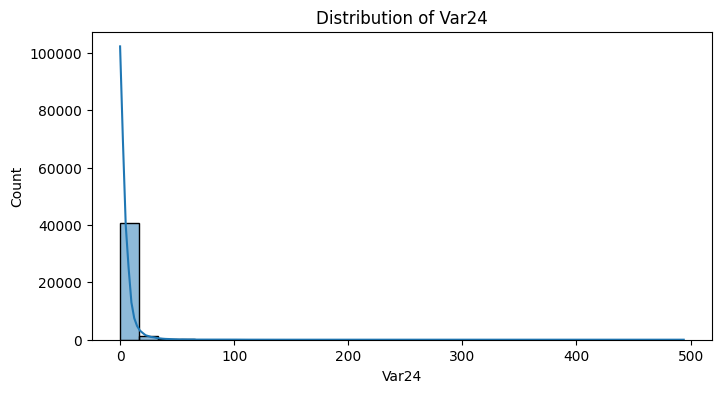

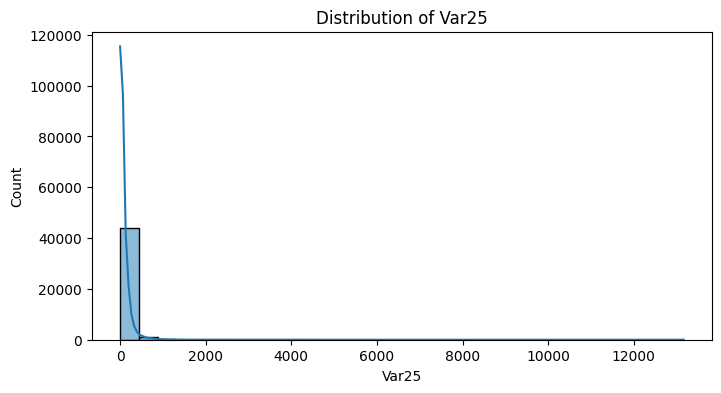

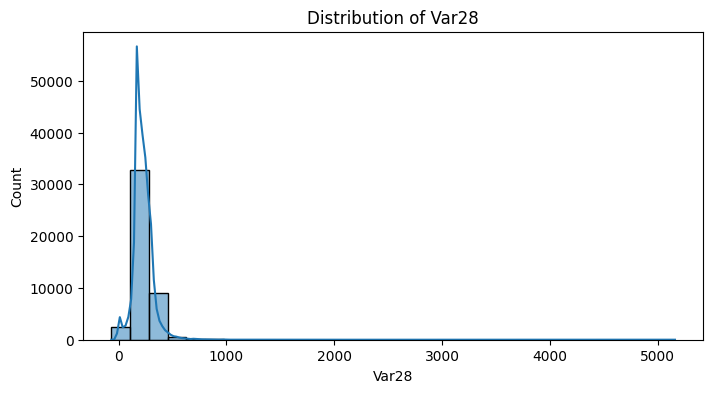

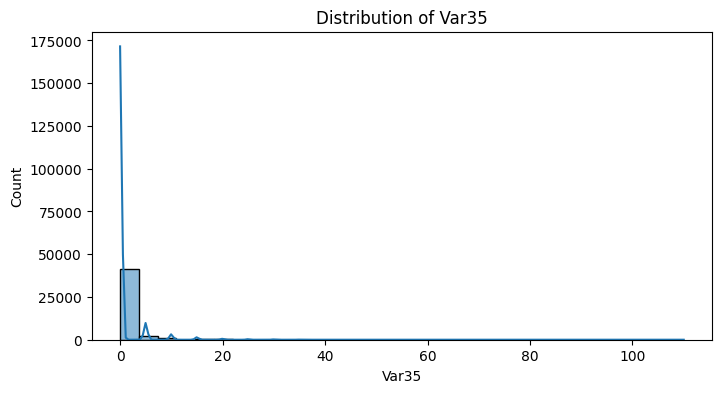

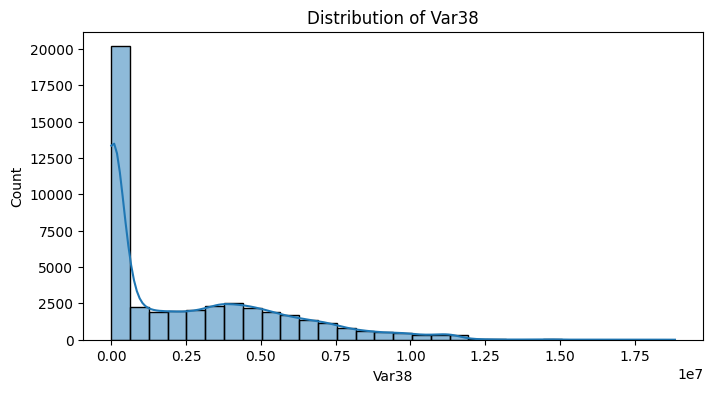

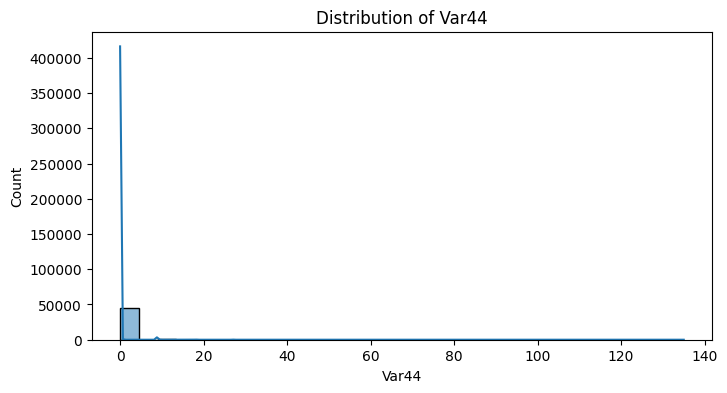

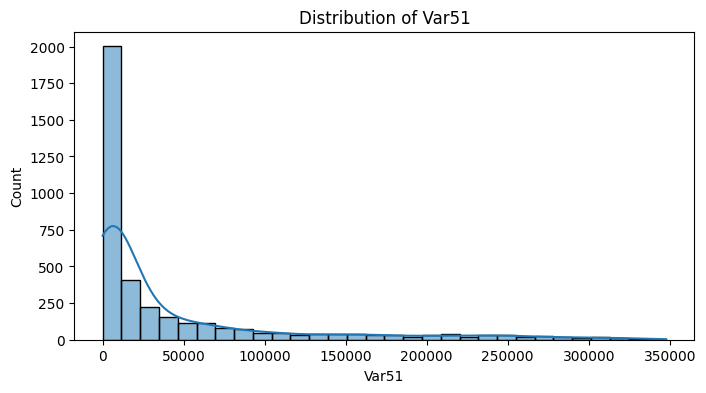

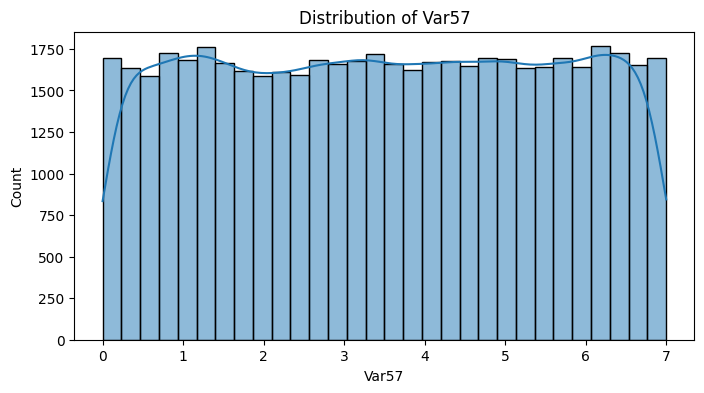

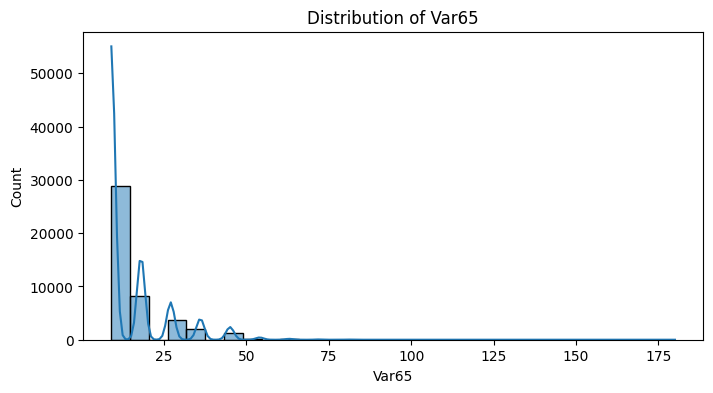

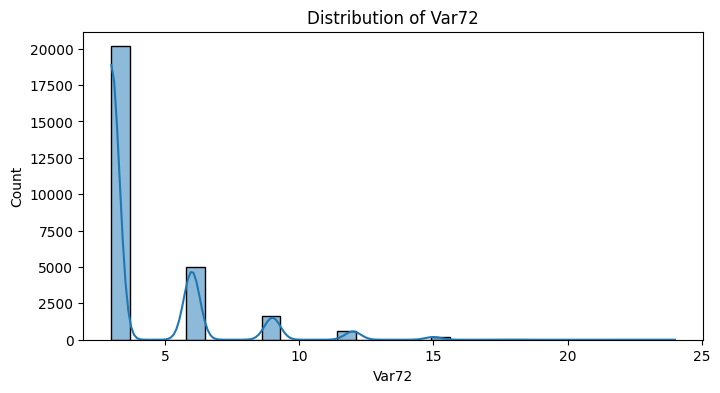

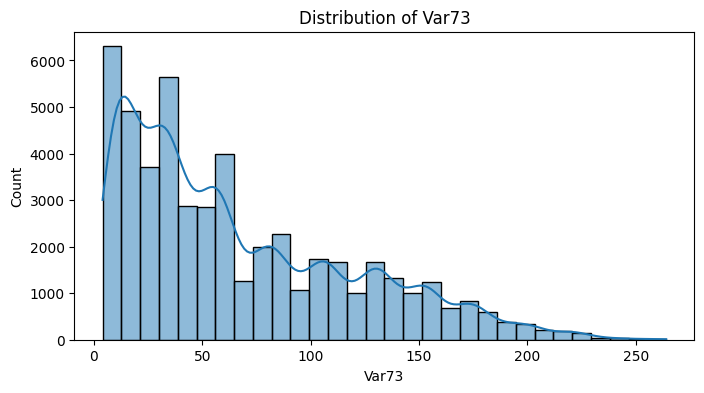

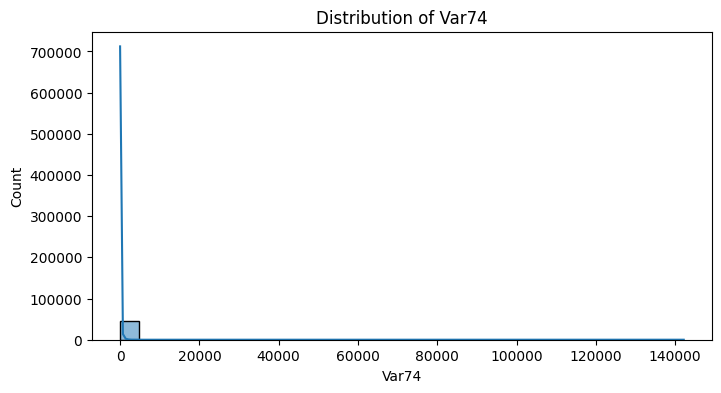

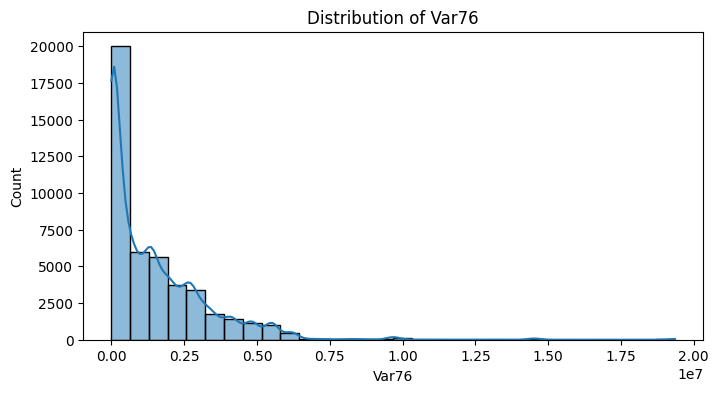

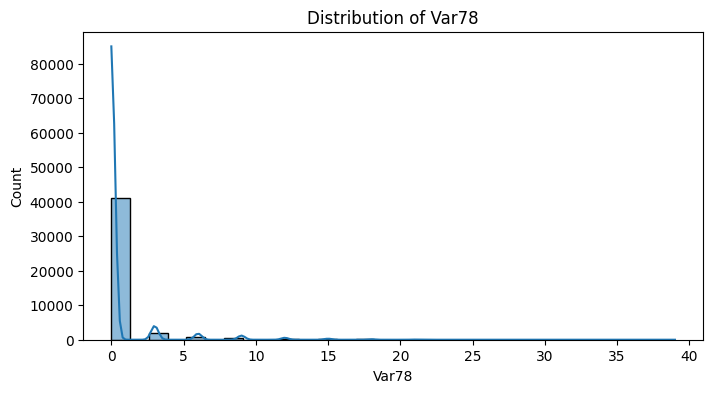

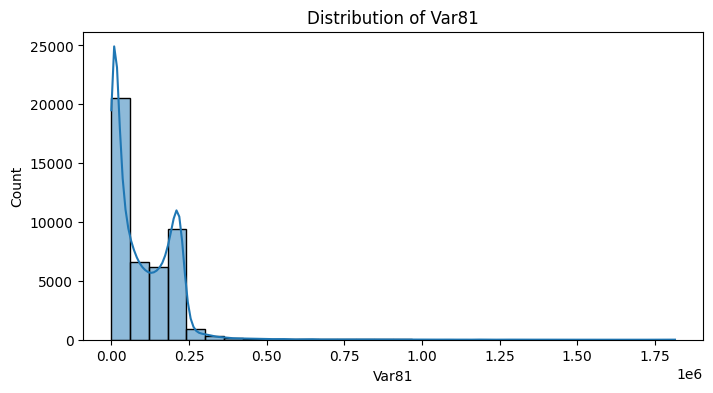

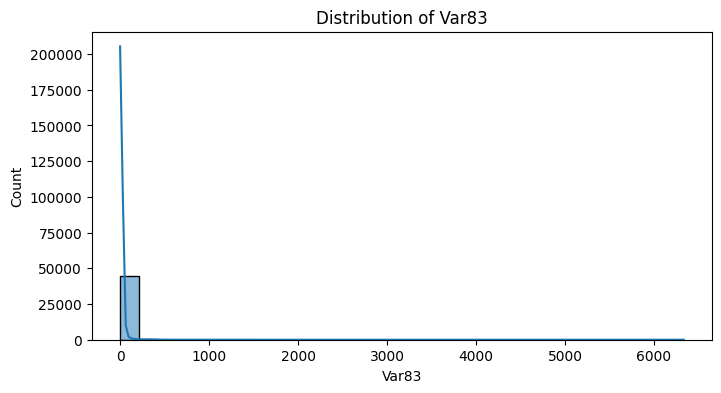

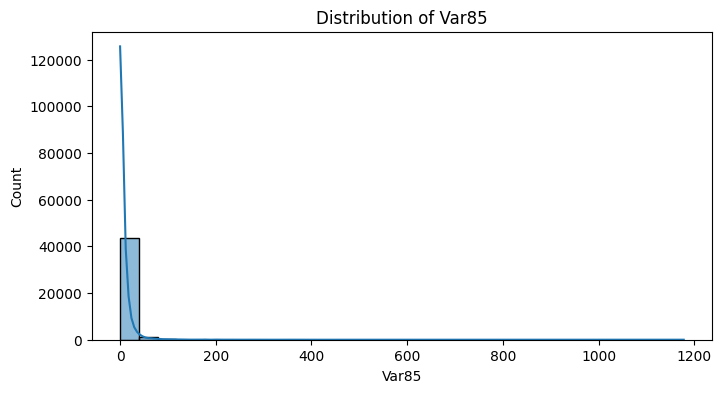

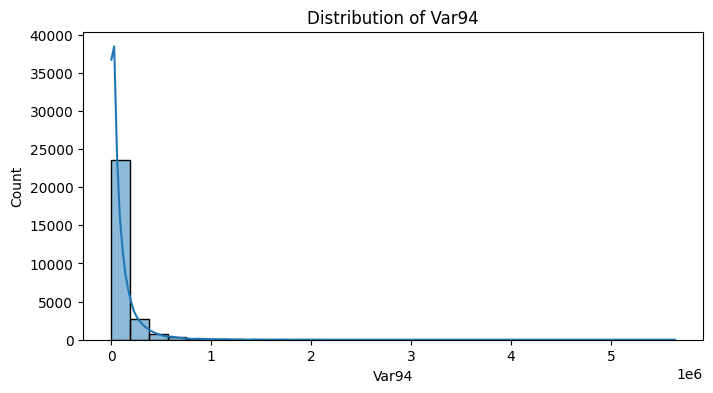

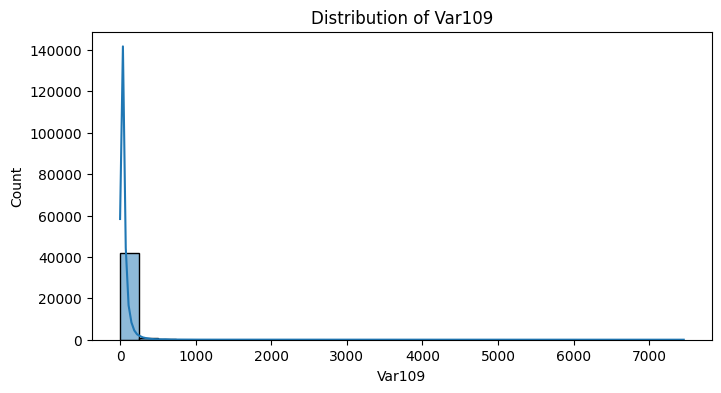

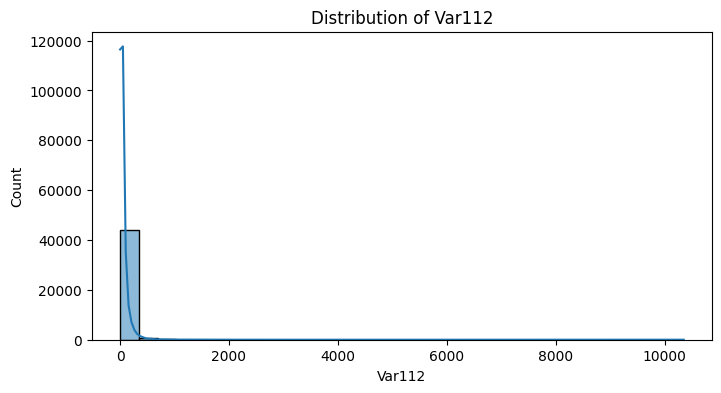

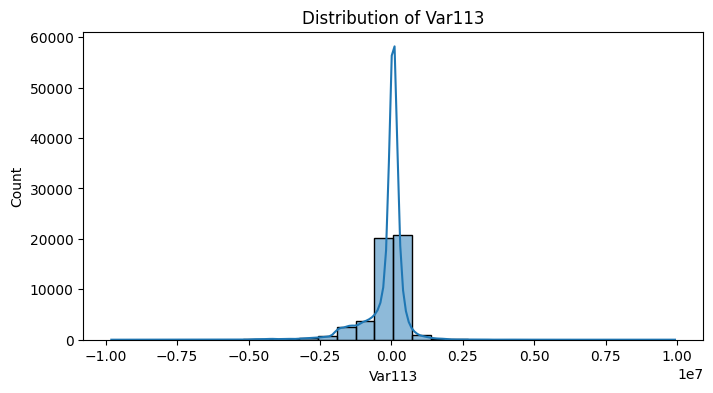

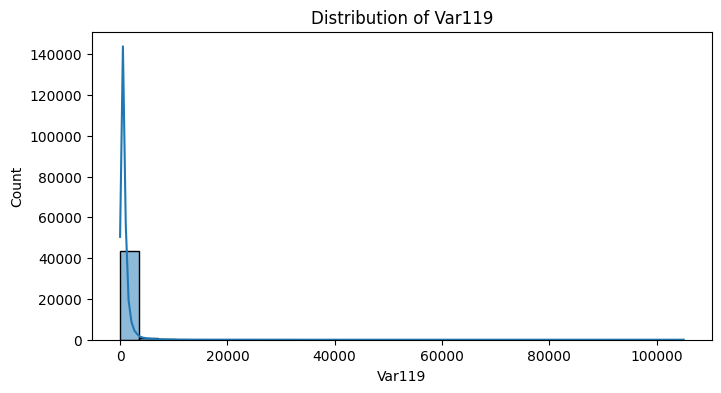

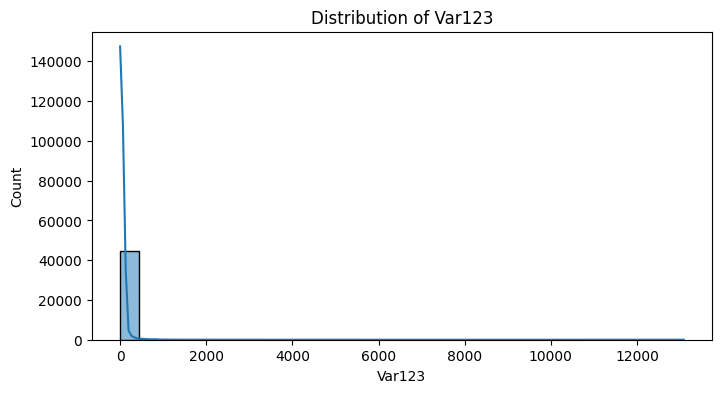

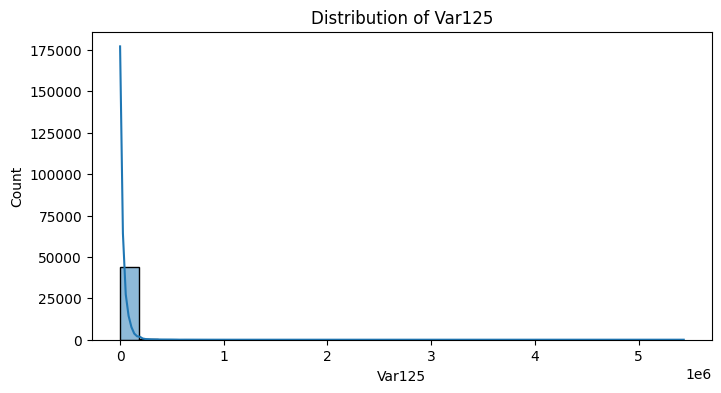

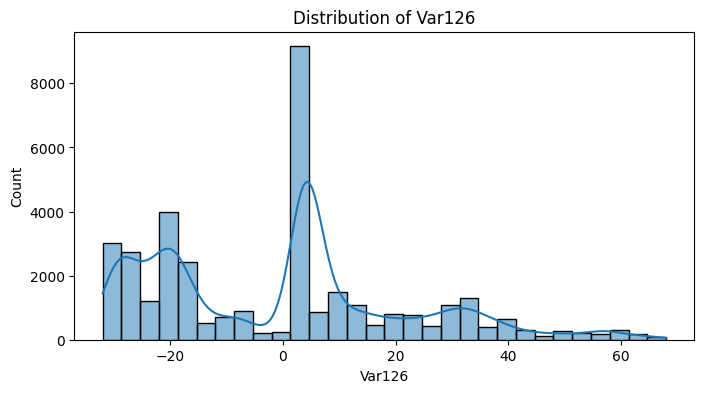

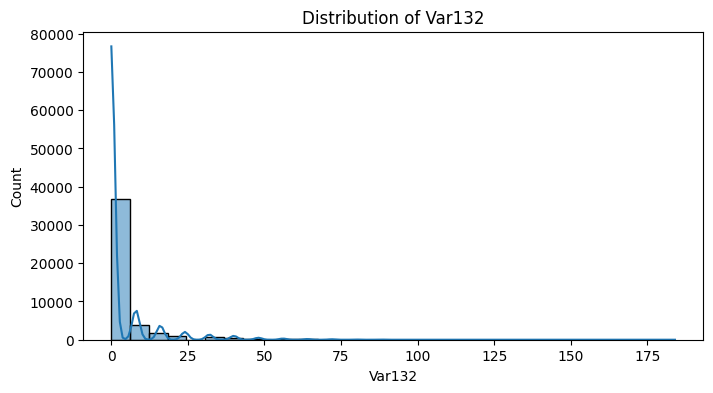

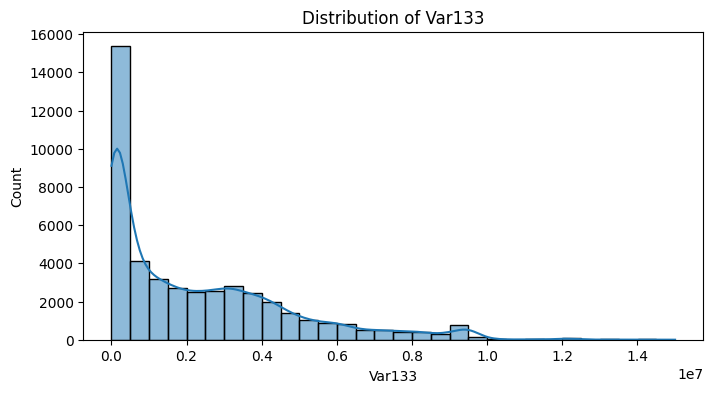

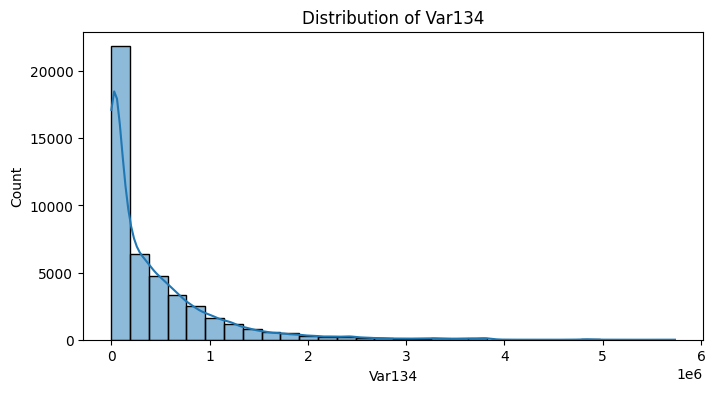

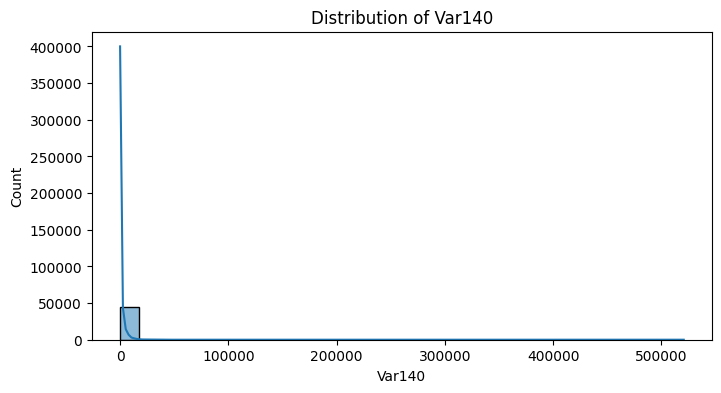

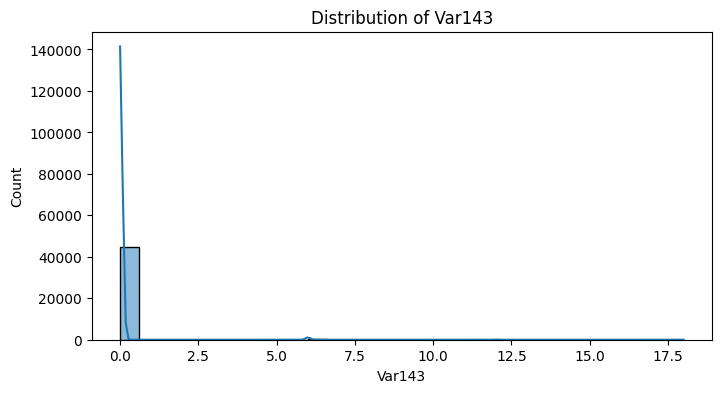

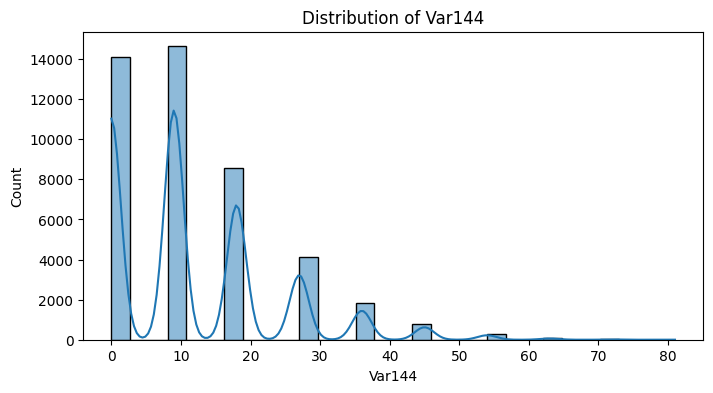

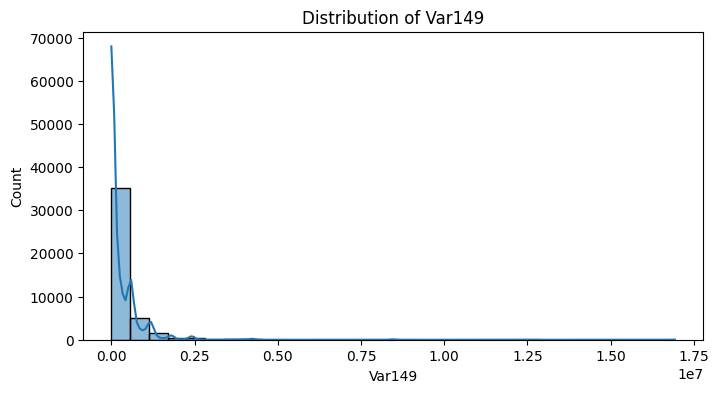

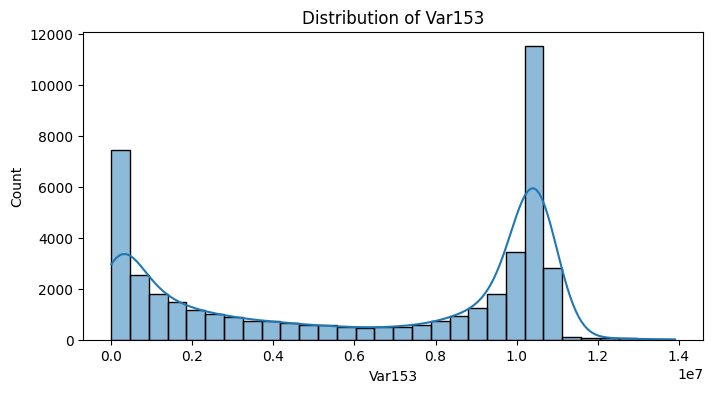

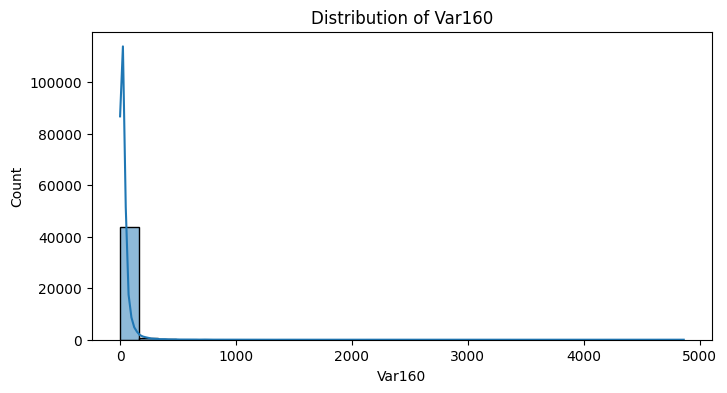

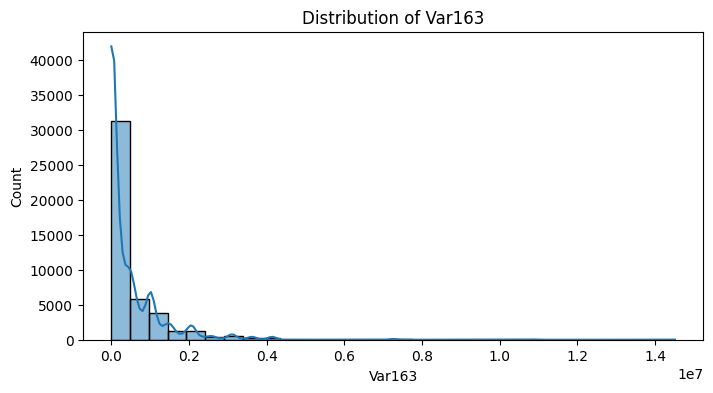

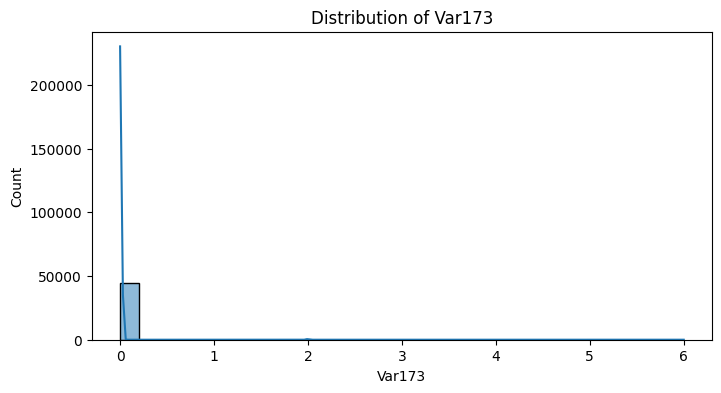

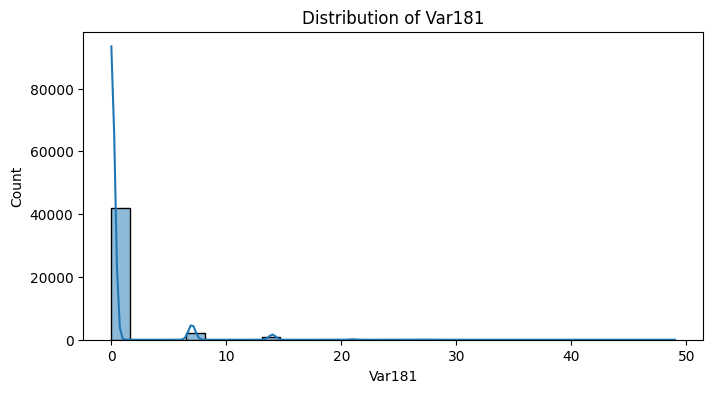

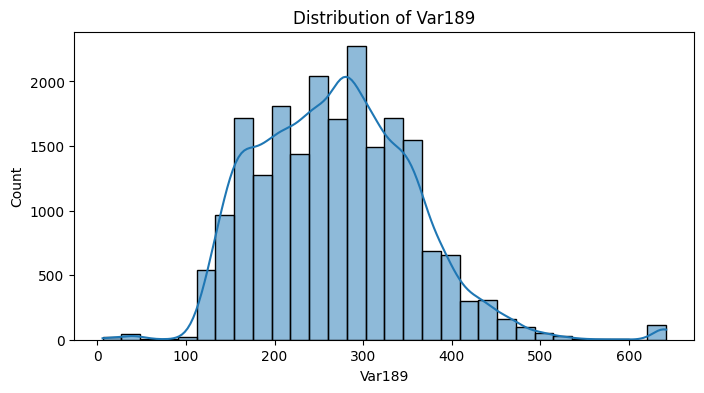

In [13]:
# Histogram for numerical features
for column in X.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

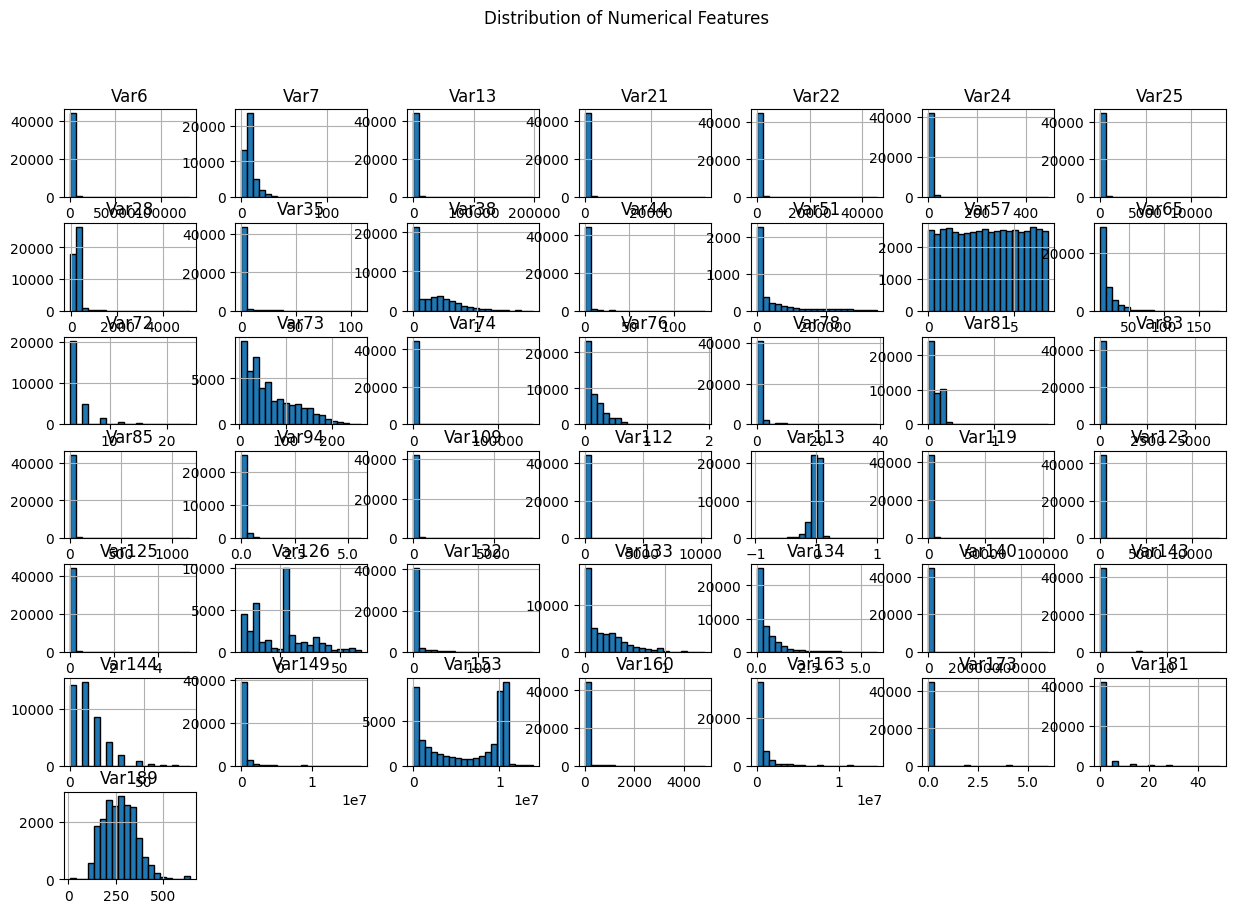

In [14]:
# Plot histograms for numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
X[numerical_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

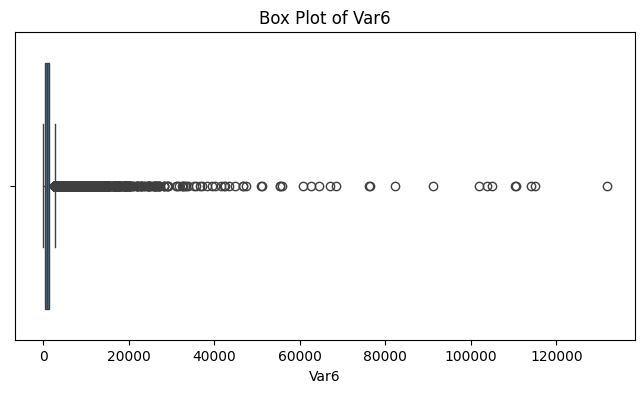

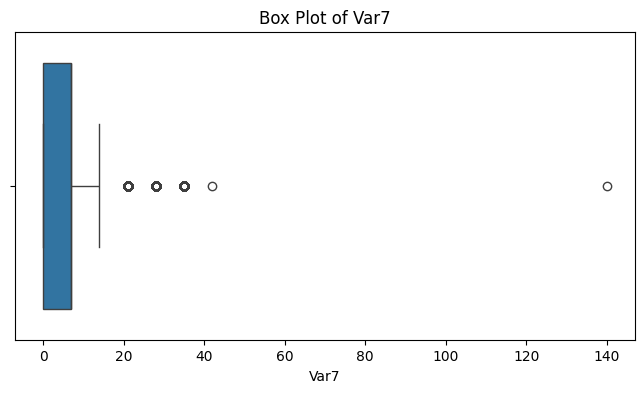

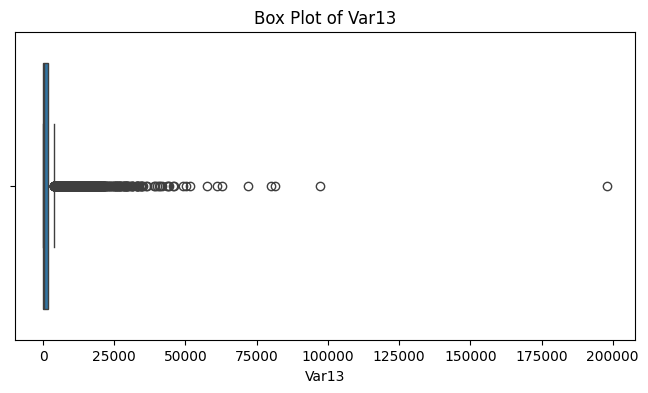

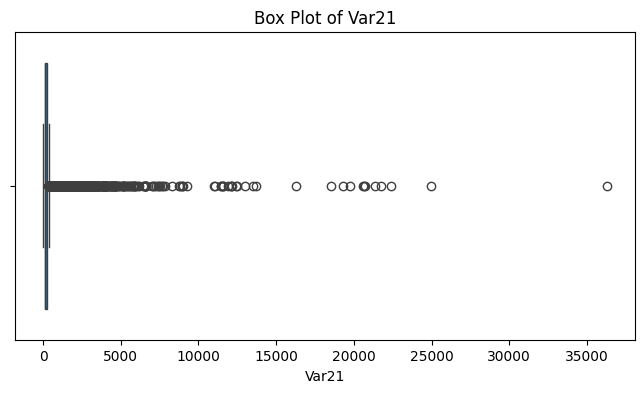

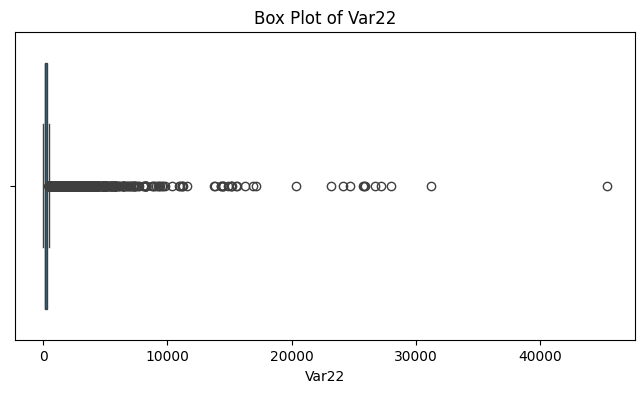

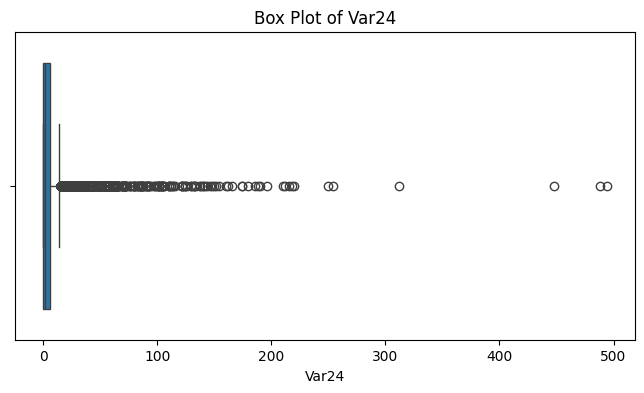

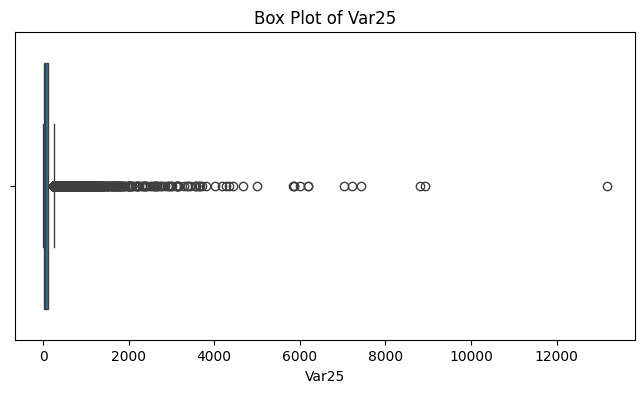

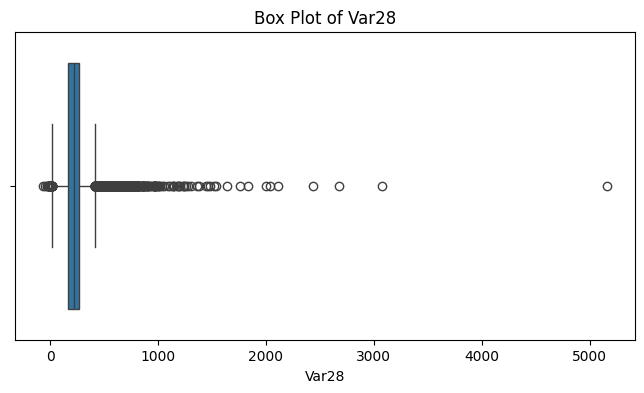

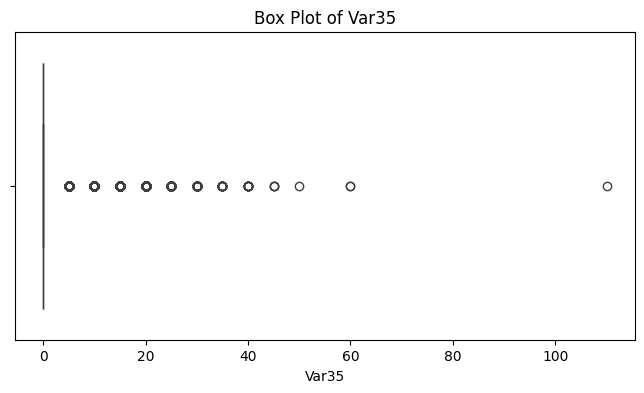

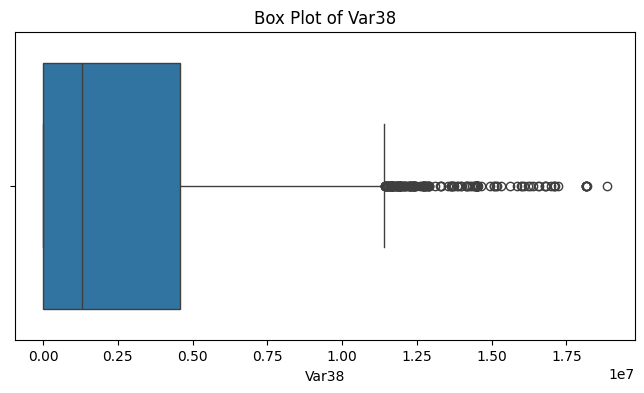

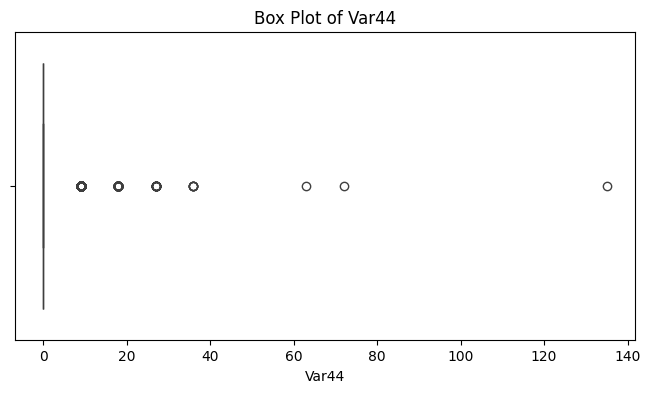

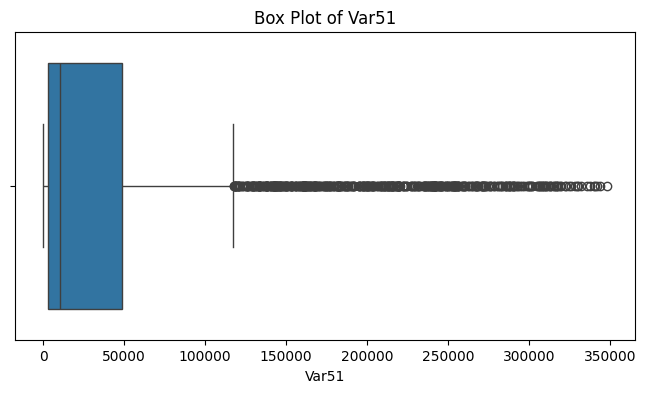

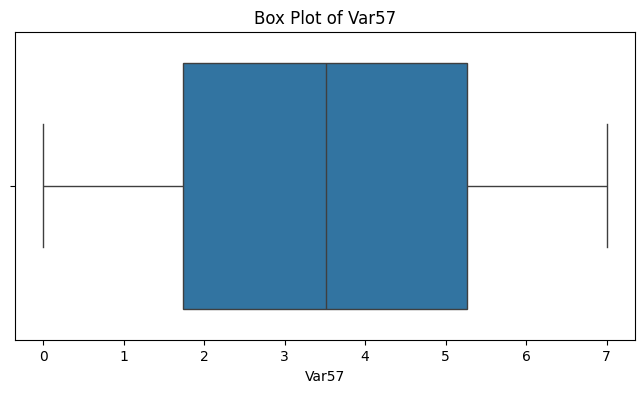

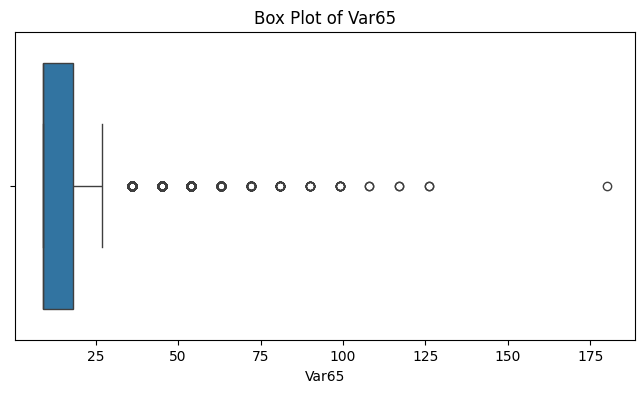

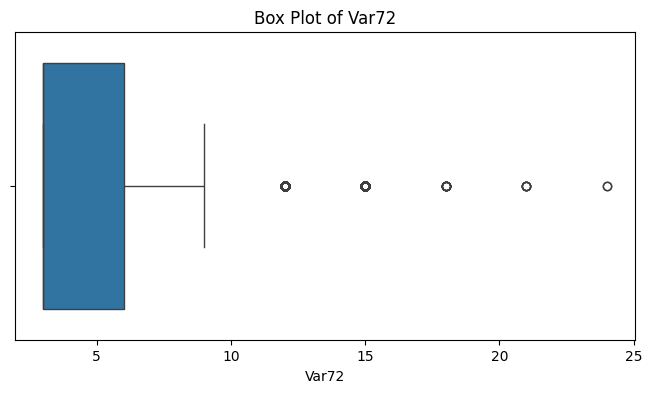

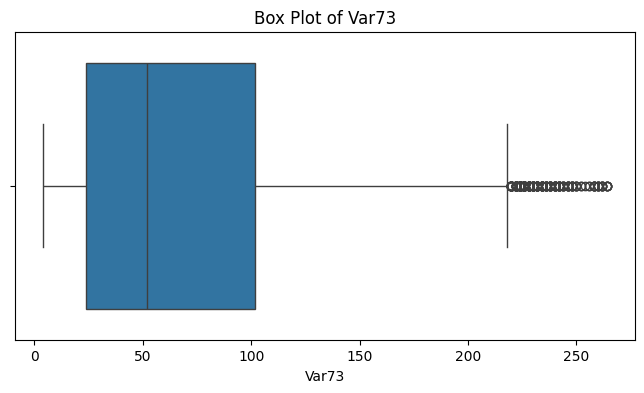

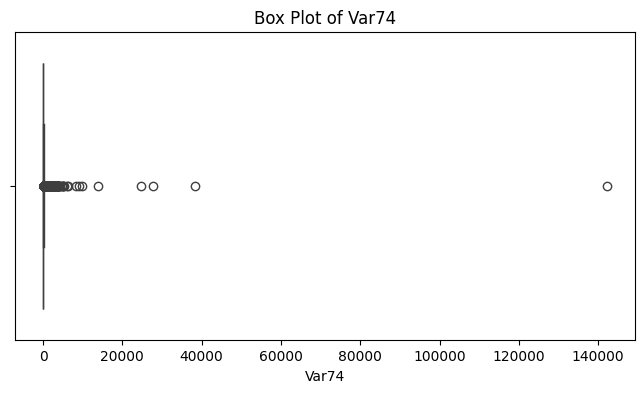

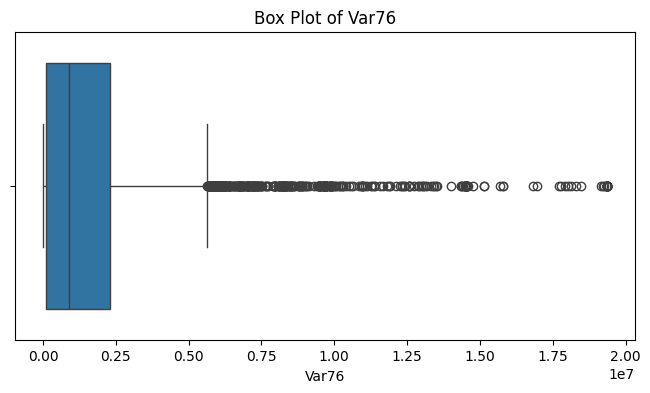

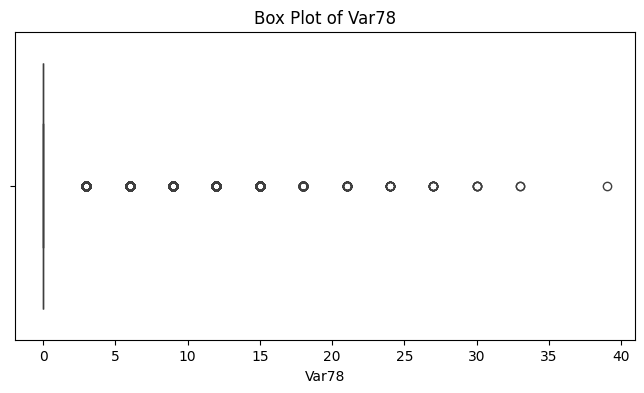

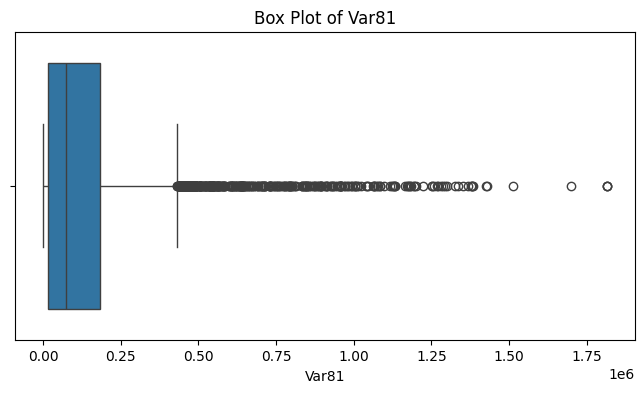

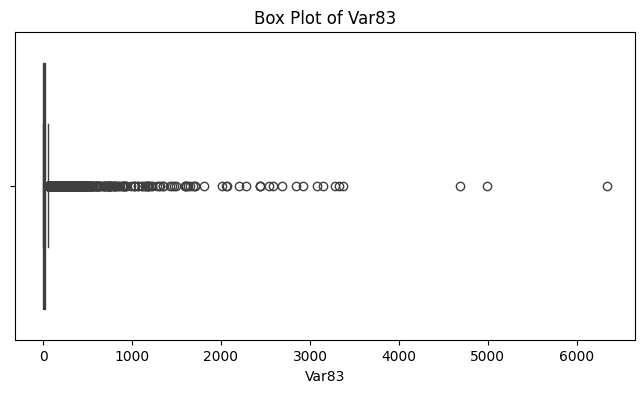

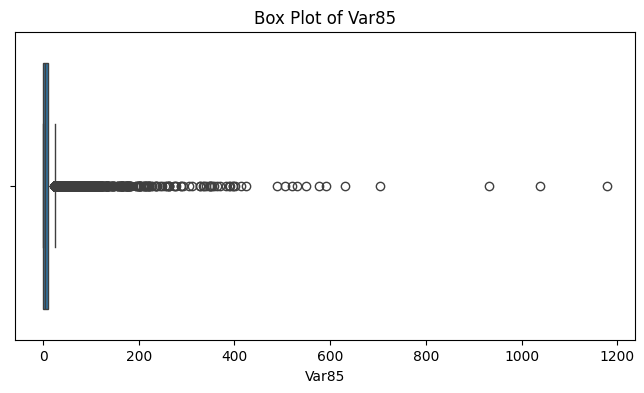

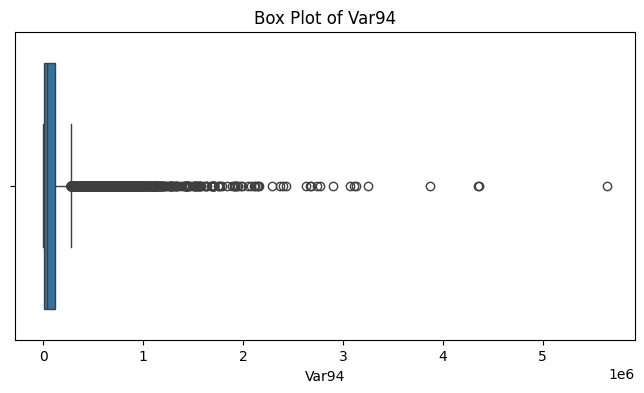

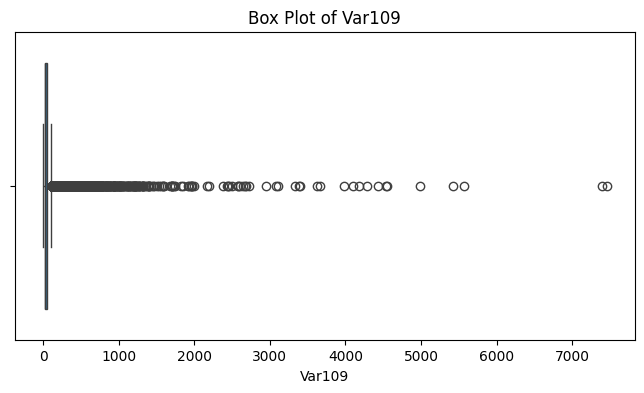

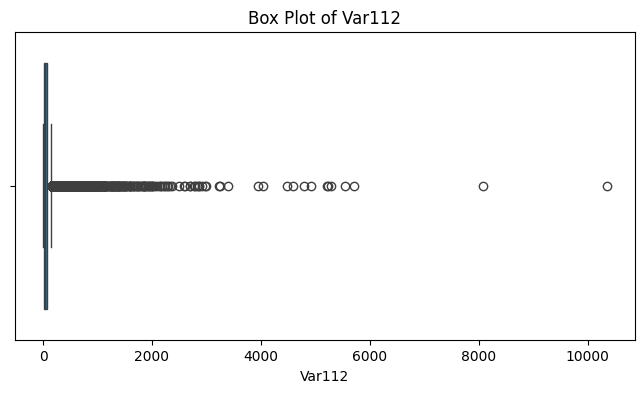

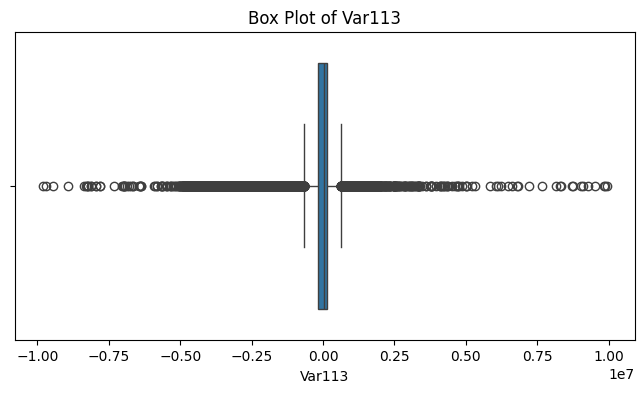

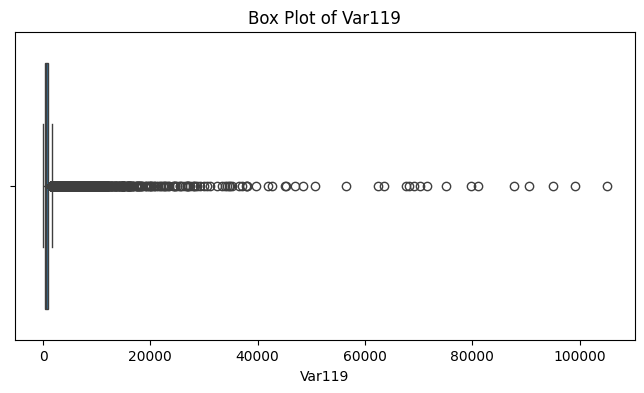

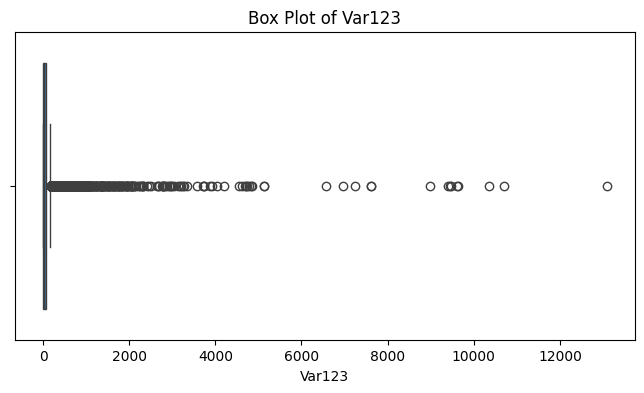

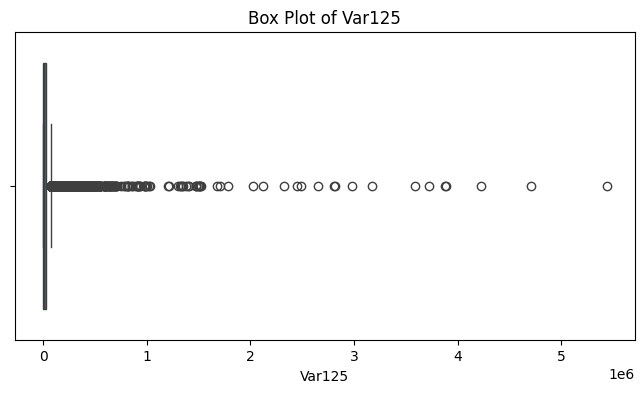

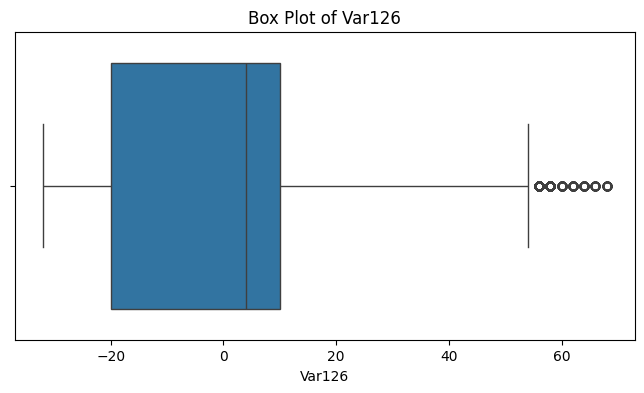

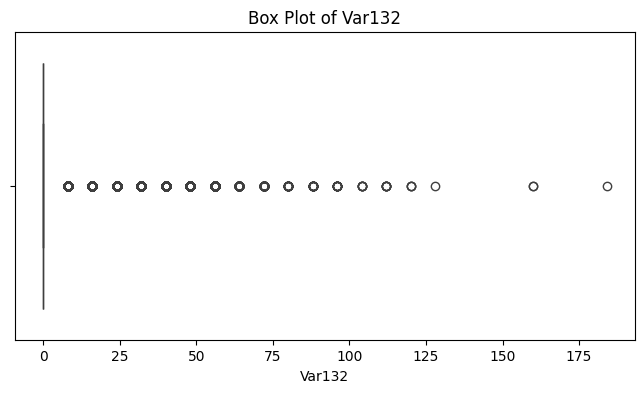

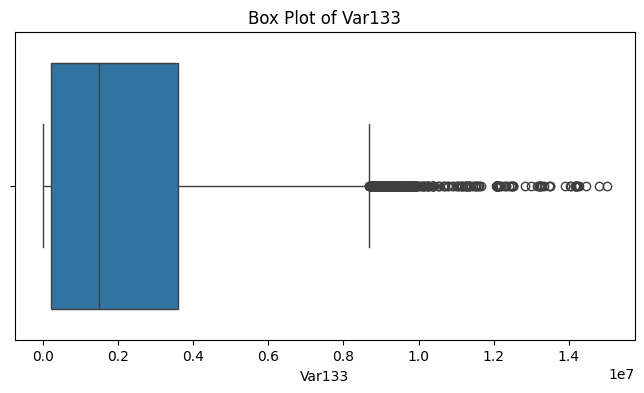

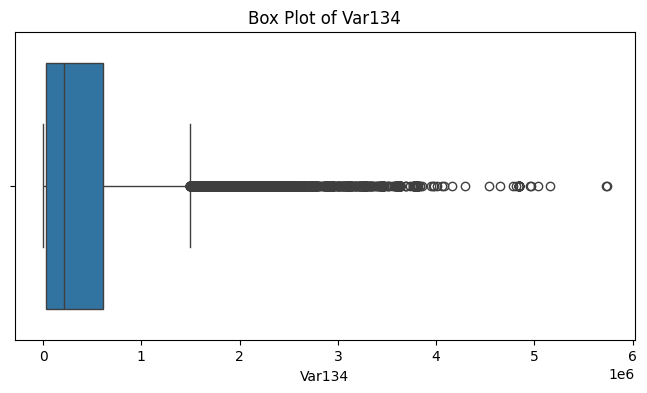

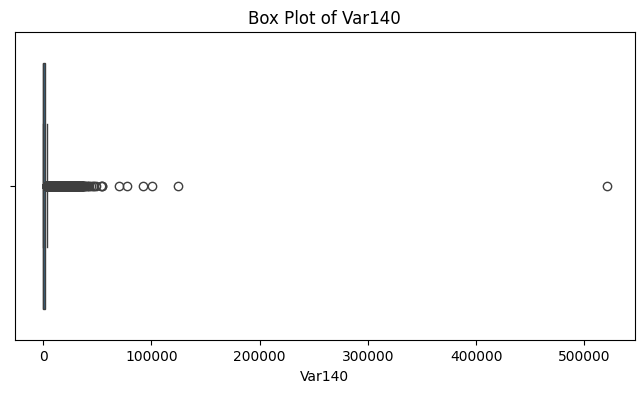

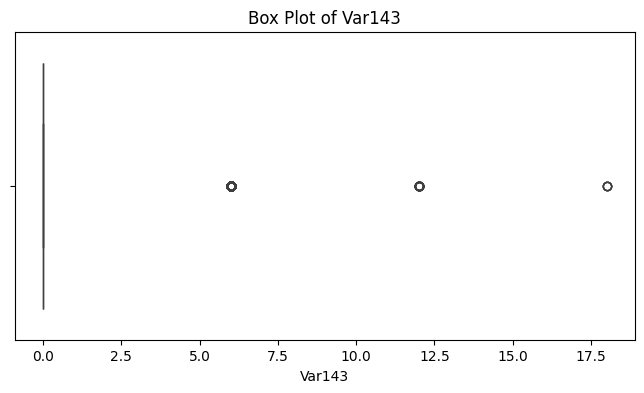

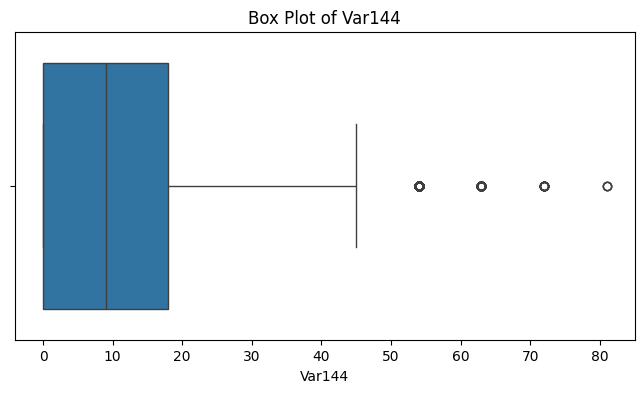

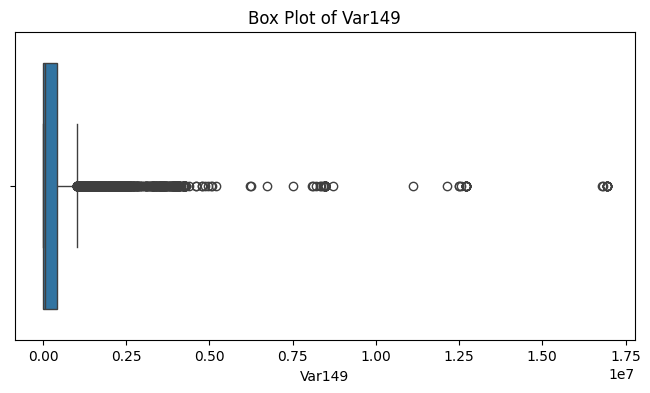

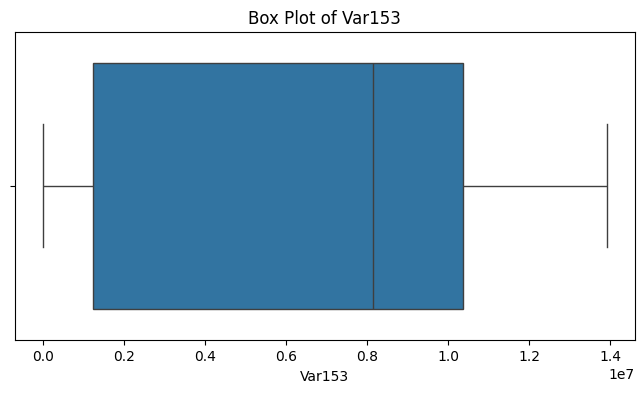

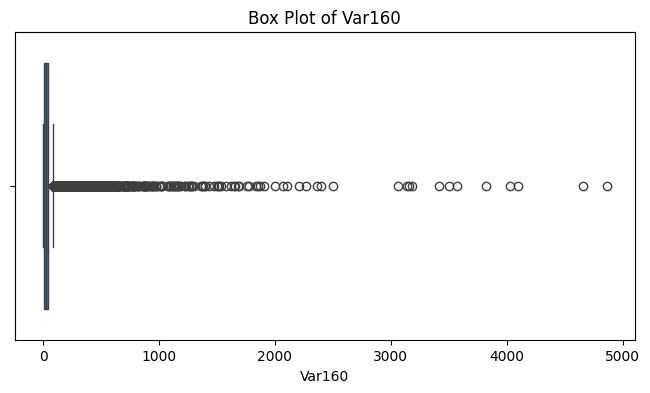

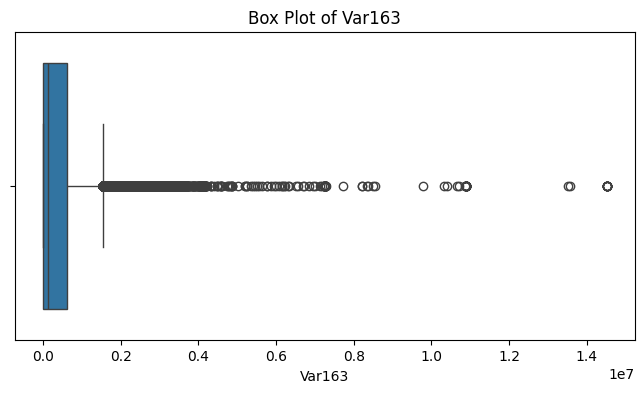

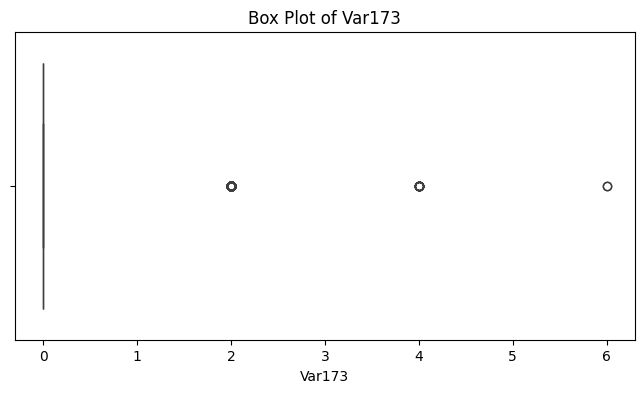

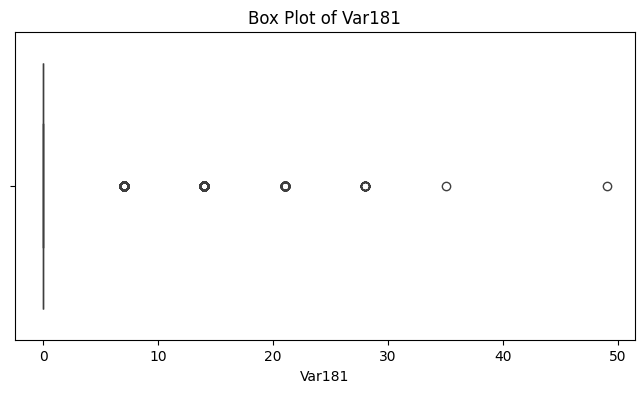

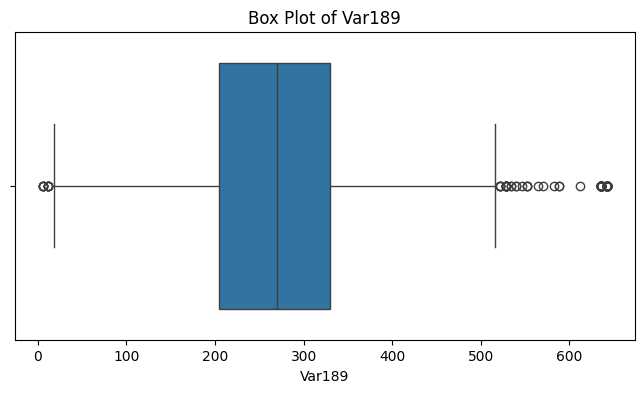

In [18]:
# Box plot for numerical features
for column in X.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

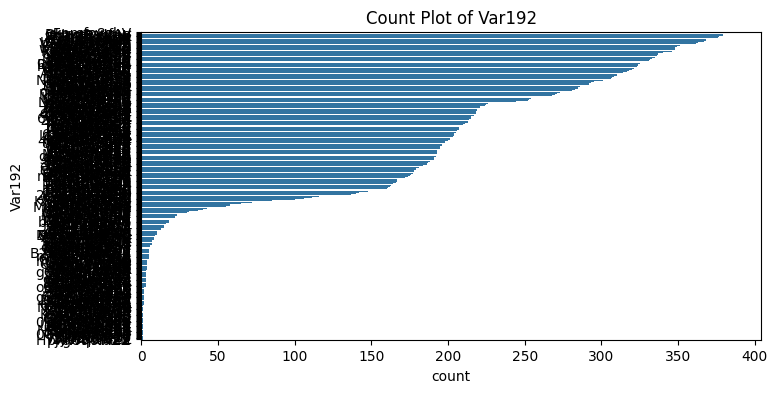

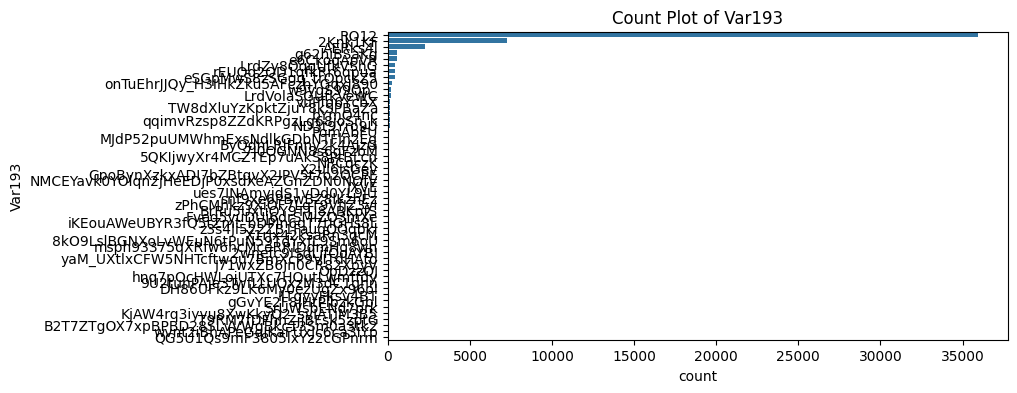

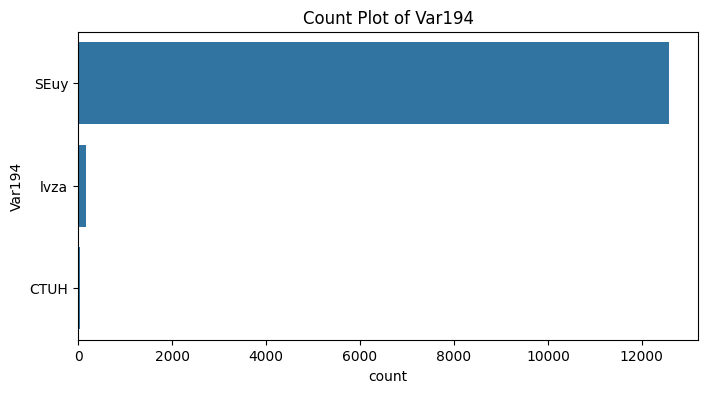

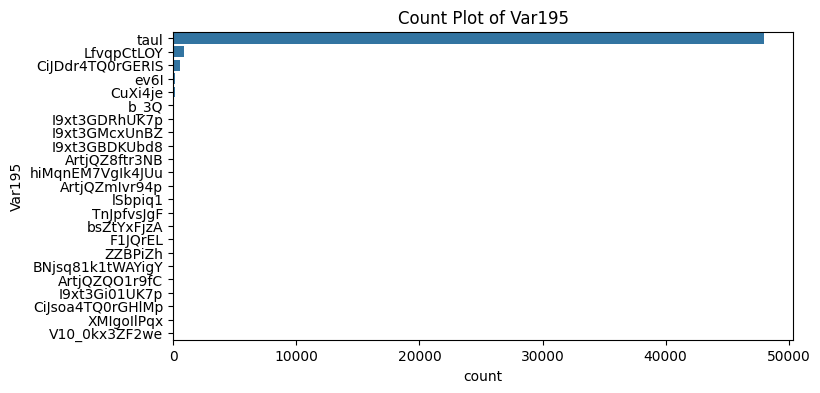

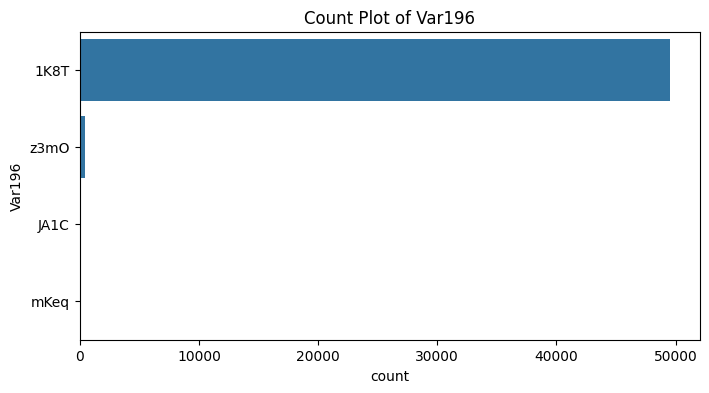

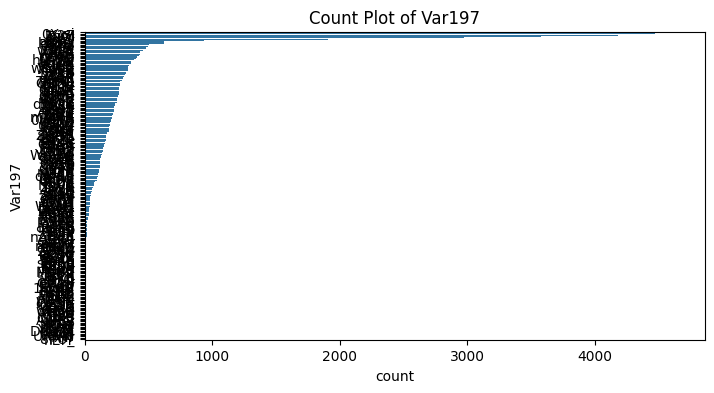

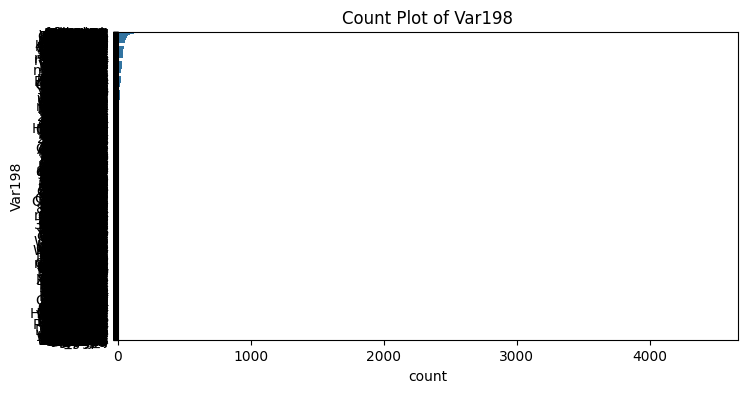

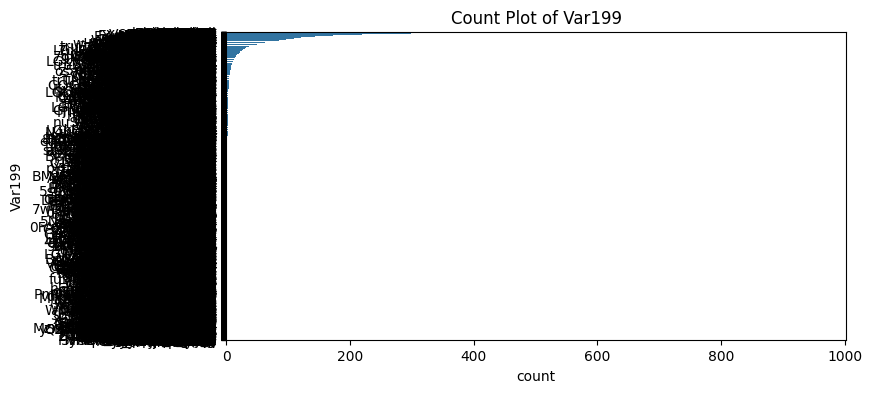

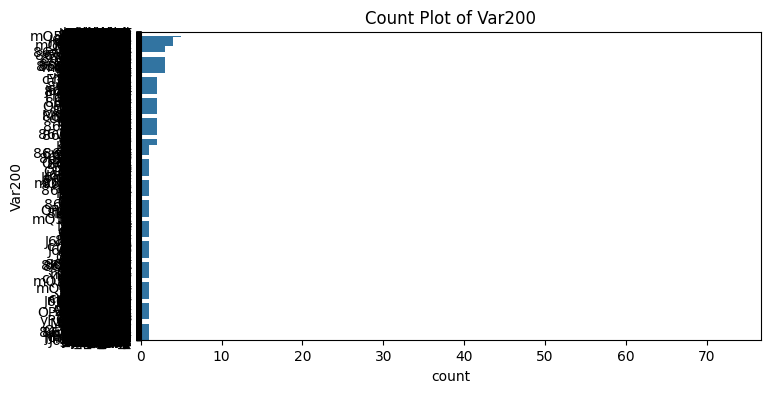

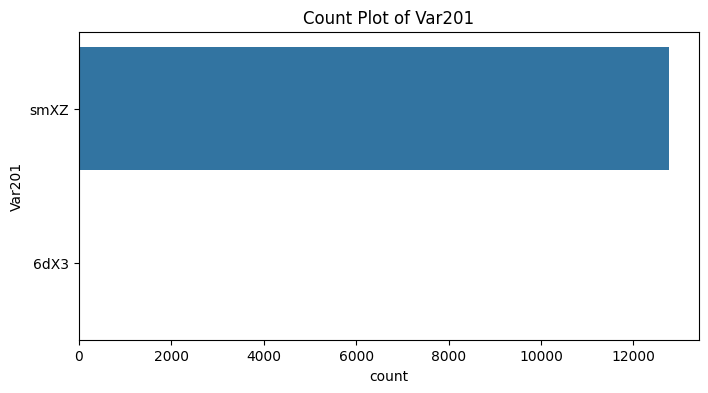

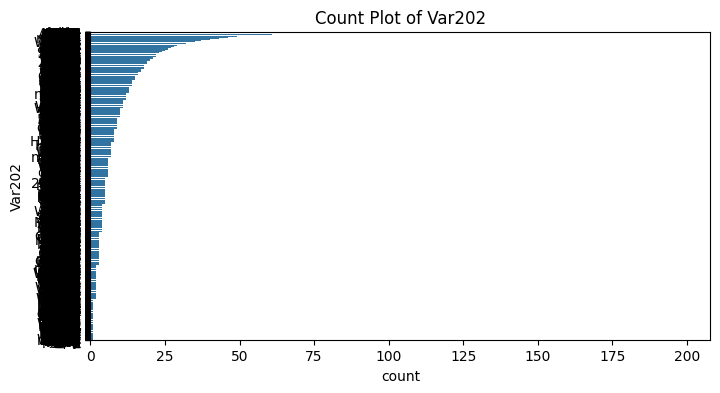

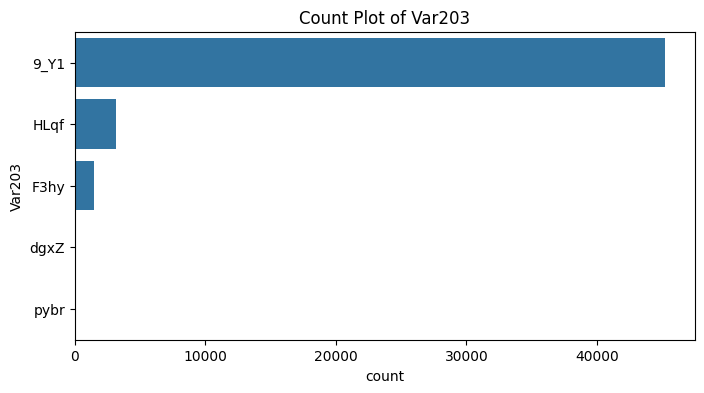

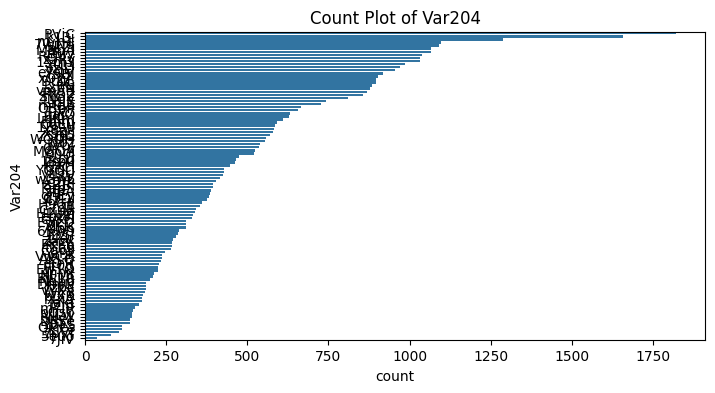

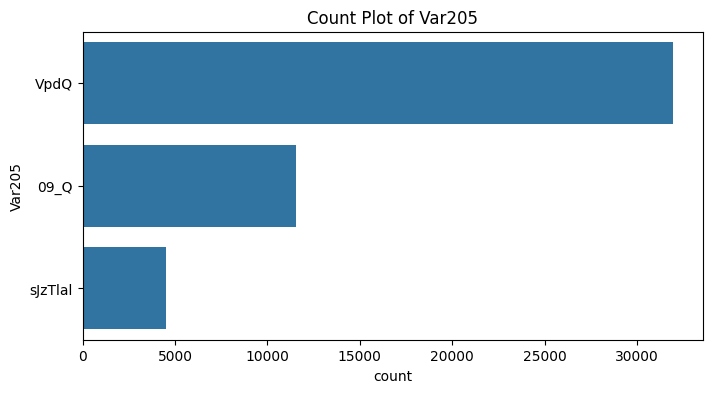

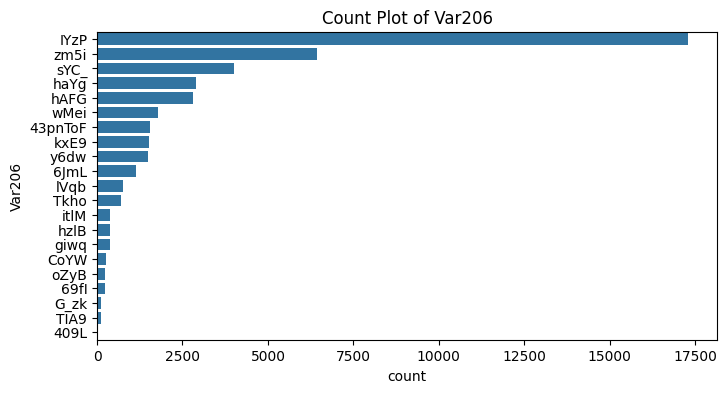

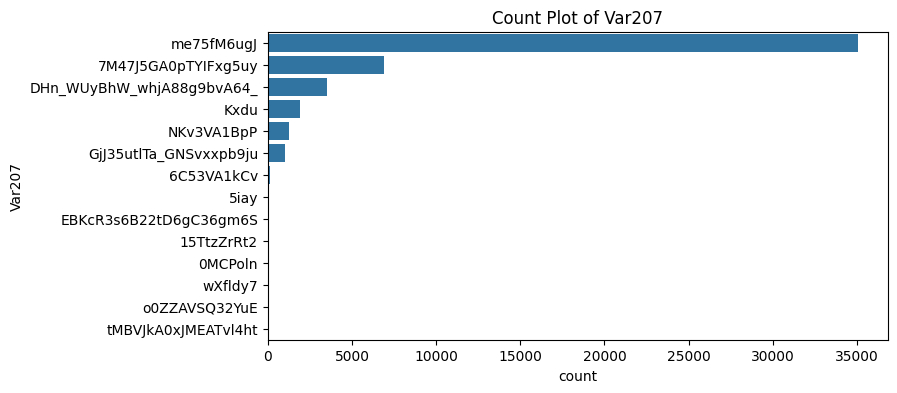

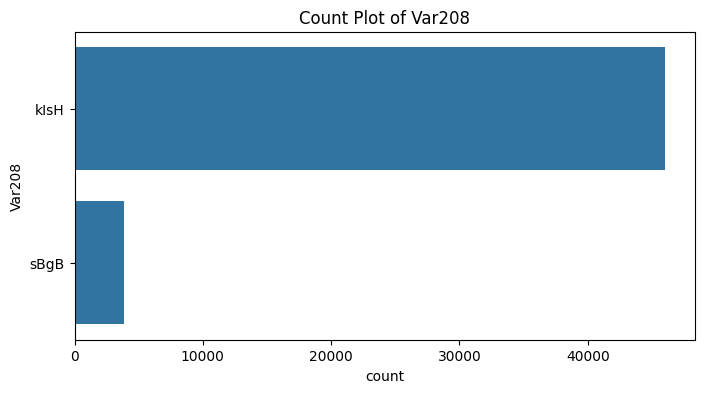

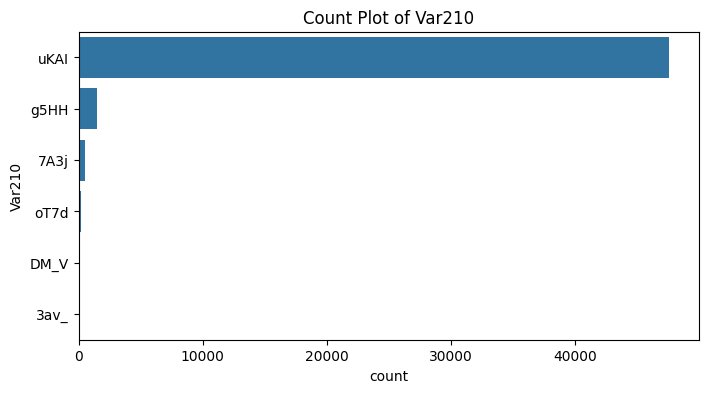

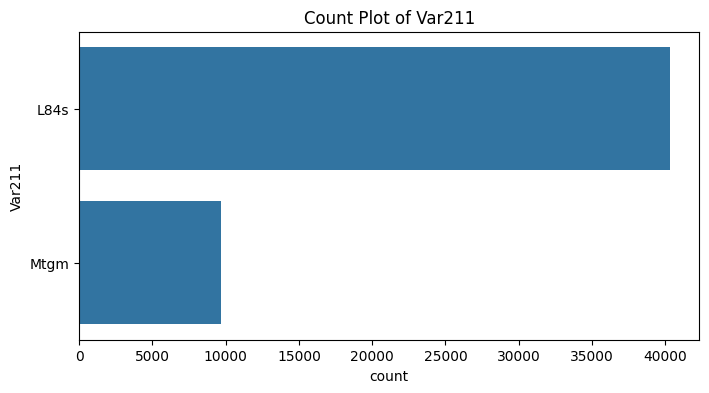

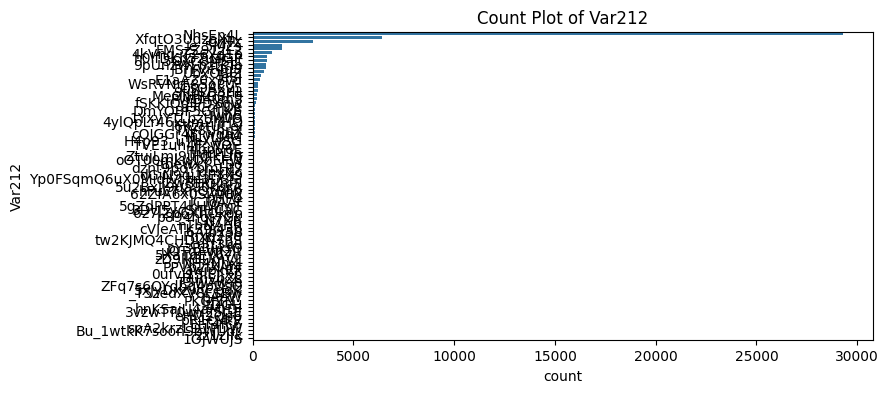

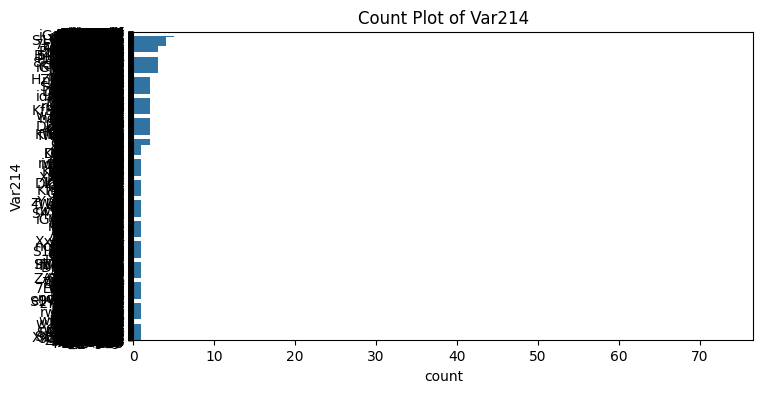

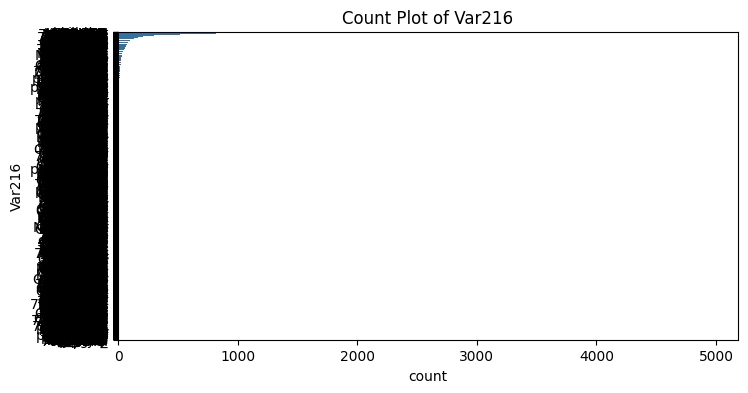

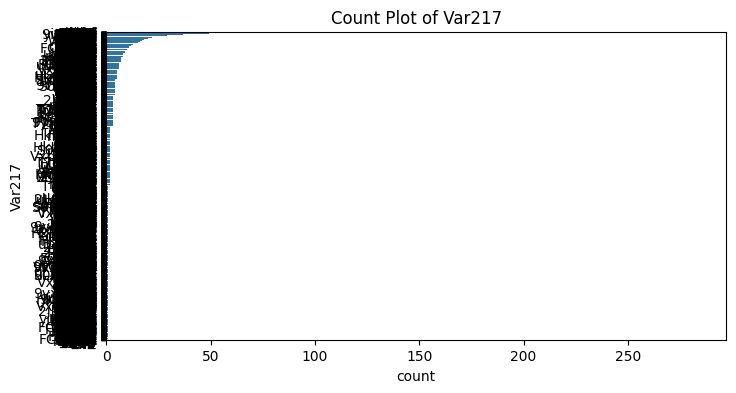

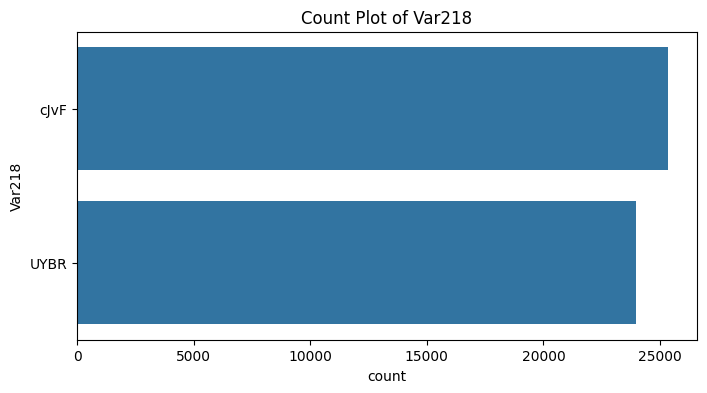

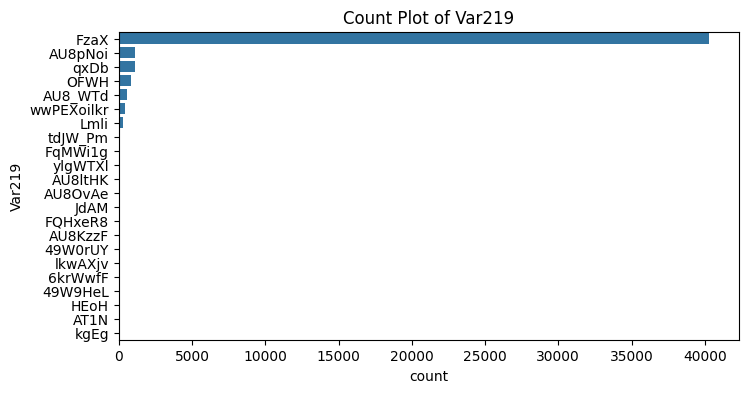

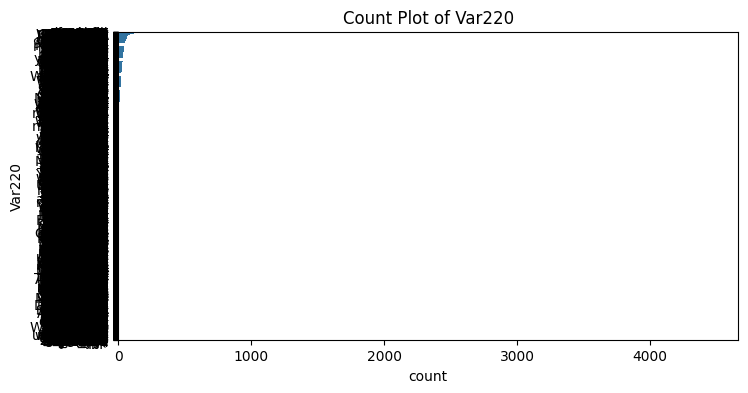

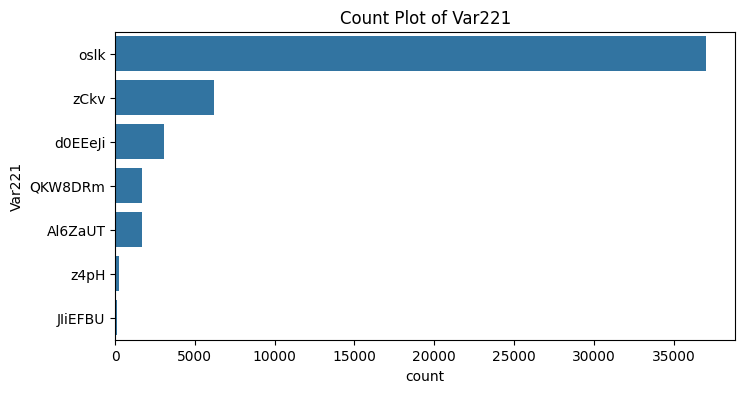

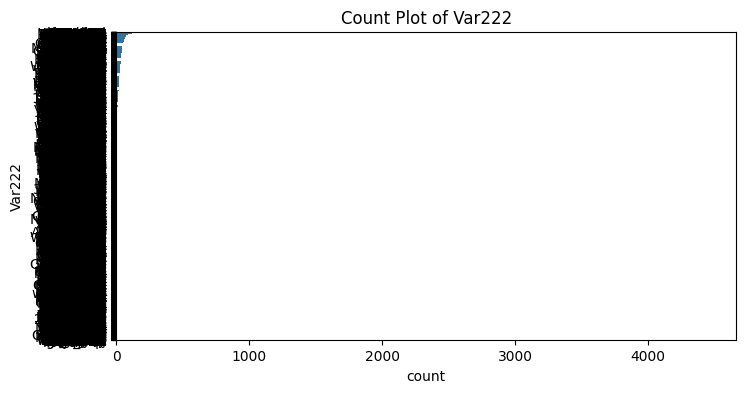

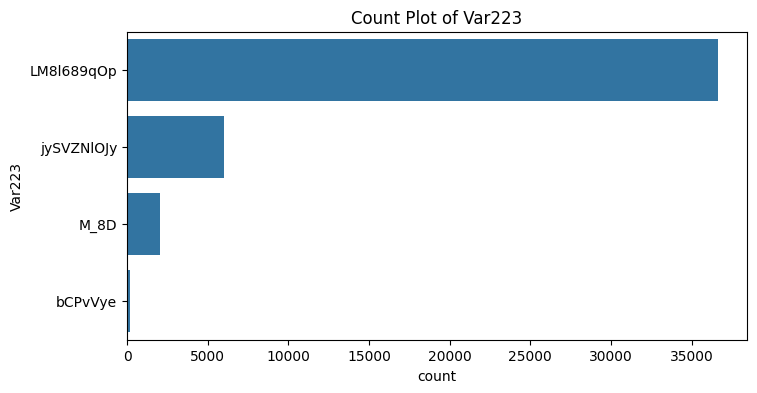

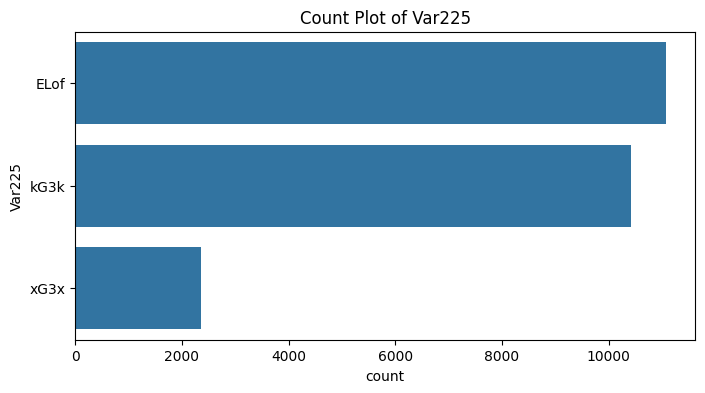

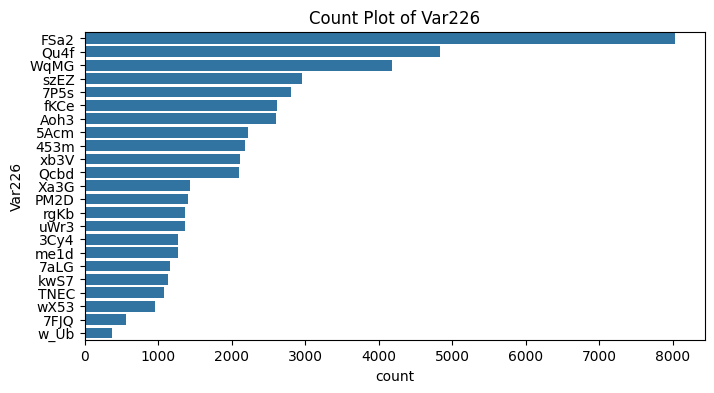

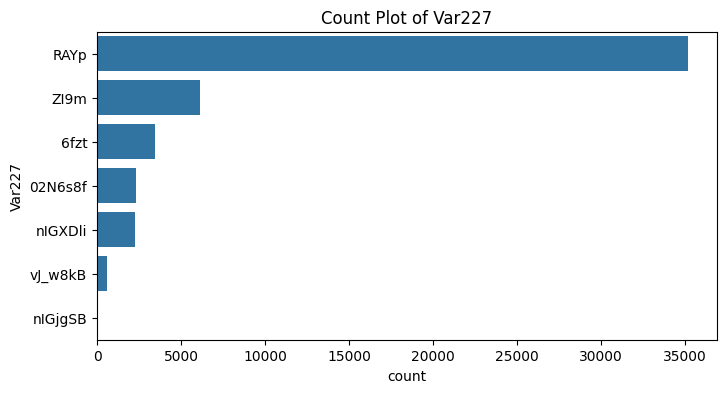

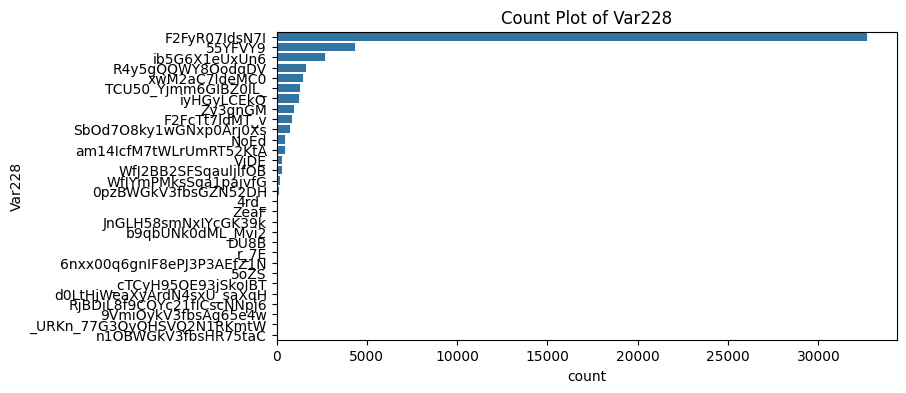

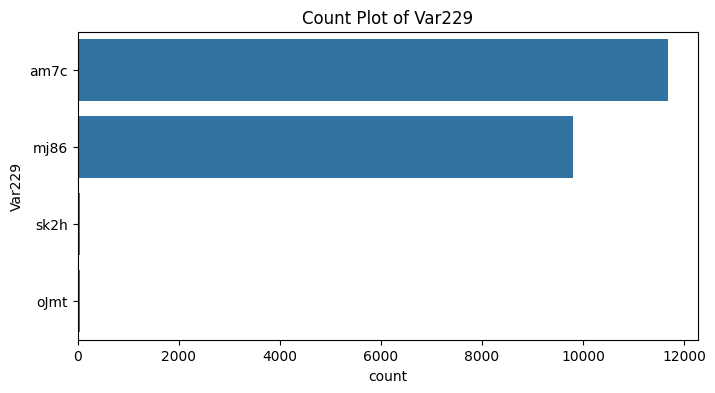

In [19]:
# Count plot for categorical features
for column in X.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=X[column], order=X[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()

# Bivariate Analysis


In [20]:
# # Scatter plot for numerical features
# sns.pairplot(X.select_dtypes(include='number'))
# plt.show()


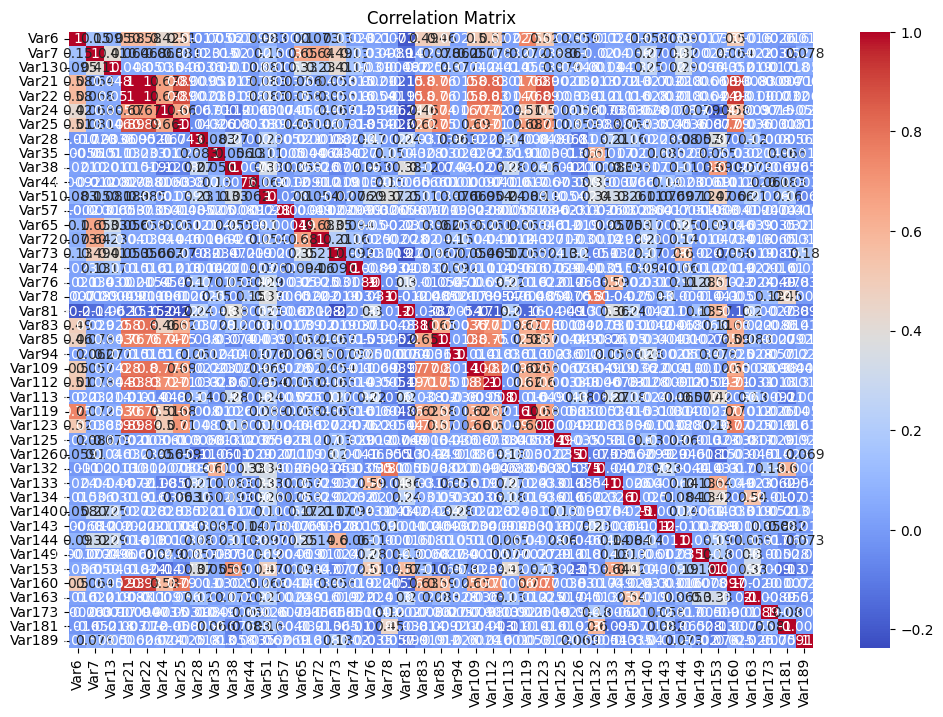

In [21]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

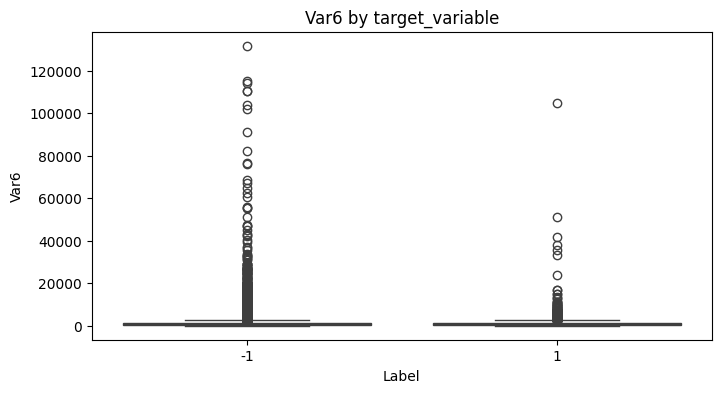

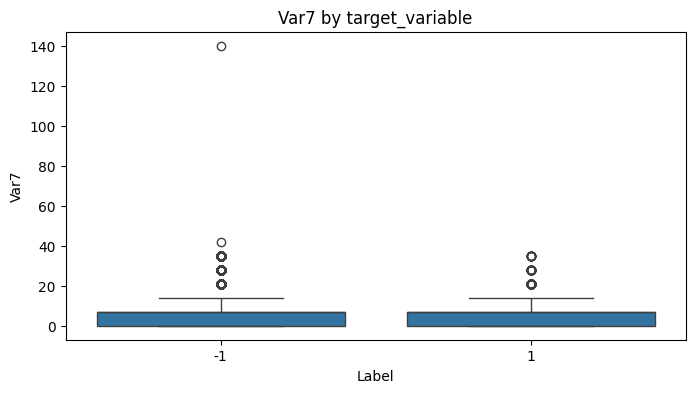

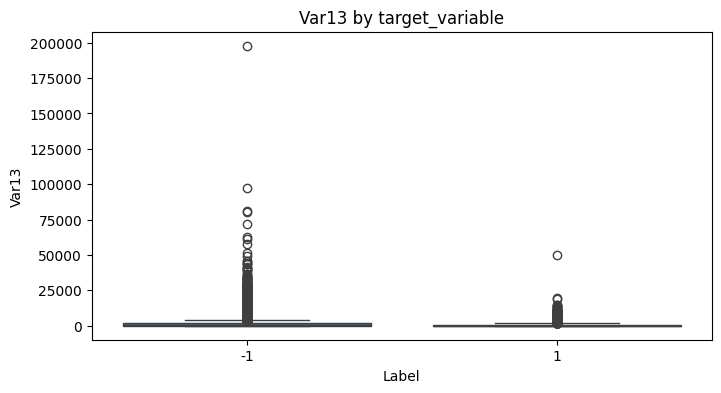

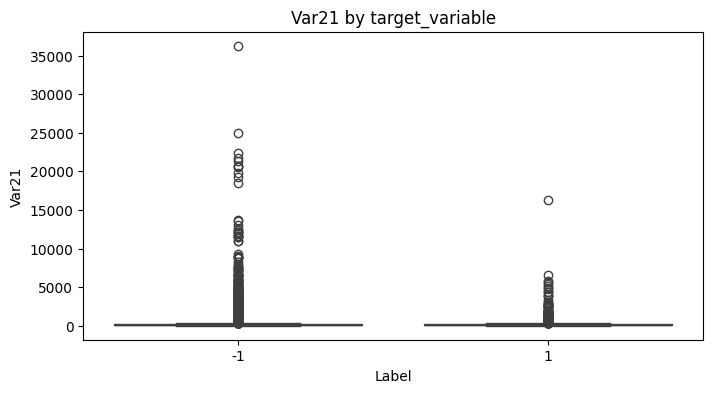

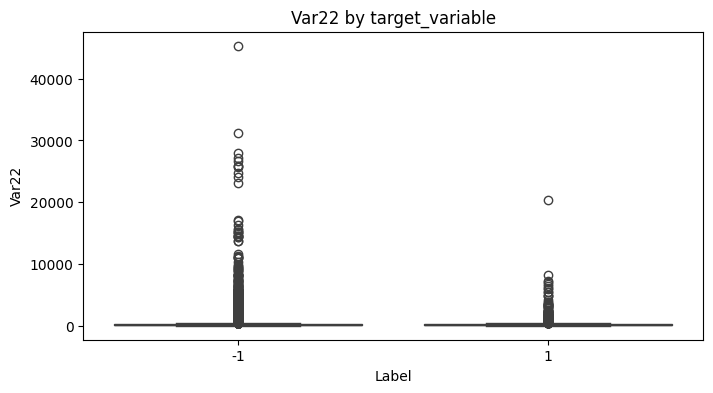

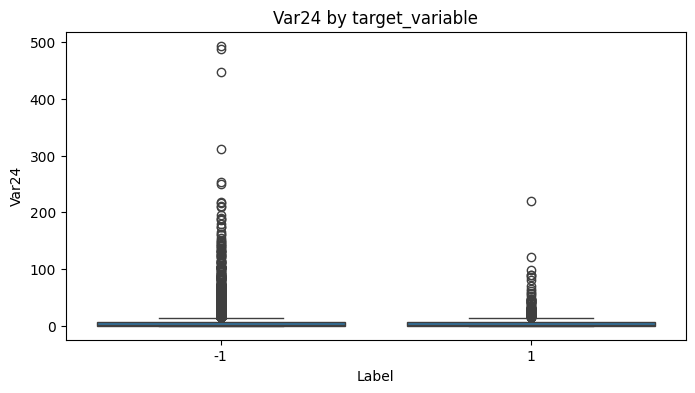

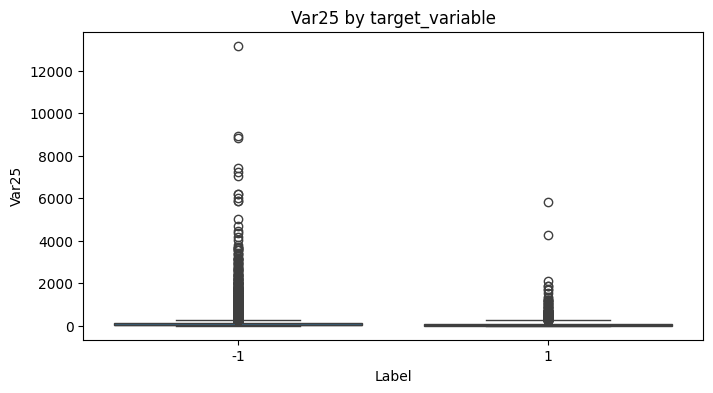

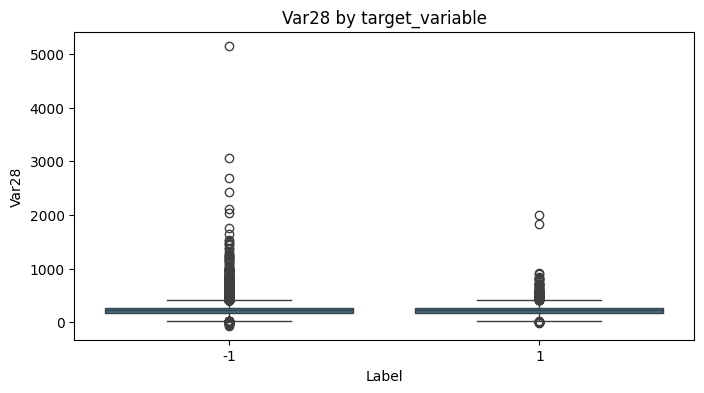

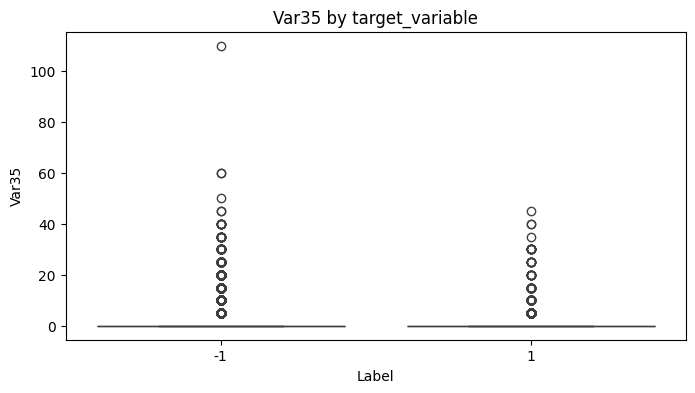

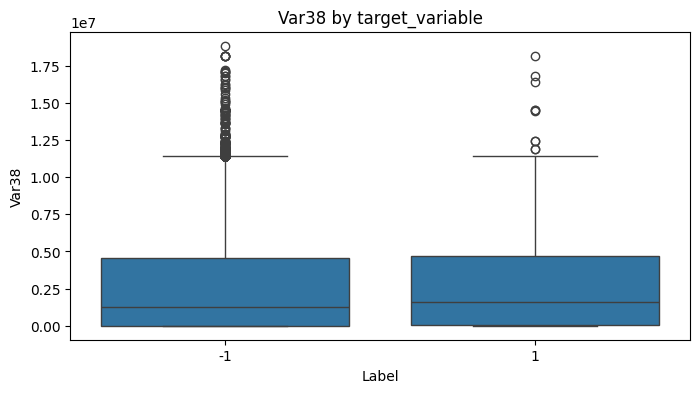

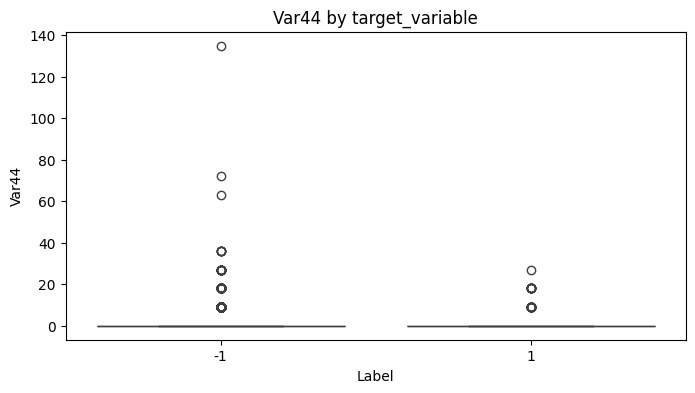

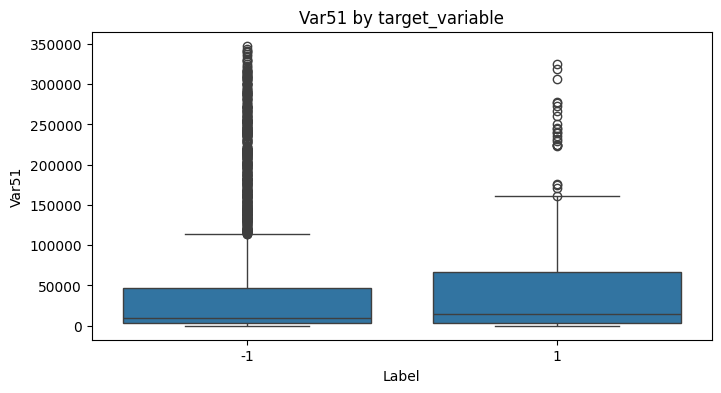

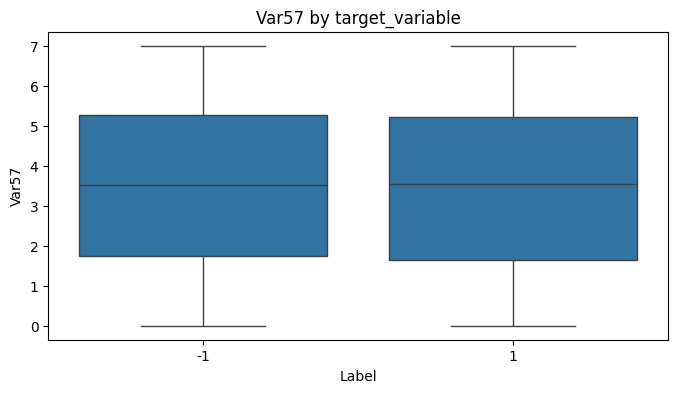

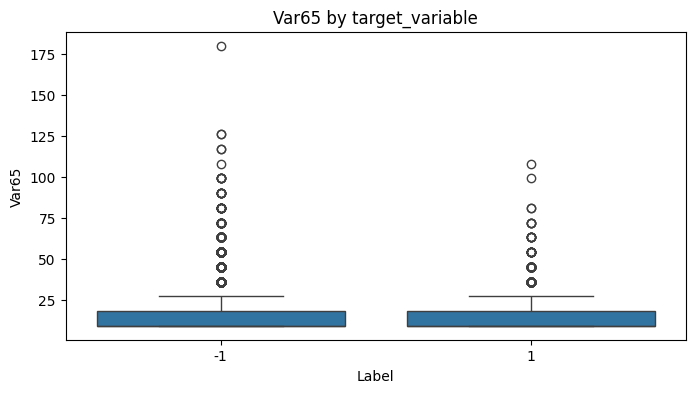

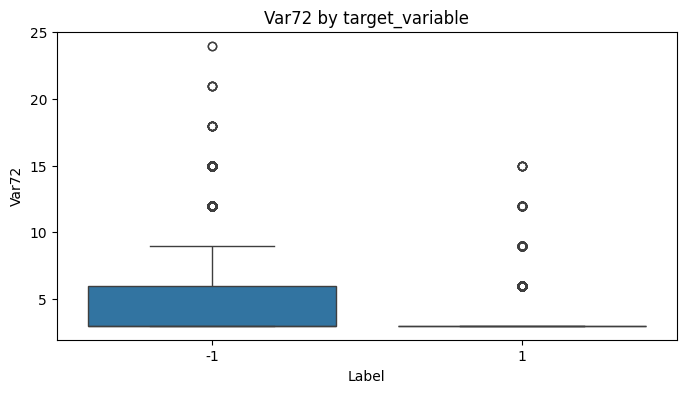

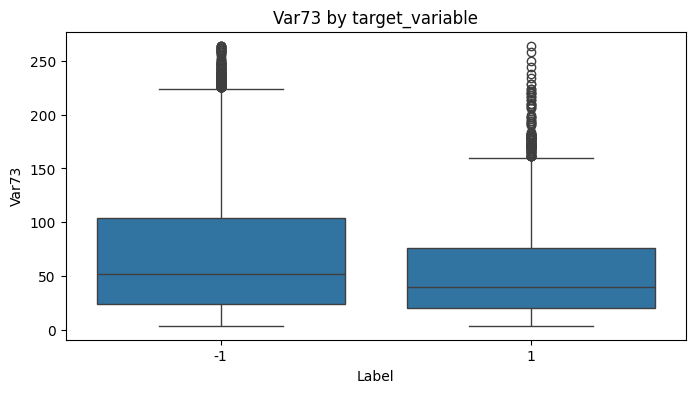

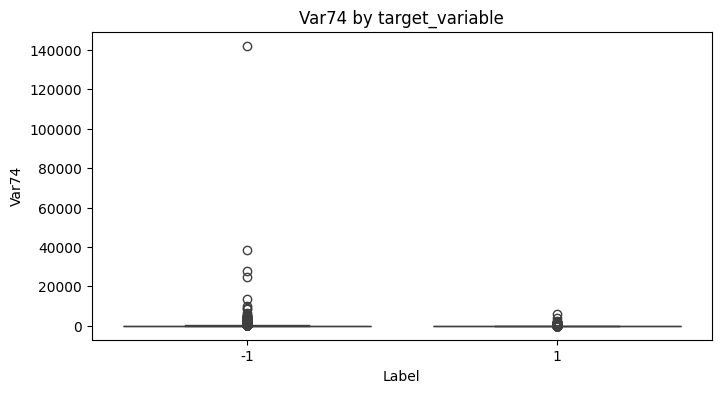

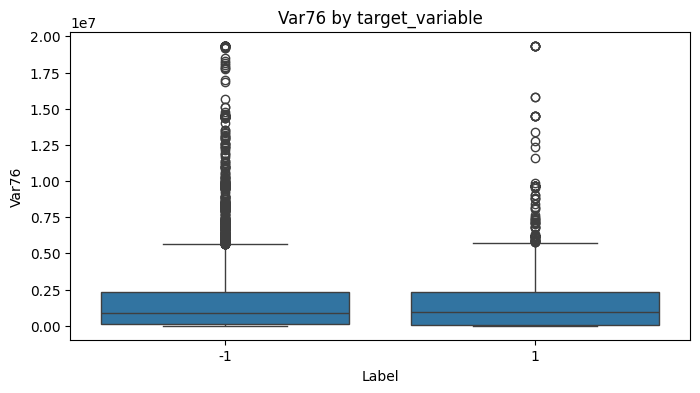

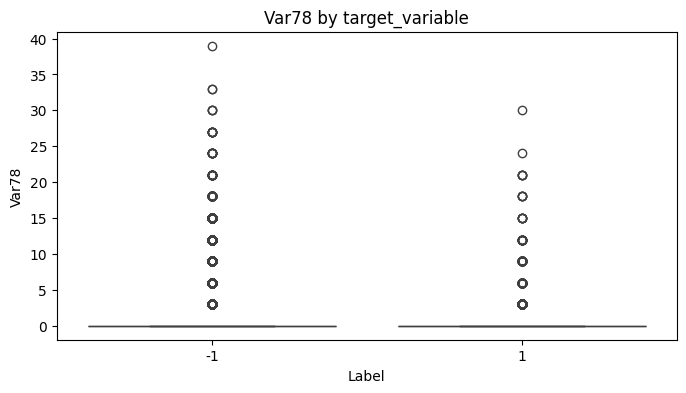

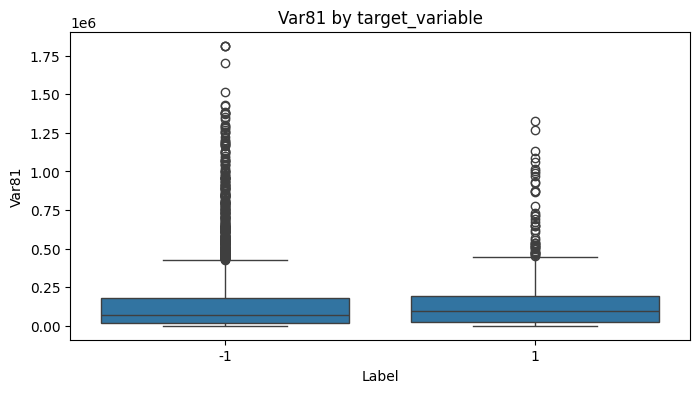

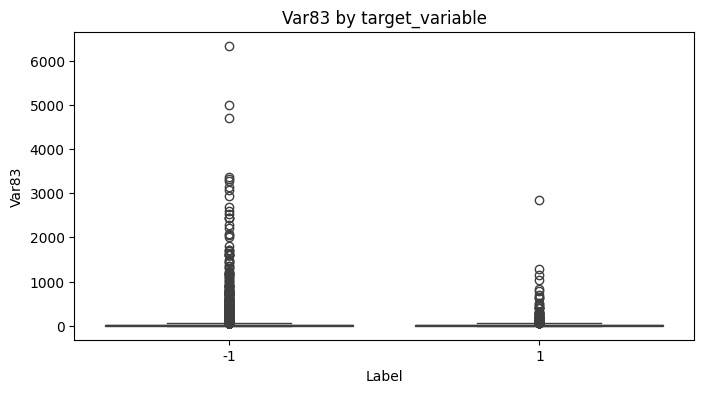

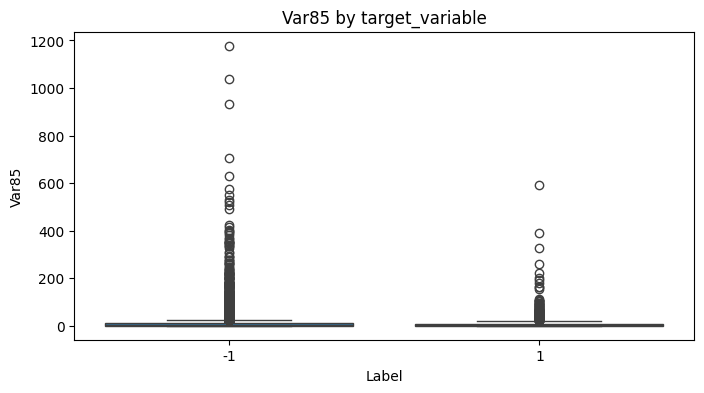

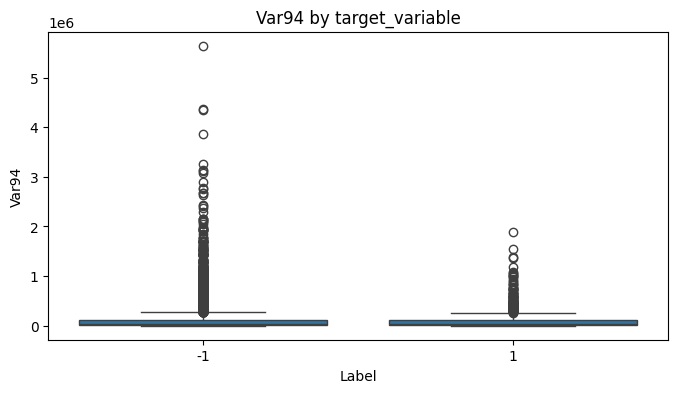

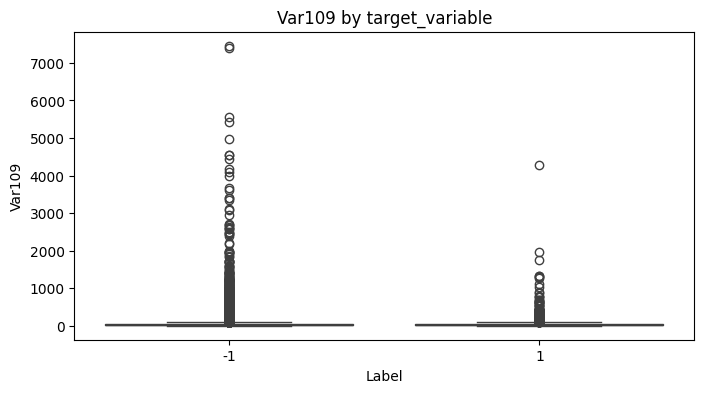

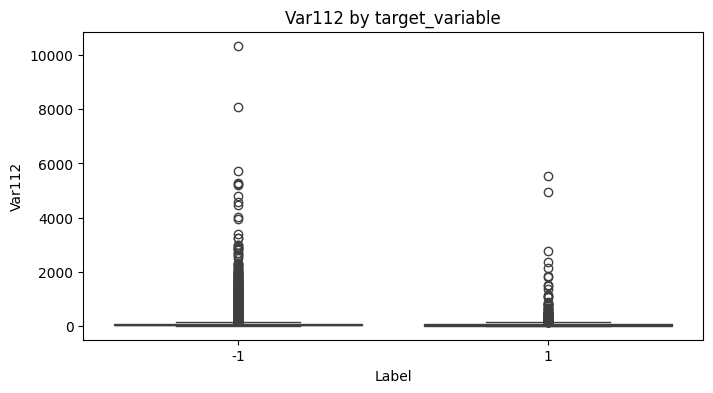

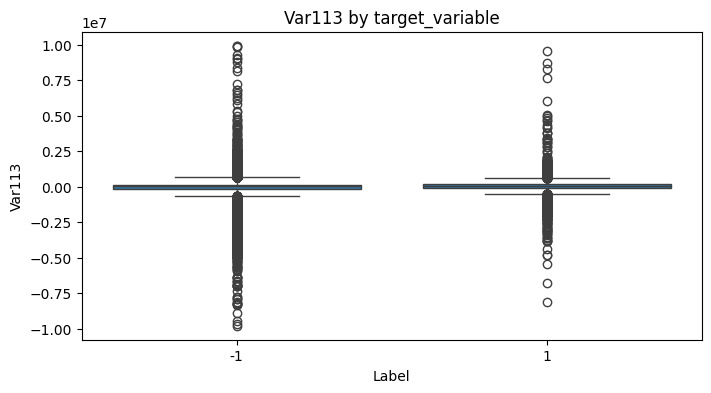

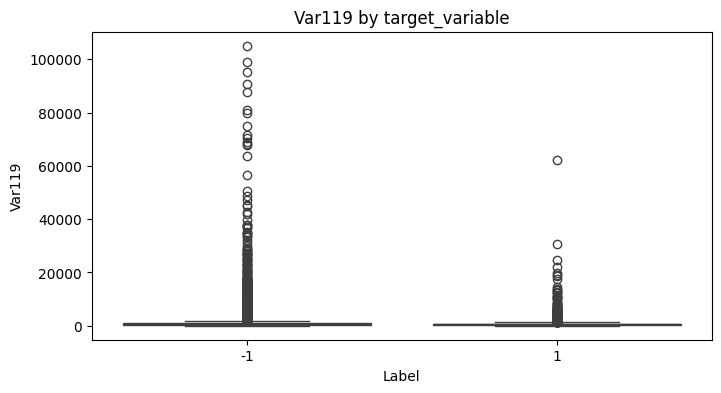

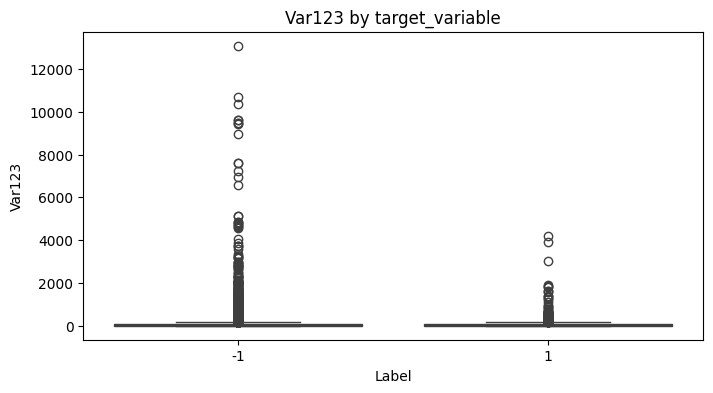

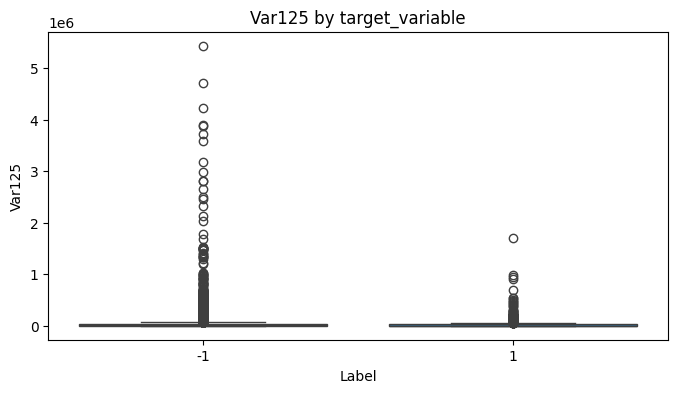

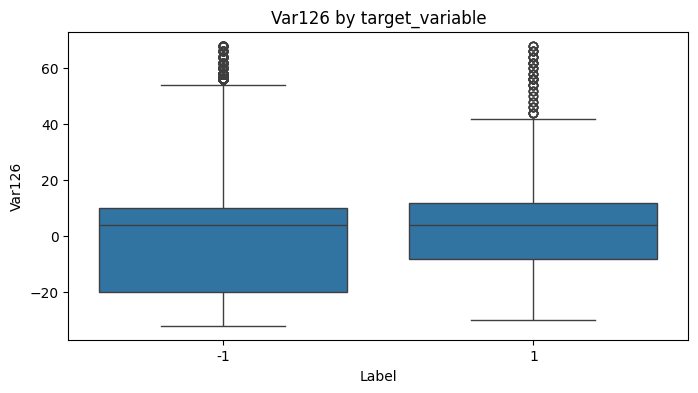

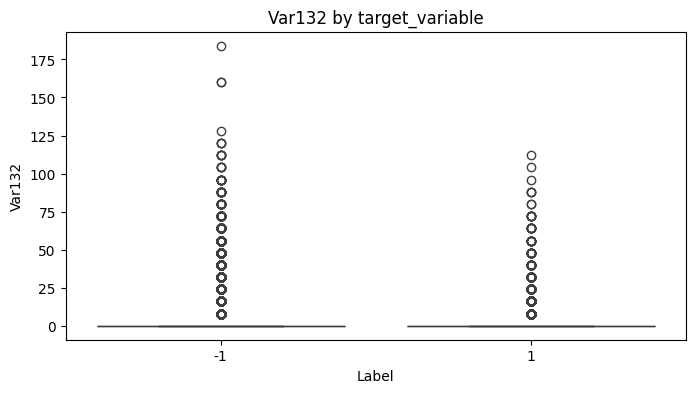

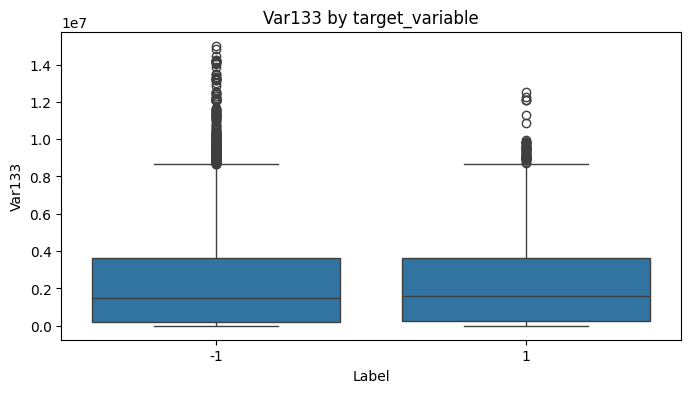

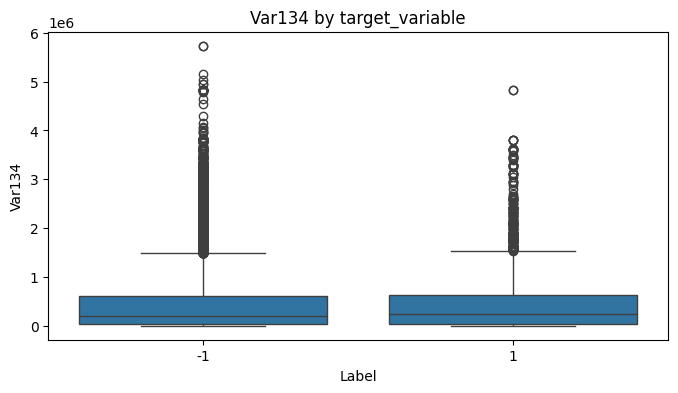

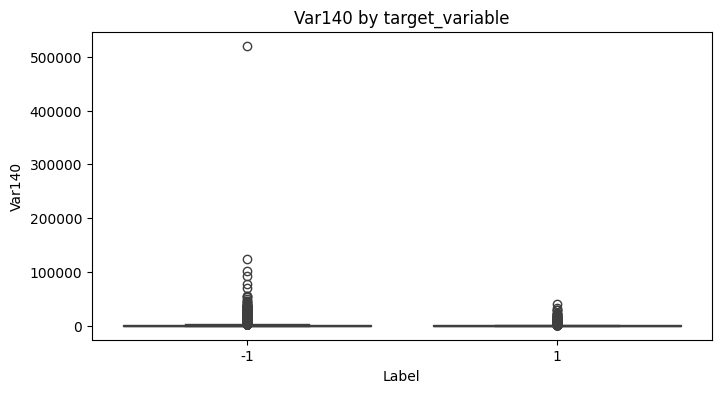

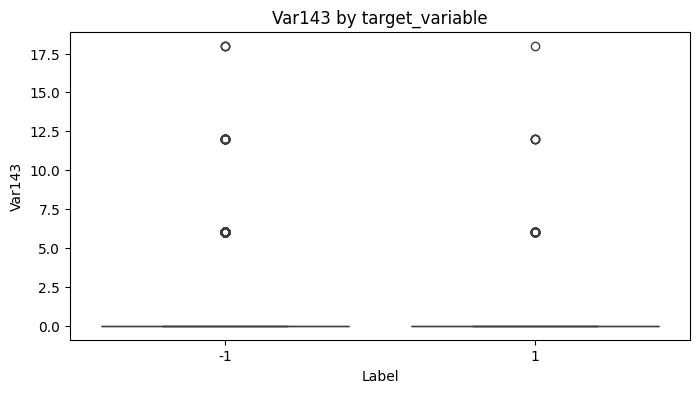

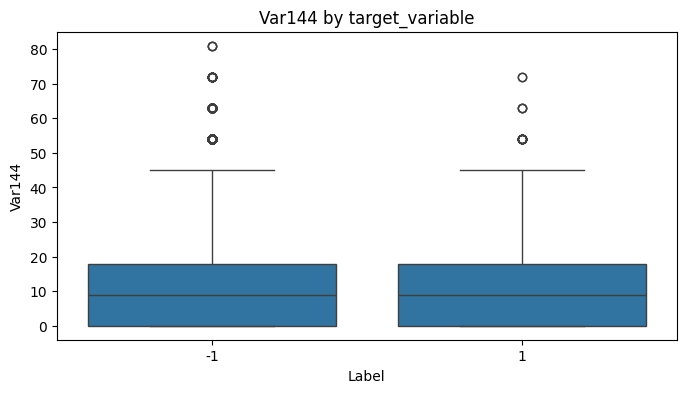

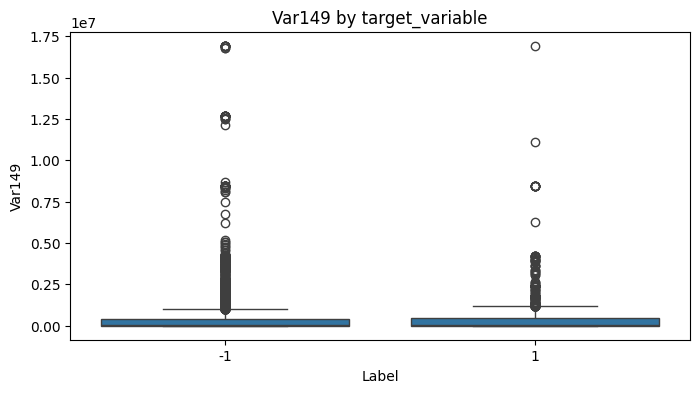

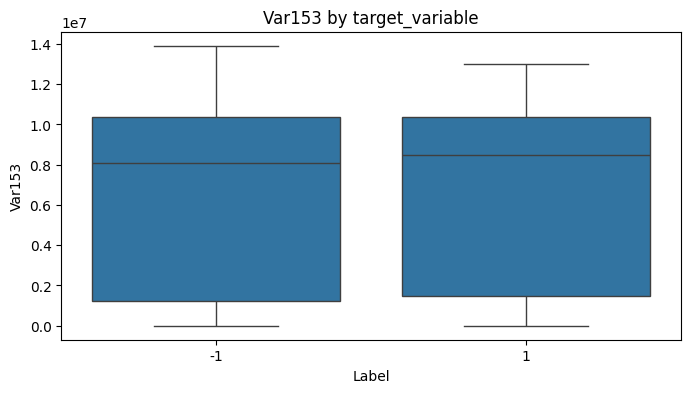

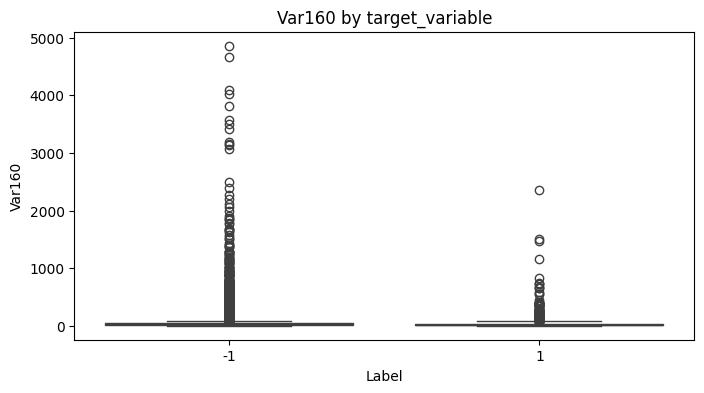

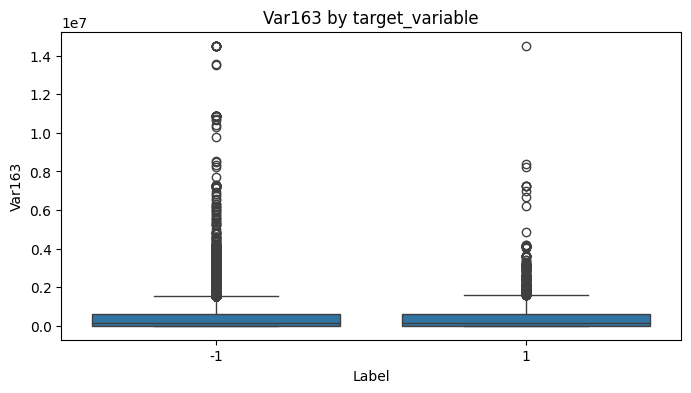

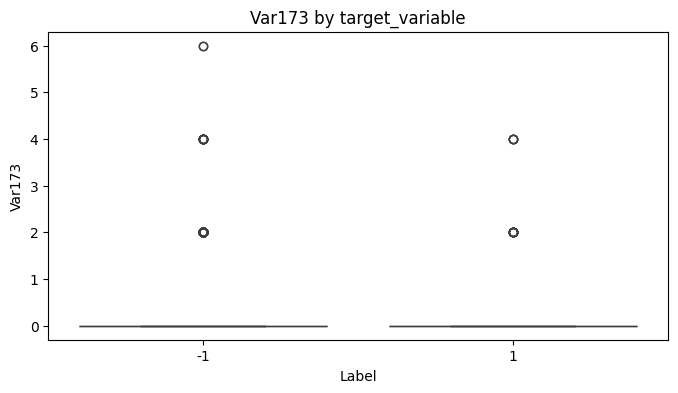

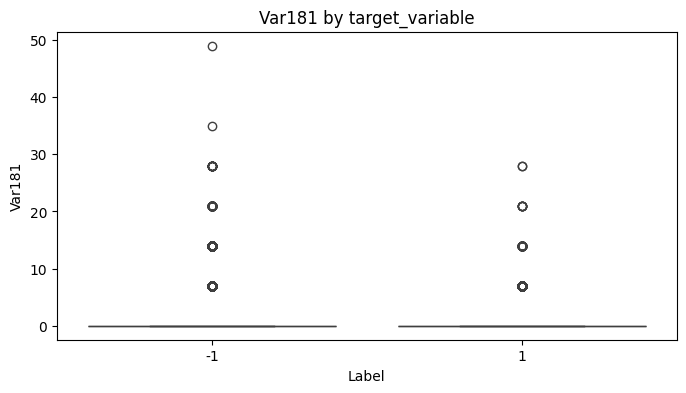

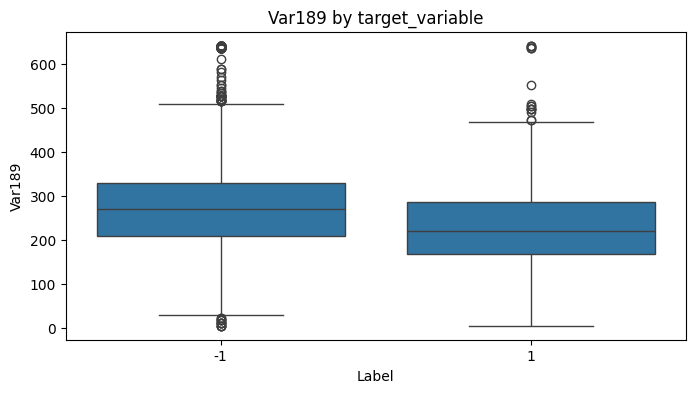

In [22]:
# Box plot for numerical vs. categorical features
target_variable = 'target_variable'  # Replace with your target column

for column in X.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y.squeeze(), y=X[column])
    plt.title(f'{column} by {target_variable}')
    plt.show()

In [23]:
# sns.pairplot(X[['Var109', 'Var112']])
# plt.show()

In [24]:
len(numerical_features), len(categorical_features)

(43, 34)

In [25]:
# # Grouped box plot
# sns.boxplot(x=categorical_features, y=numerical_features, hue=y, data=X)
# plt.title('Grouped Box Plot')
# plt.show()


# Outlier Detection

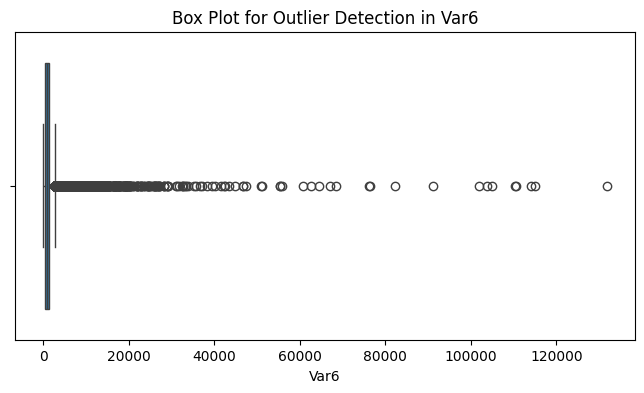

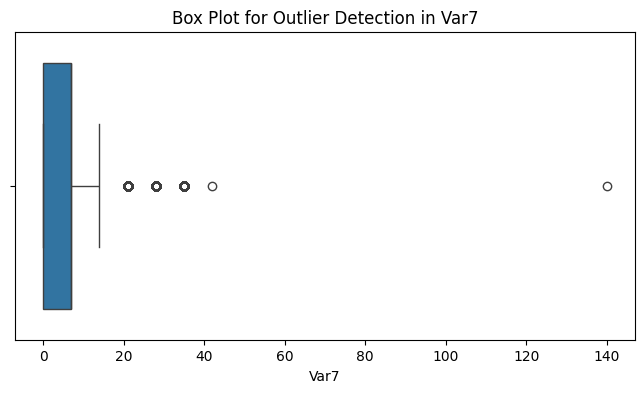

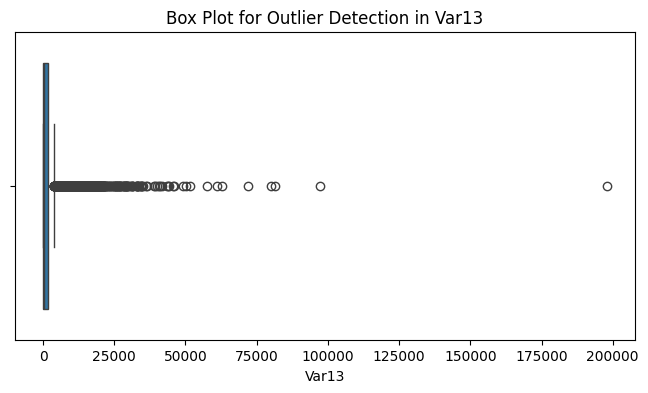

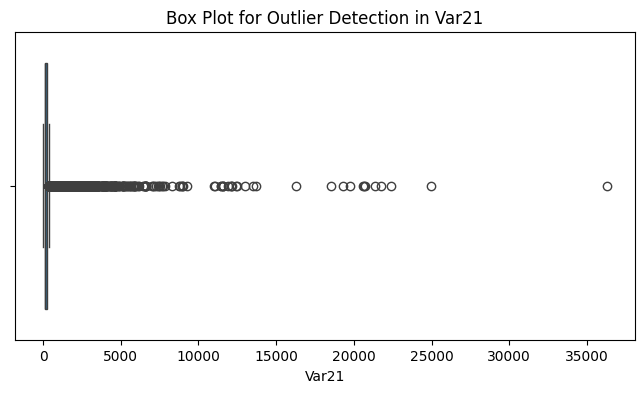

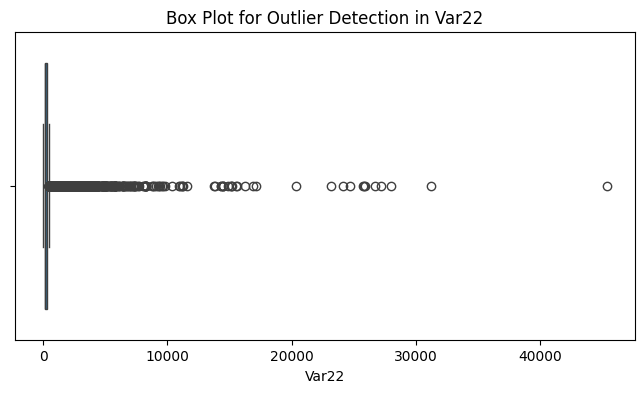

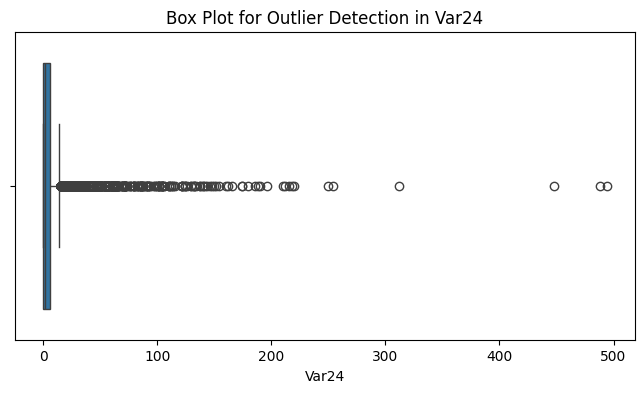

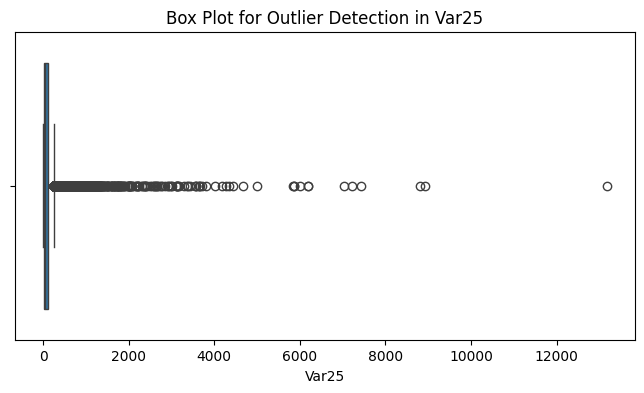

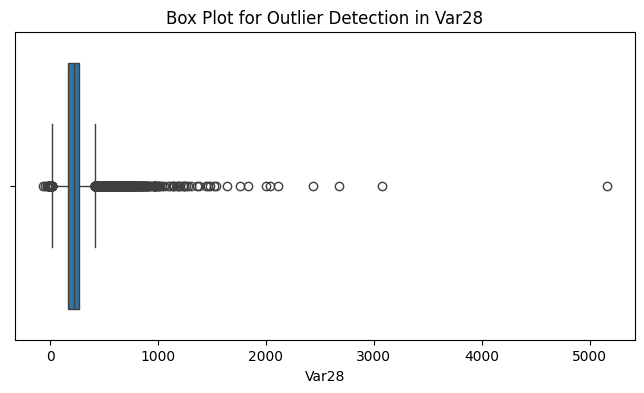

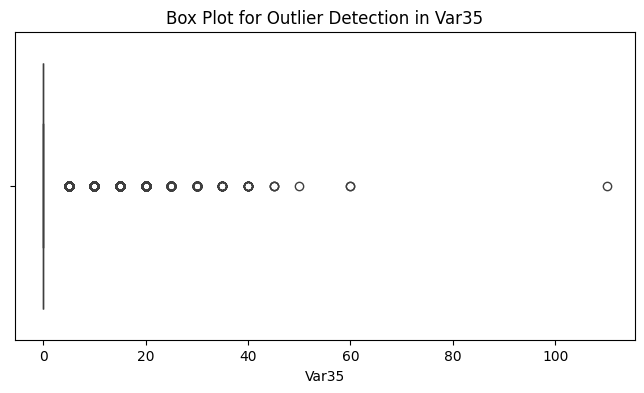

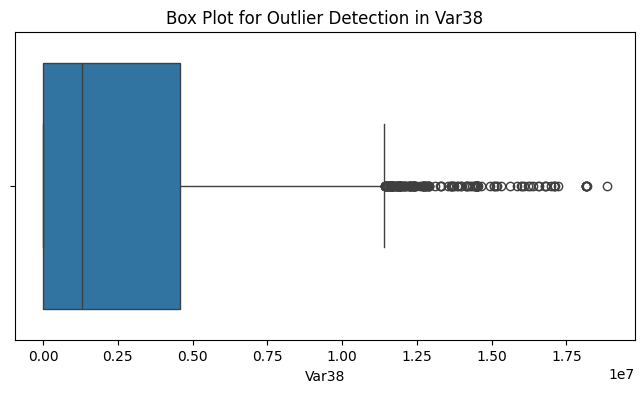

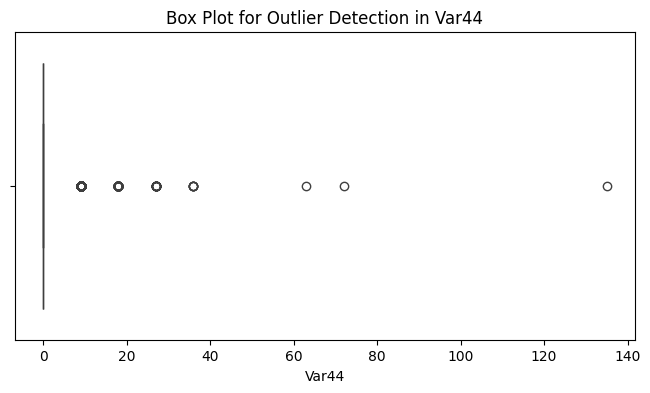

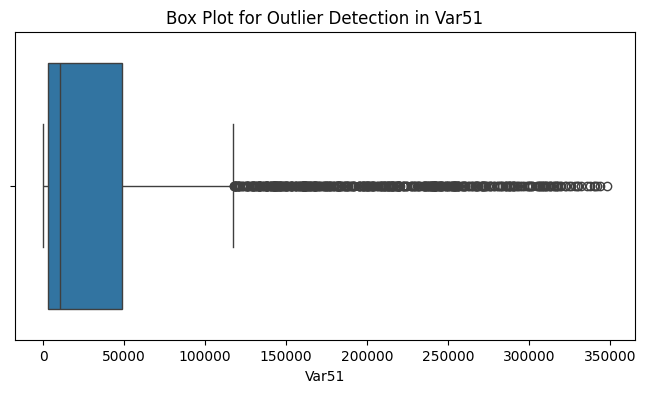

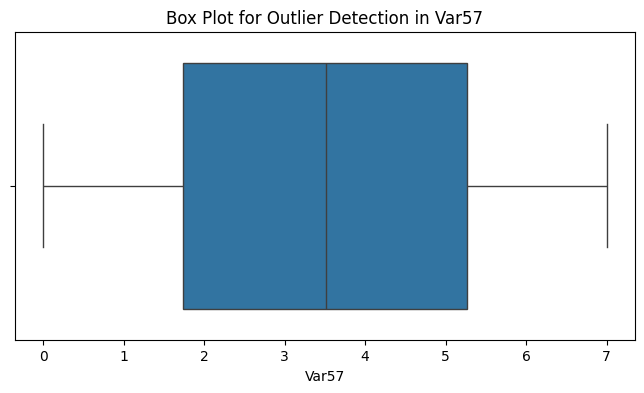

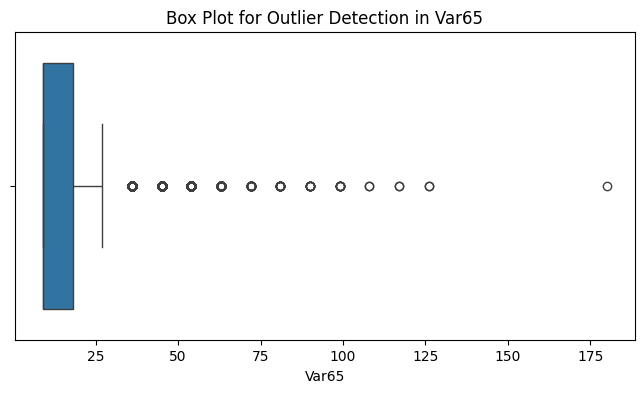

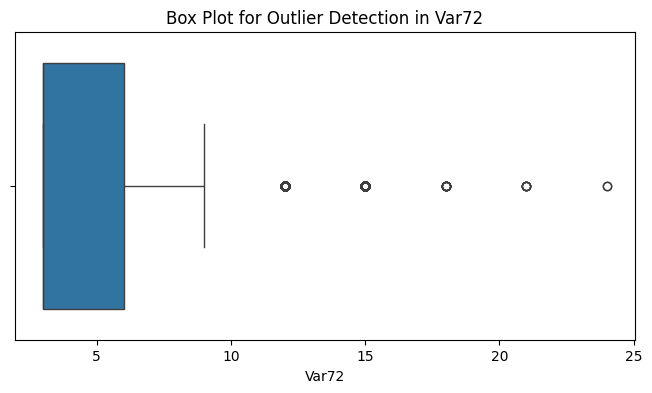

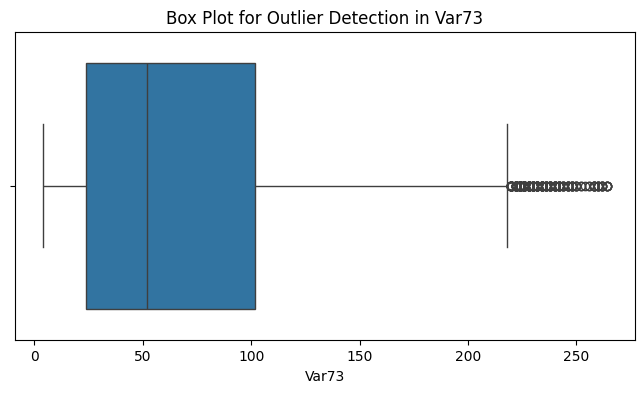

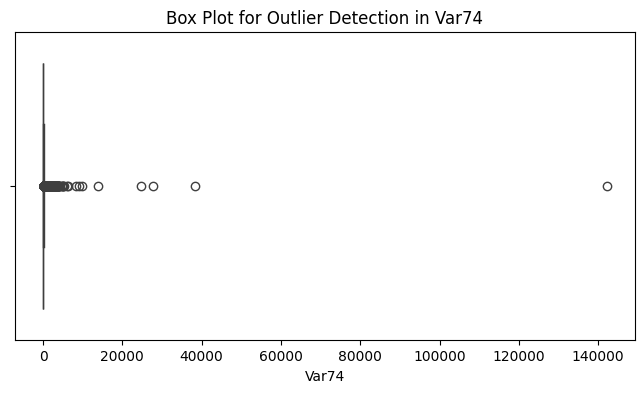

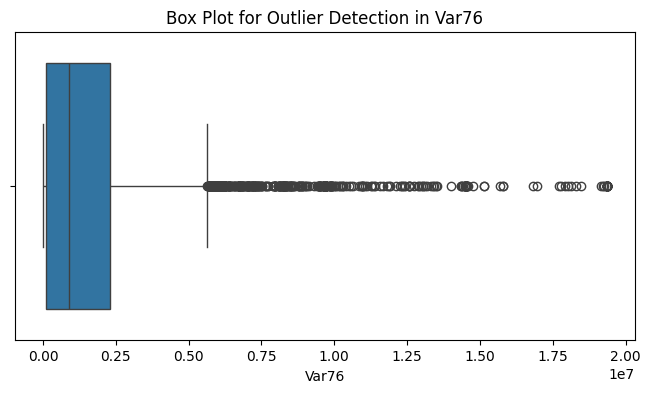

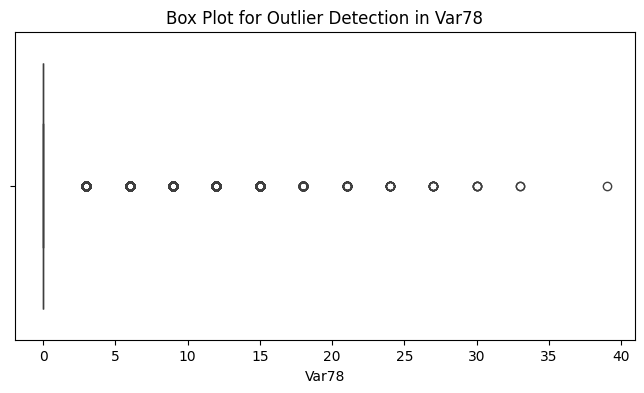

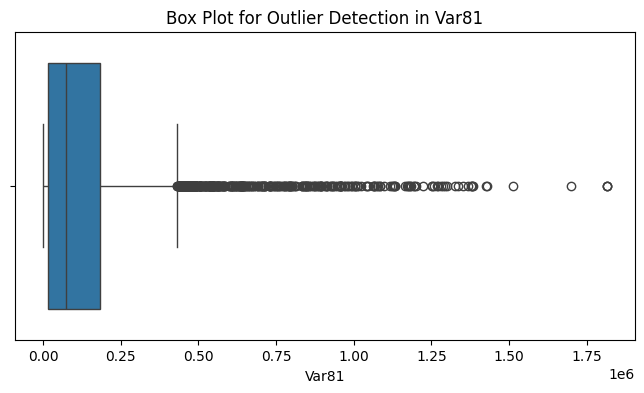

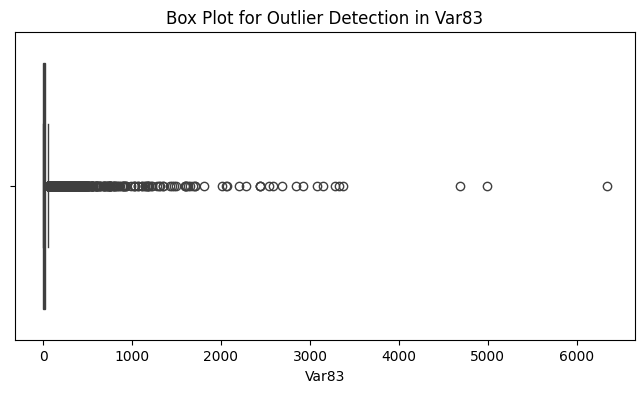

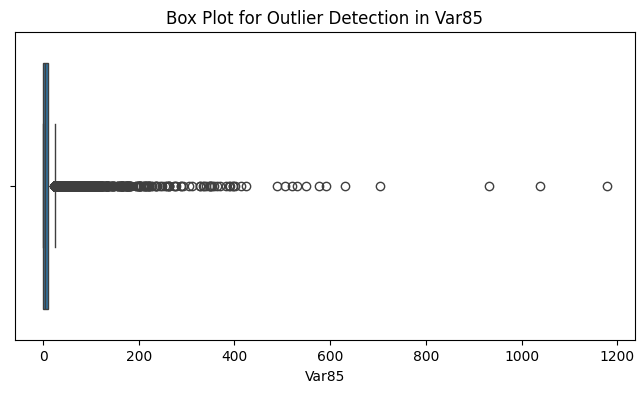

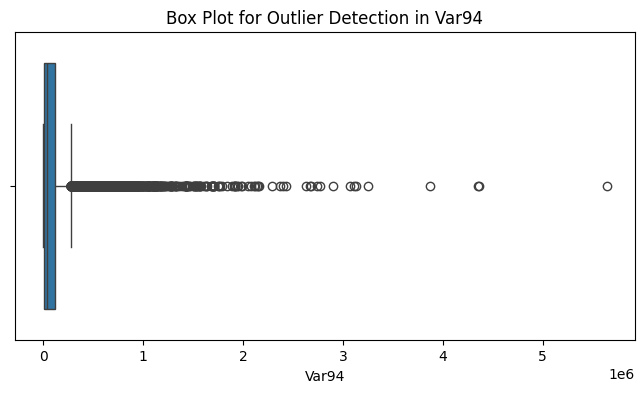

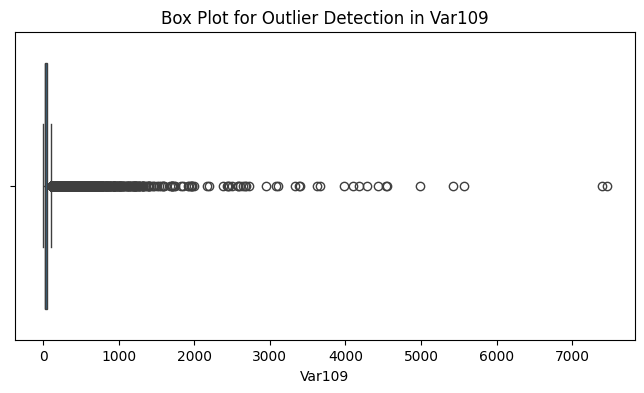

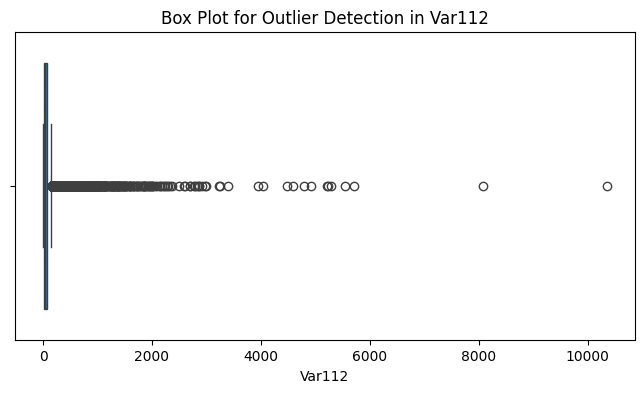

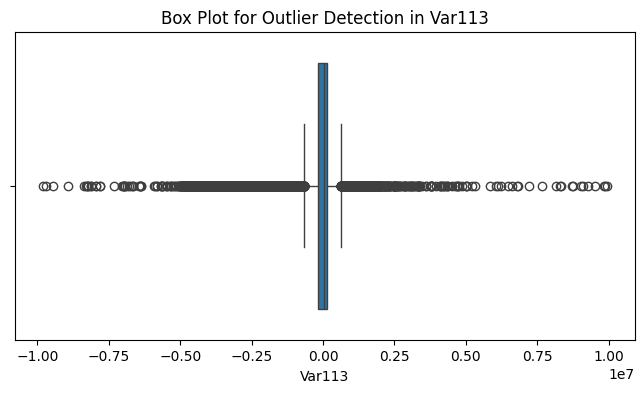

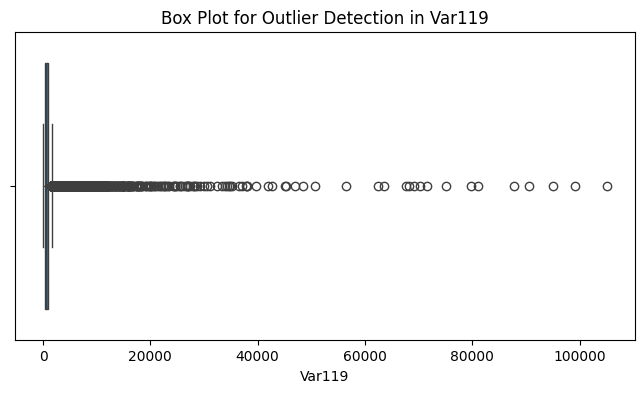

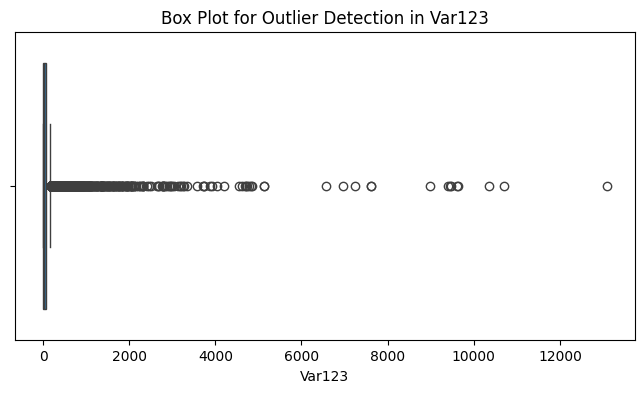

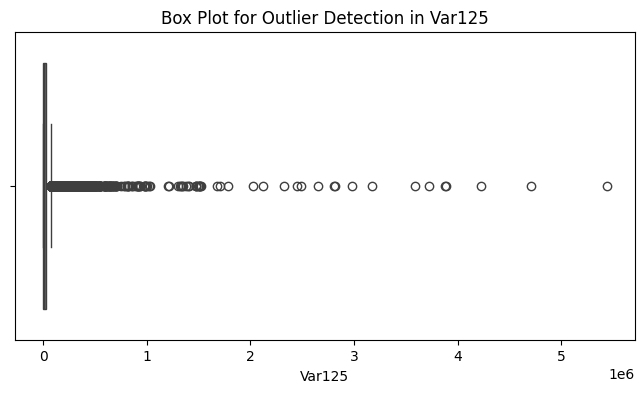

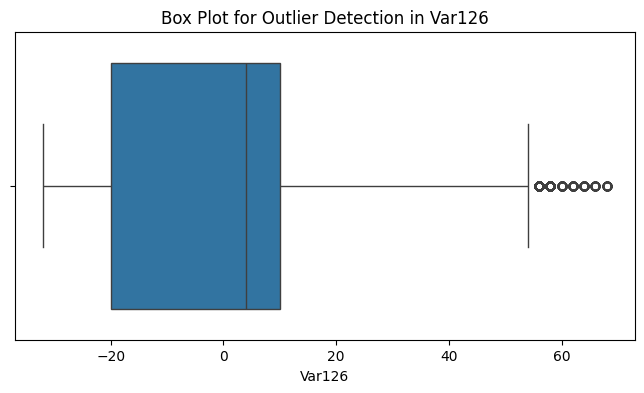

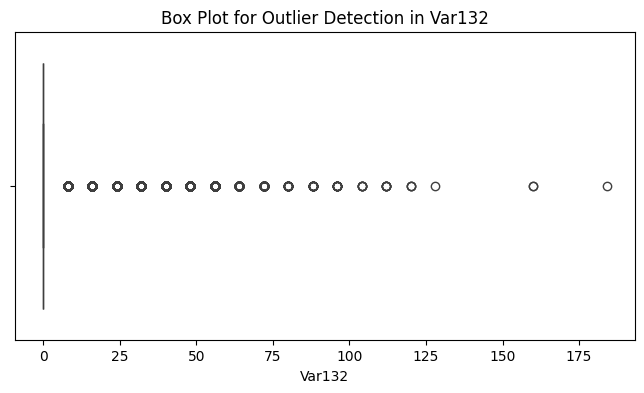

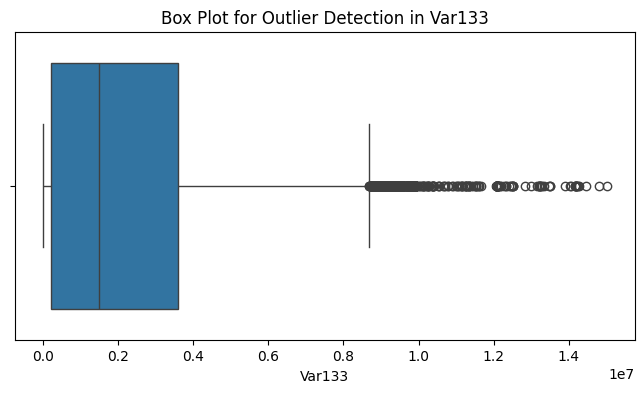

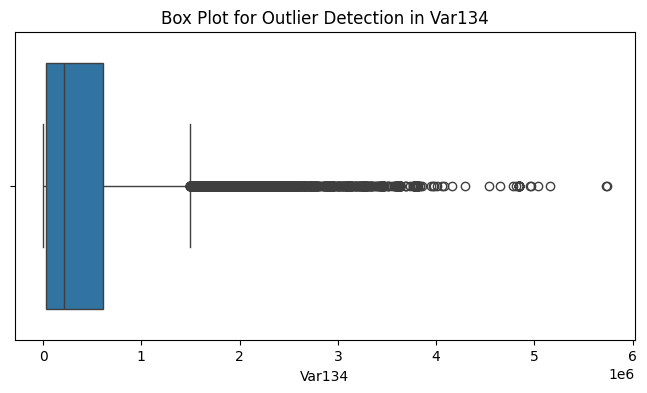

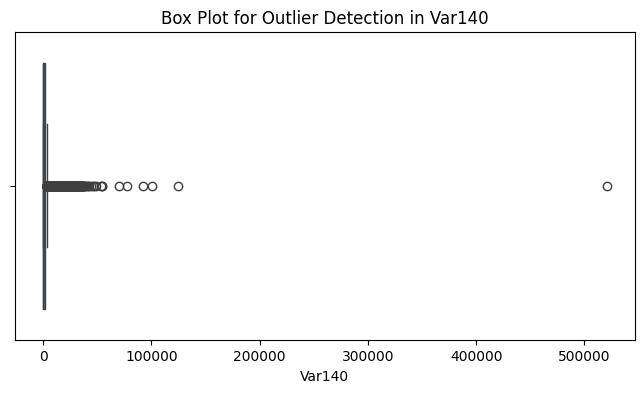

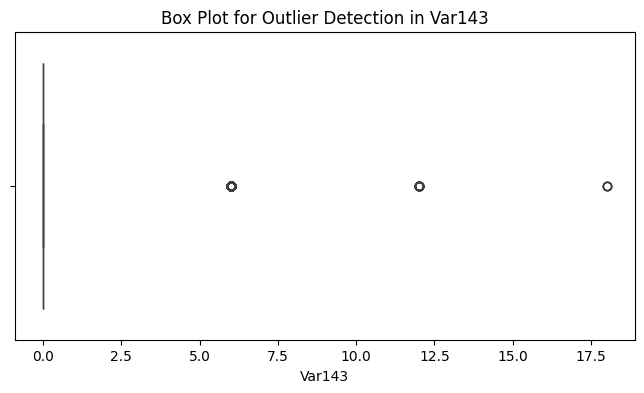

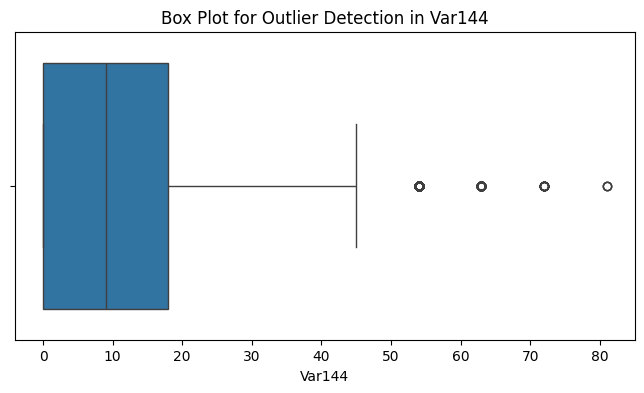

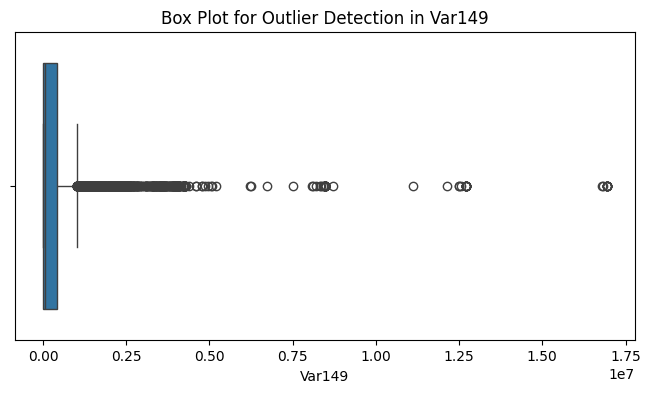

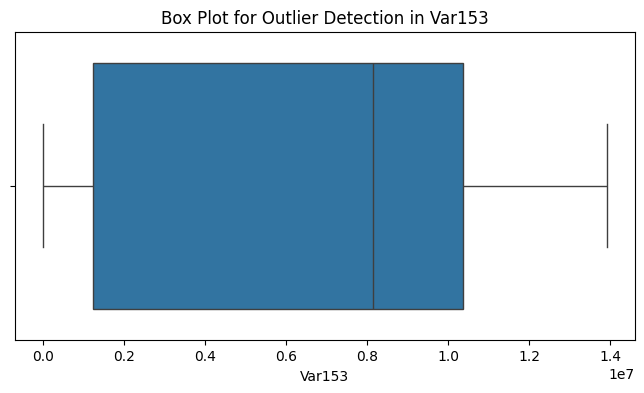

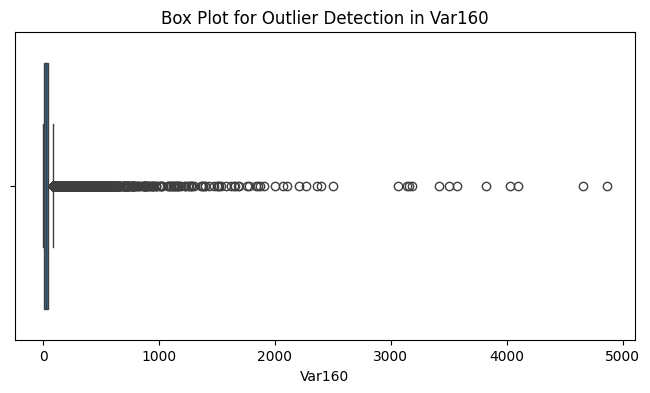

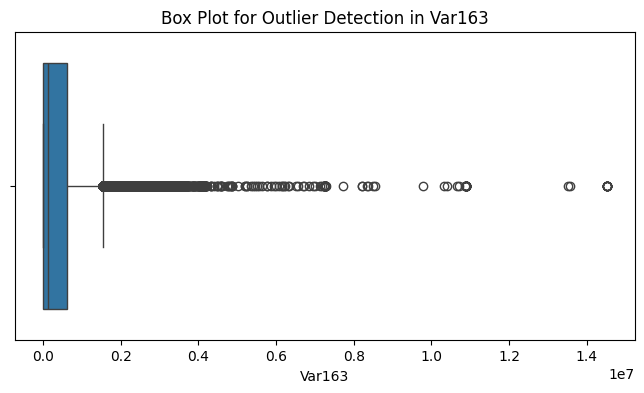

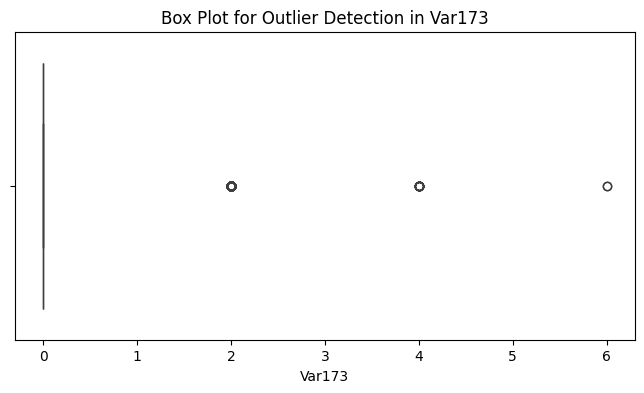

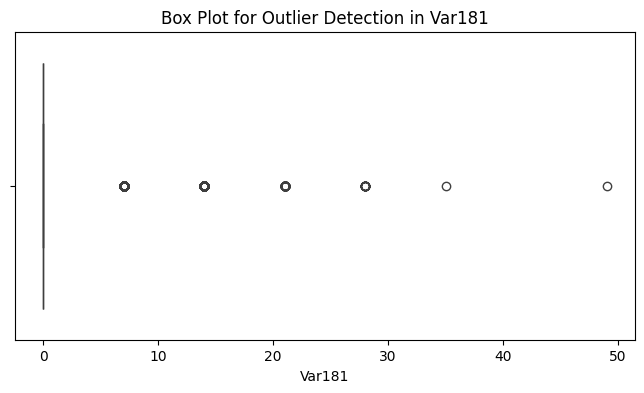

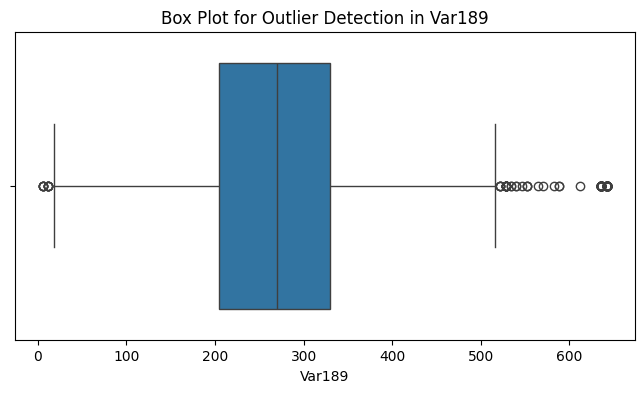

In [26]:
# Box plot for outlier detection
for column in X.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X[column])
    plt.title(f'Box Plot for Outlier Detection in {column}')
    plt.show()


In [27]:
# Z-score method for detecting outliers
from scipy.stats import zscore

# Calculate Z-scores for each feature
z_scores = X.select_dtypes(include='number').apply(zscore)

# Identify outliers based on Z-score threshold
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())

Var6        0
Var7        0
Var13       0
Var21       0
Var22       0
Var24       0
Var25       0
Var28       0
Var35       0
Var38       0
Var44       0
Var51       0
Var57       0
Var65       0
Var72       0
Var73     171
Var74       0
Var76       0
Var78       0
Var81       0
Var83       0
Var85       0
Var94       0
Var109      0
Var112      0
Var113    951
Var119      0
Var123      0
Var125      0
Var126      0
Var132      0
Var133      0
Var134      0
Var140      0
Var143      0
Var144      0
Var149      0
Var153      0
Var160      0
Var163      0
Var173      0
Var181      0
Var189      0
dtype: int64


In [28]:
outliers

Var6   Var7  Var13  Var21  Var22  Var24  Var25  Var28  Var35  Var38  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49995  False  False  False  False  False  False  False  False  False  False   
49996  False  False  False  False  False  False  False  False  False  False   
49997  False  False  False  False  False  False  False  False  False  False   
49998  False  False  False  False  False  False  False  False  False  False   
49999  False  False  False  False  False  False  False  False  False  False   

       ...  Var140  Var143  Var144  Var149  Var153  Var160  Var163  Var173  \
0      ...   False   False   False   False   False   False   False   False   
1      ...   False   False   False   False   False   False   False   False   
2      ...   False   False   False   False   False   False   False   False   
3      ...   False   False   False   False   False   False   False   False   
4      ...   False   False   False   False   False   False   False   False   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
49995  ...   False   False   False   False   False   False   False   False   
49996  ...   False   False   False   False   False   False   False   False   
49997  ...   False   False   False   False   False   False   False   False   
49998  ...   False   False   False   False   False   False   False   False   
49999  ...   False   False   False   False   False   False   False   False   

       Var181  Var189  
0       False   False  
1       False   False  
2       False   False  
3       False   False  
4       False   False  
...       ...     ...  
49995   False   False  
49996   False   False  
49997   False   False  
49998   False   False  
49999   False   False  

[50000 rows x 43 columns]

# Target Variable Analysis

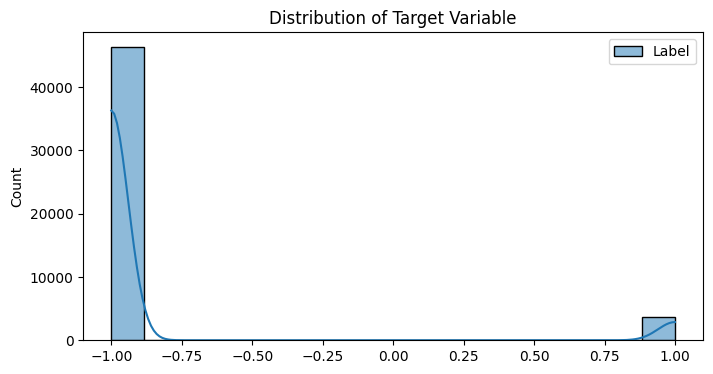

In [29]:
# Distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()



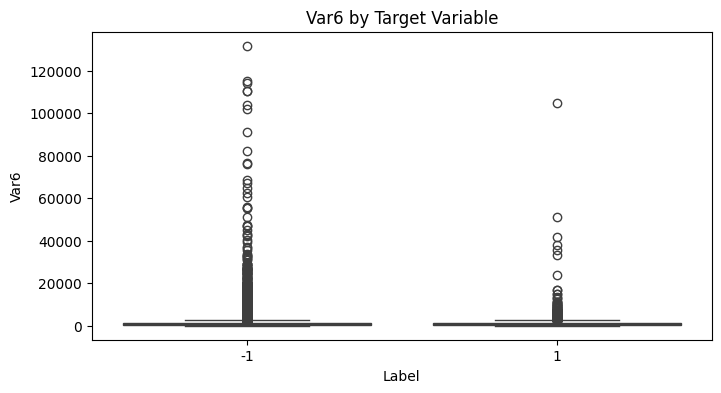

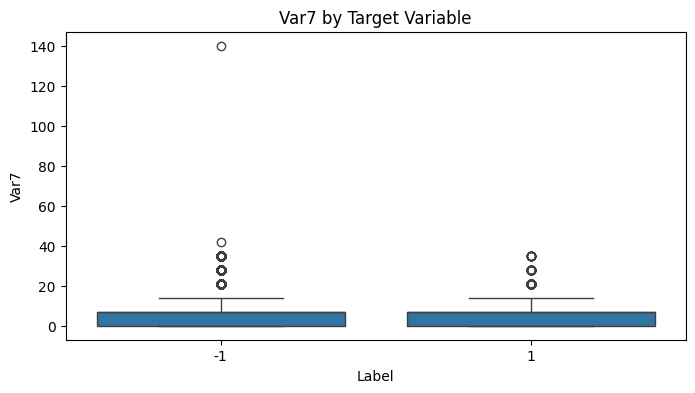

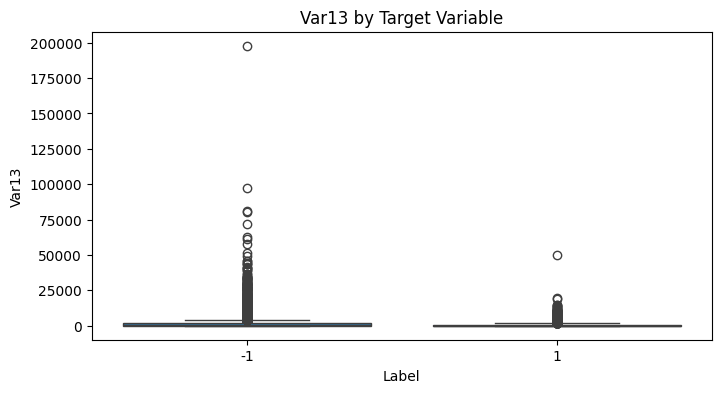

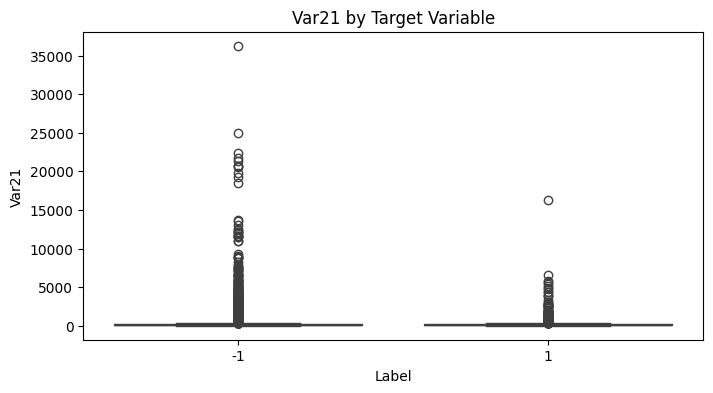

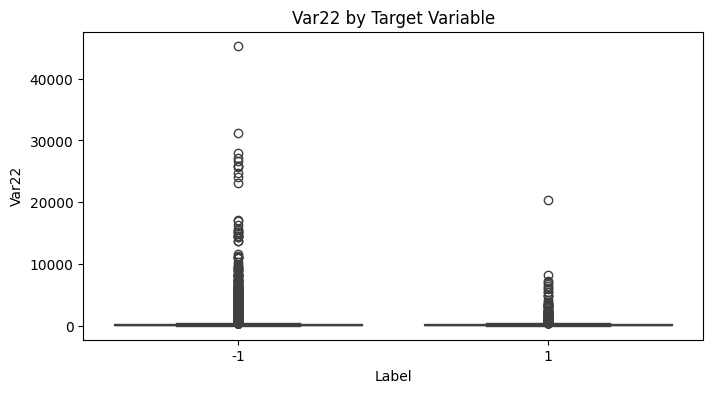

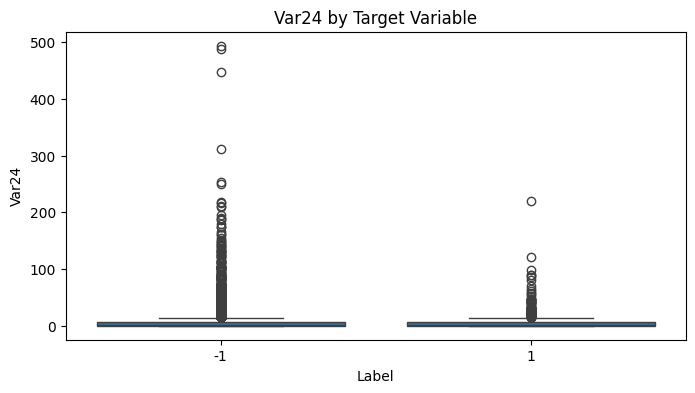

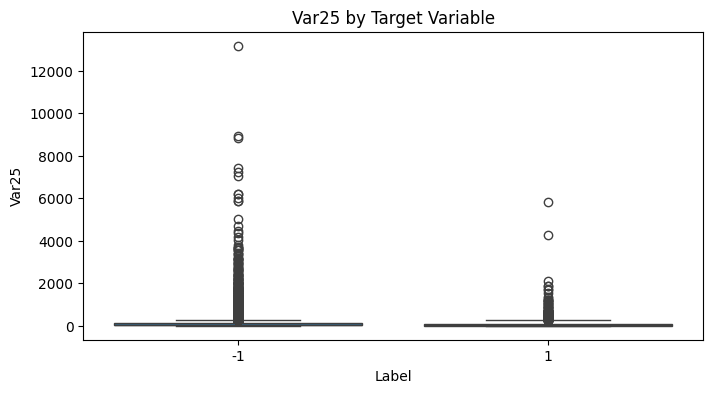

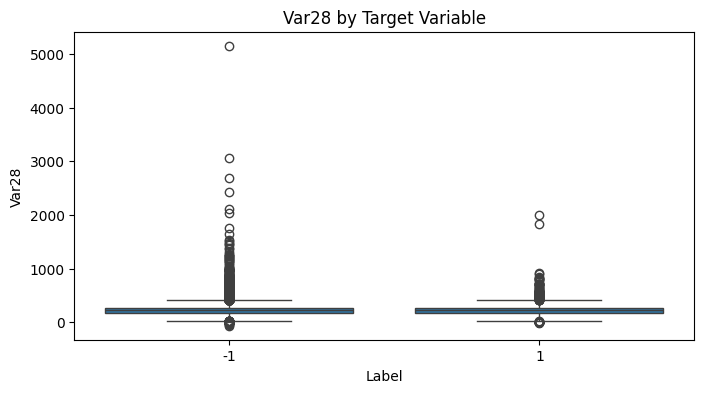

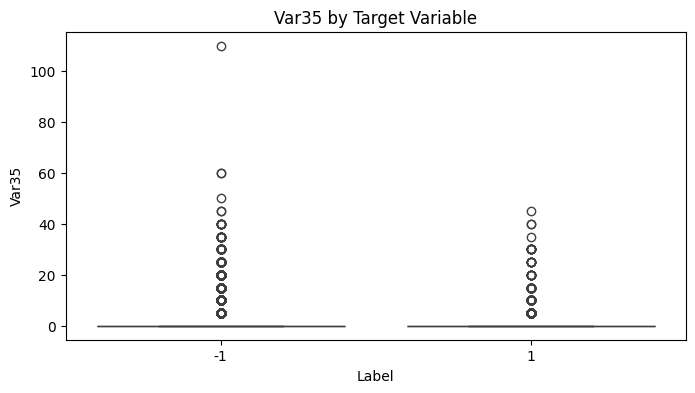

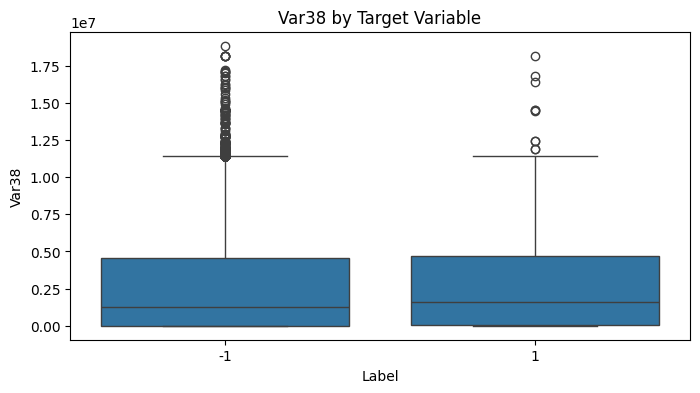

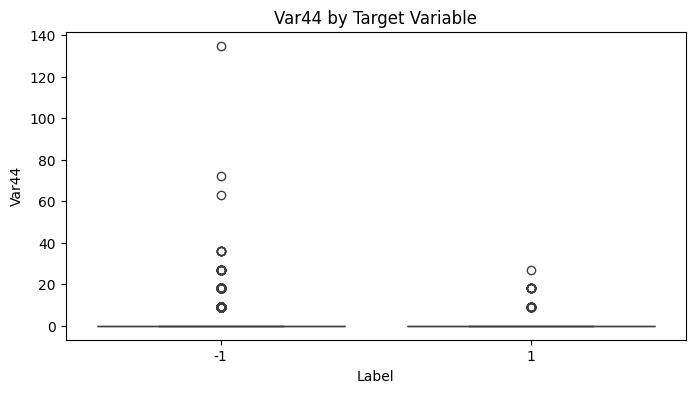

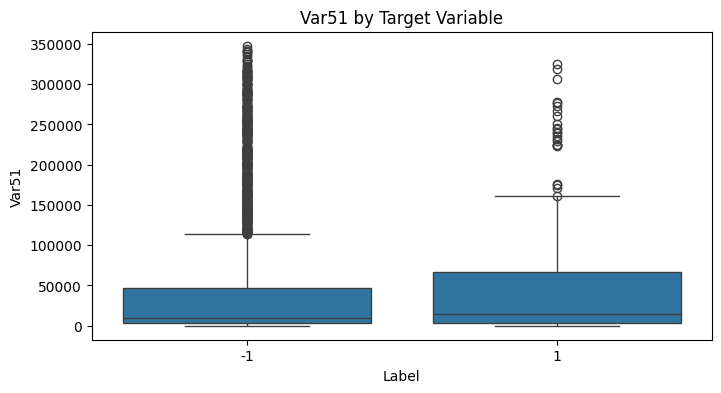

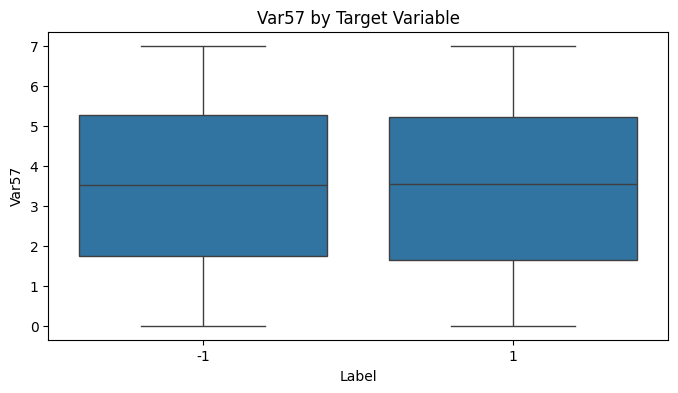

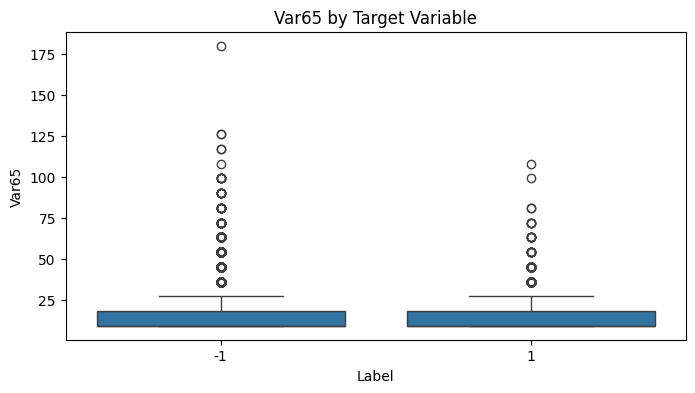

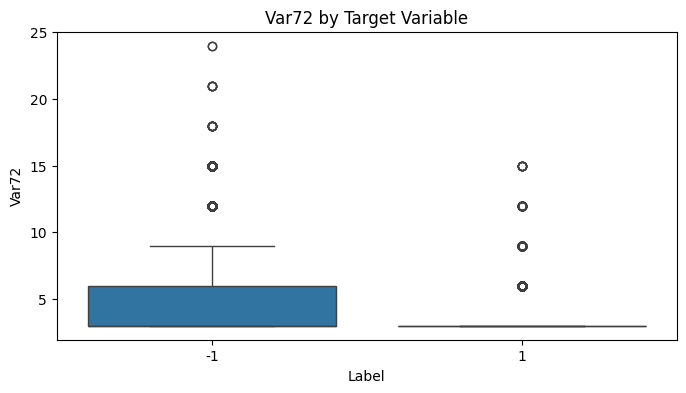

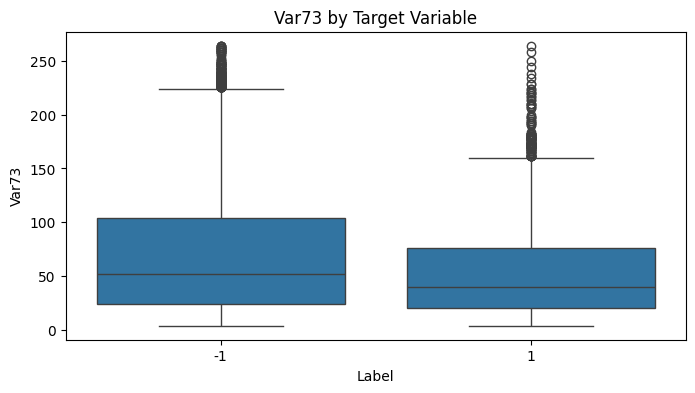

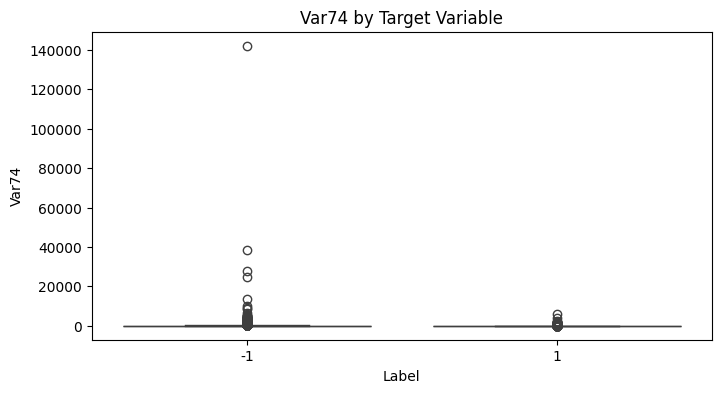

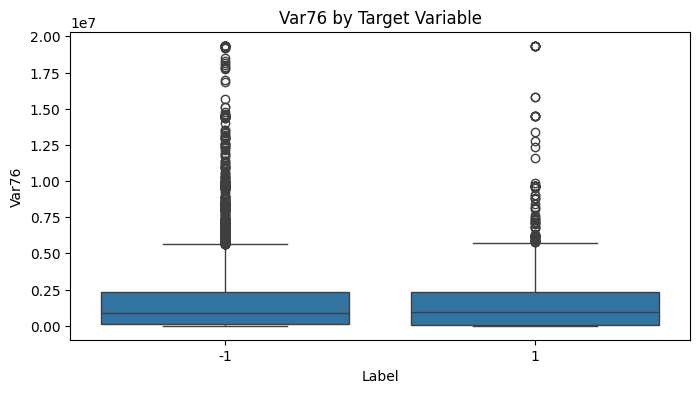

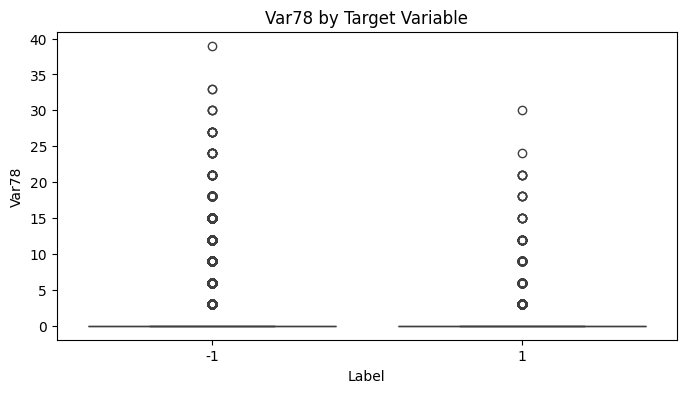

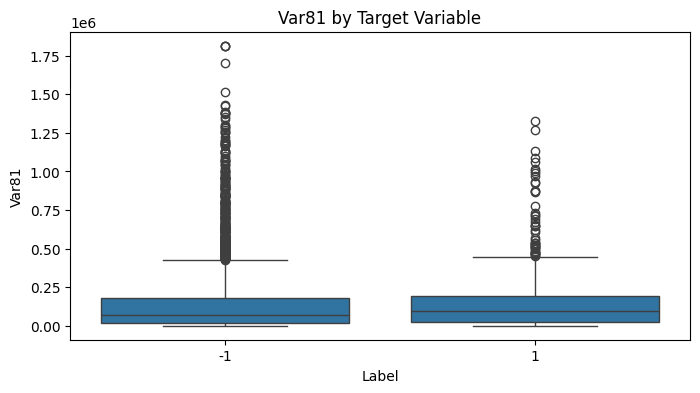

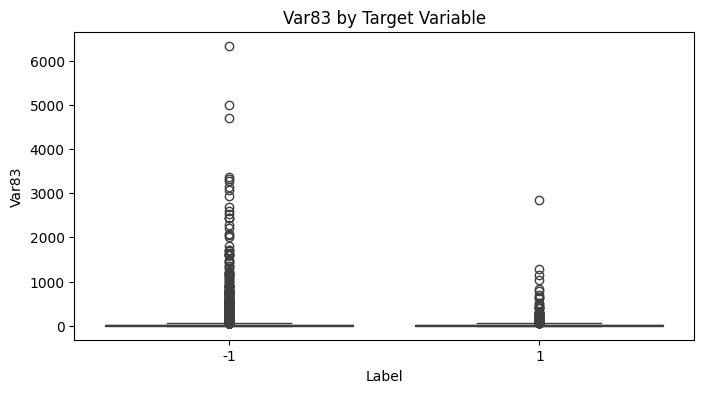

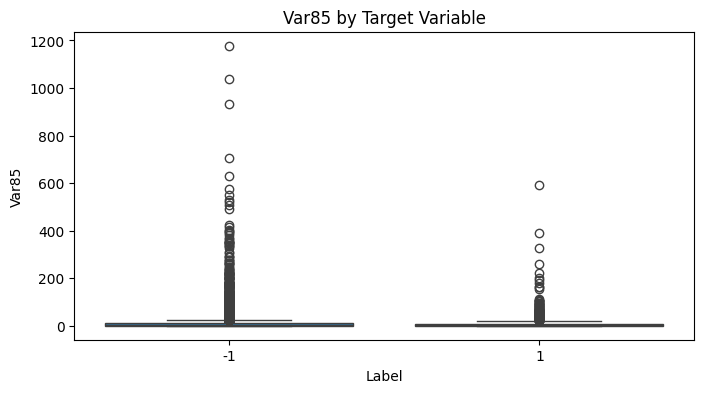

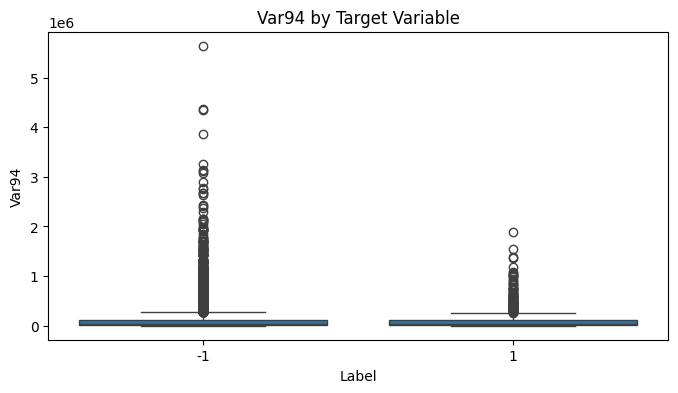

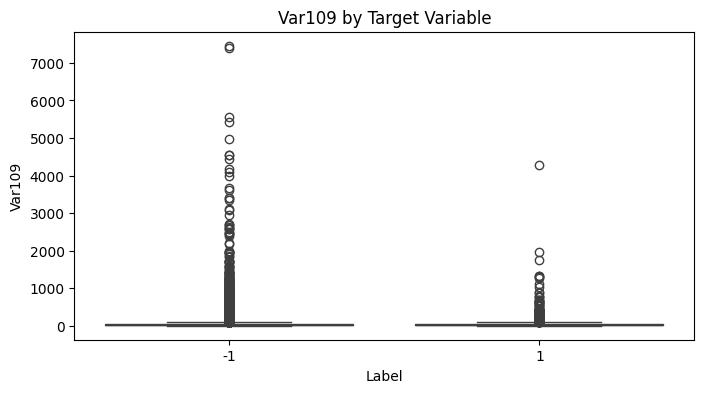

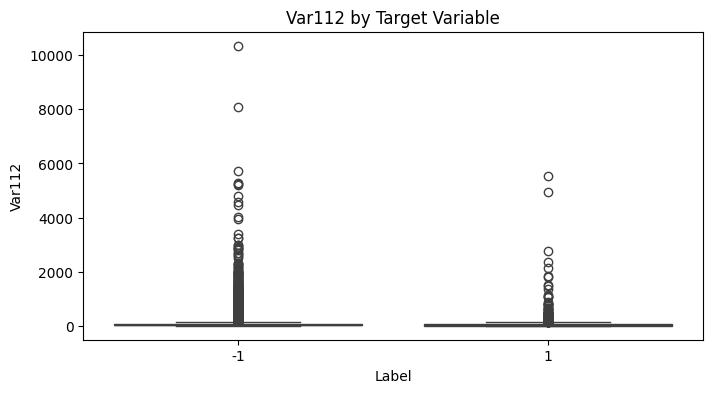

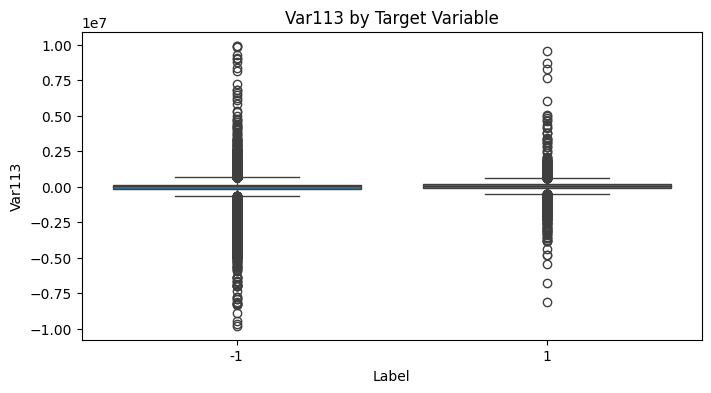

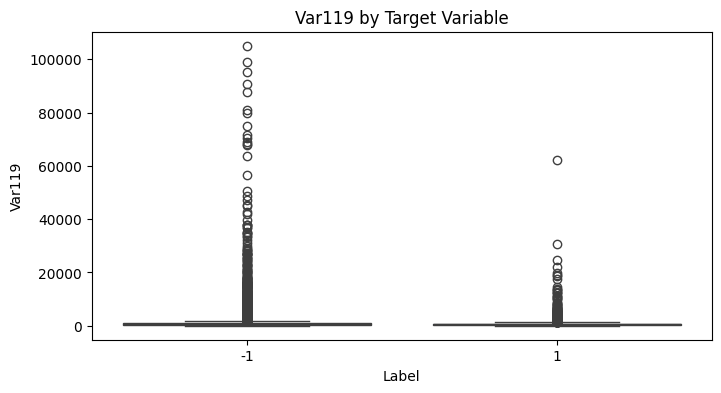

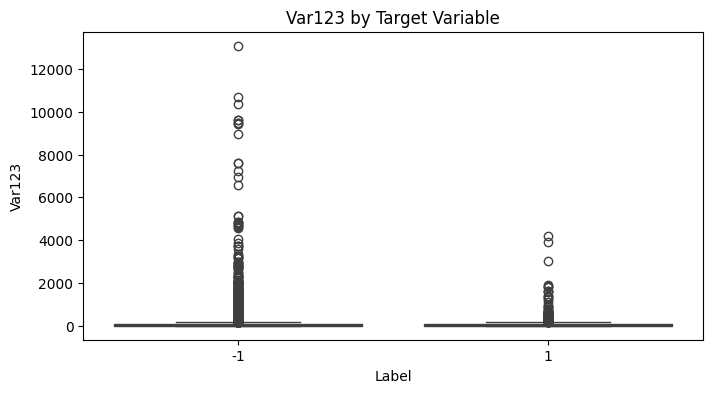

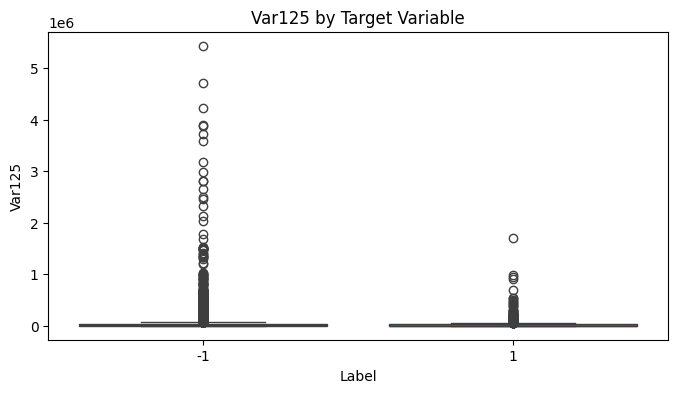

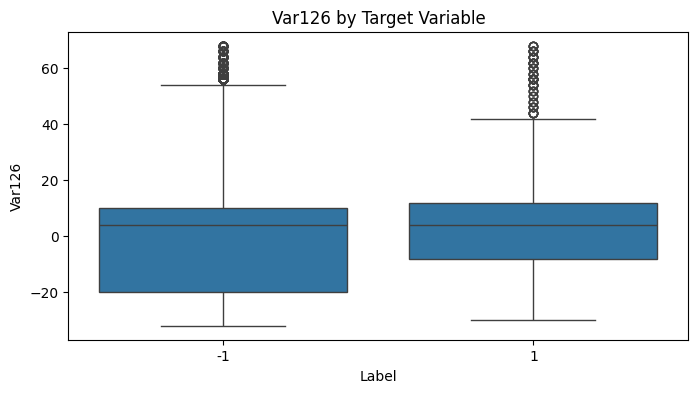

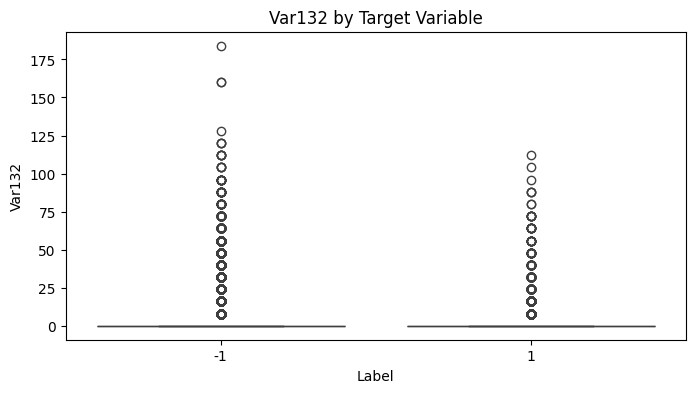

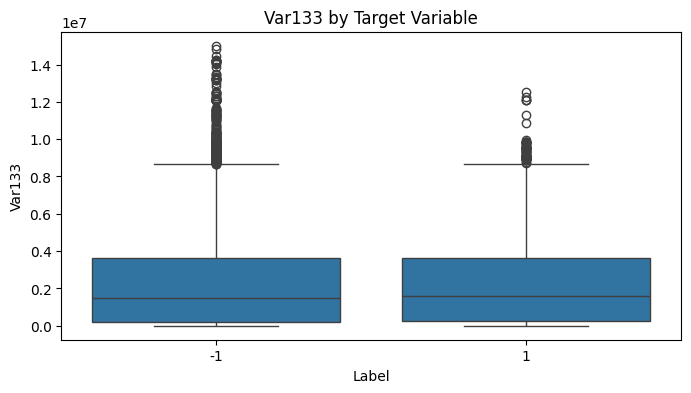

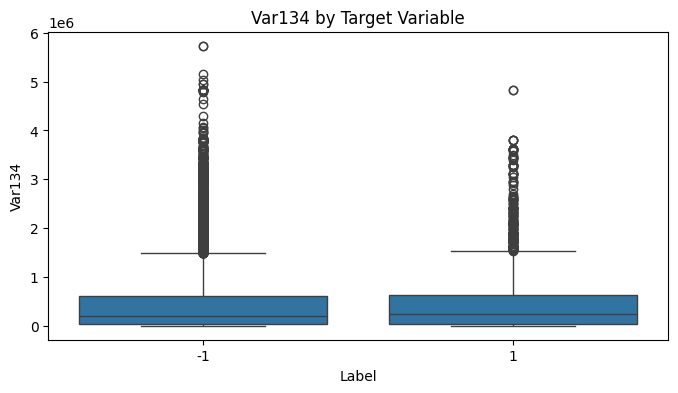

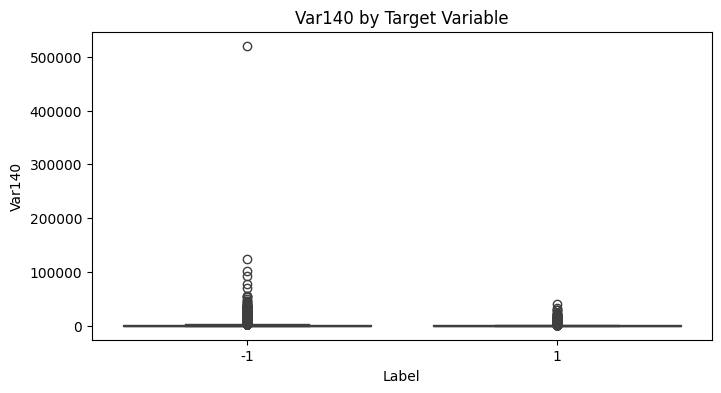

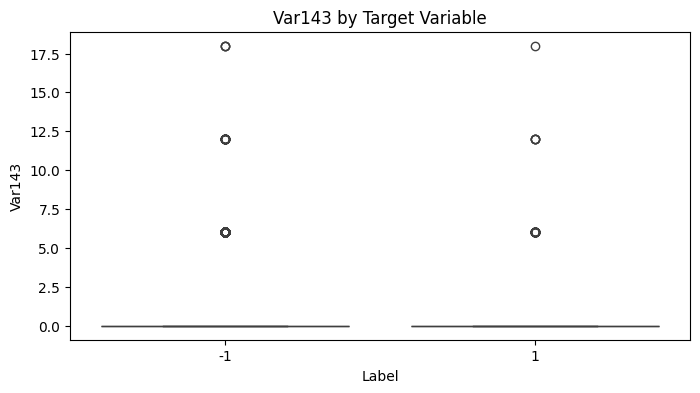

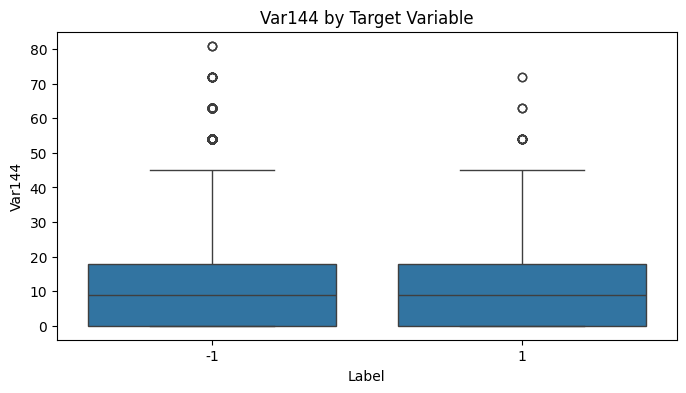

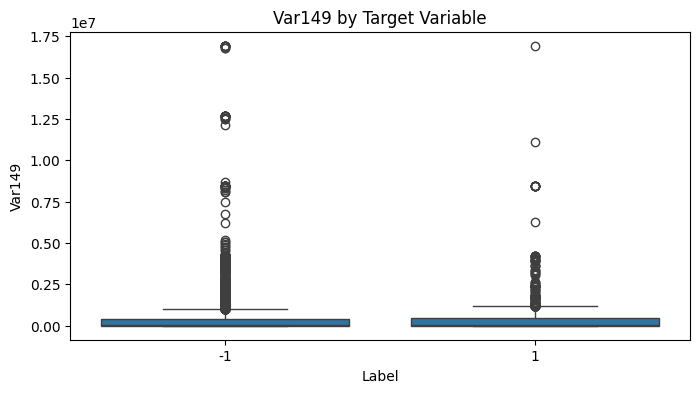

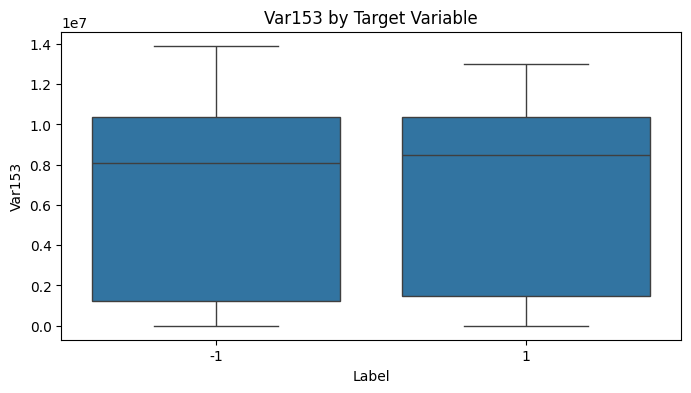

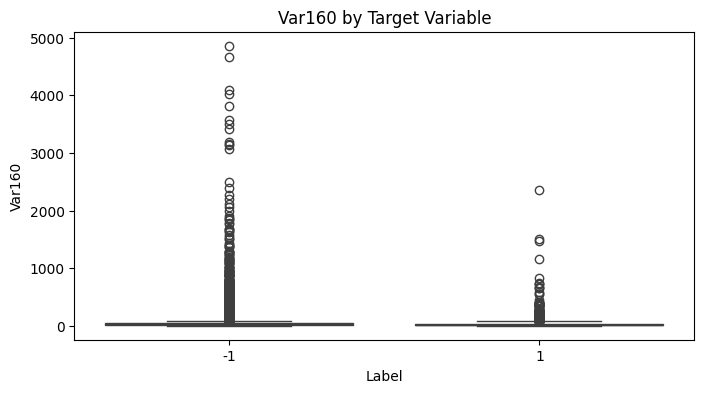

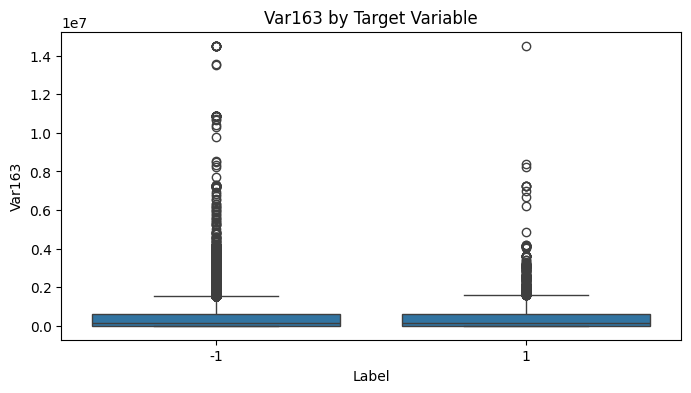

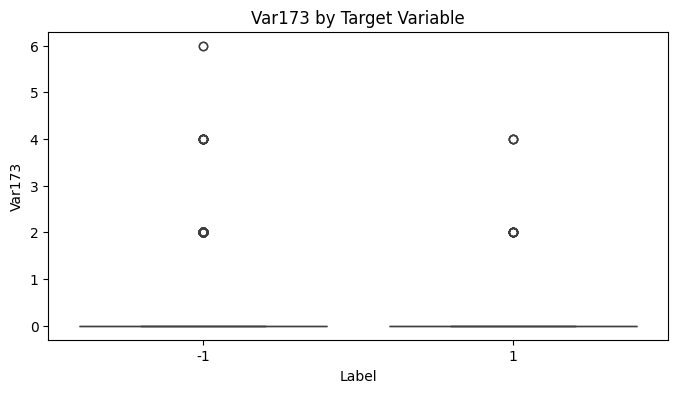

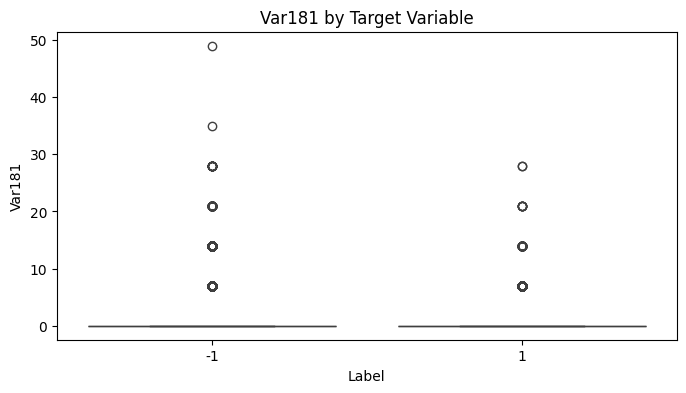

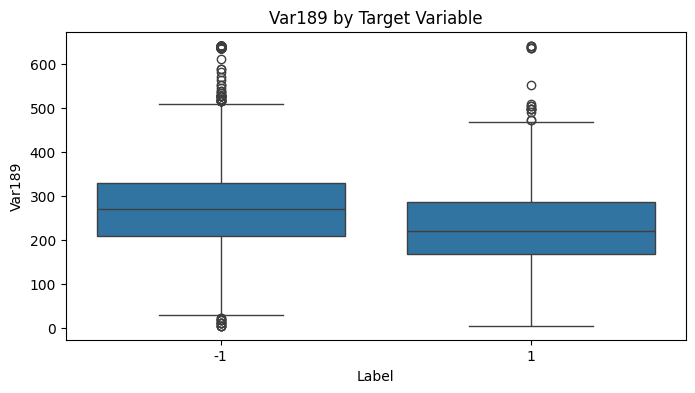

In [30]:
# Box plot of numerical features against the target variable
for column in X.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y.squeeze(), y=X[column])
    plt.title(f'{column} by Target Variable')
    plt.show()


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from scipy.sparse import issparse

class CorrelationSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold

    def fit(self, X, y=None):
        # Ensure X is a DataFrame
        if issparse(X):
            X = pd.DataFrame.sparse.from_spmatrix(X)
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_in_)

        # Compute the correlation matrix
        corr_matrix = X.corr()
        # Identify features to drop
        self.features_to_drop_ = set()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.threshold:
                    colname = corr_matrix.columns[i]
                    self.features_to_drop_.add(colname)
        return self

    def transform(self, X):
        # Ensure X is a DataFrame
        if issparse(X):
            X = pd.DataFrame.sparse.from_spmatrix(X)
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_in_)

        return X.drop(columns=self.features_to_drop_)

    def fit_transform(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns
        elif isinstance(X, np.ndarray):
            self.feature_names_in_ = [f"feature_{i}" for i in range(X.shape[1])]
        elif issparse(X):
            self.feature_names_in_ = [f"feature_{i}" for i in range(X.shape[1])]
        return self.fit(X, y).transform(X)




# Preprocessing for Numerical Data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for Categorical Data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Combine Preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Model
model = RandomForestClassifier(random_state=42)

# Create the Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', CorrelationSelector(threshold=0.8)),  # Drop highly correlated features
    ('classifier', model)
])

# # Evaluate Pipeline with 10-Fold Cross-Validation
# scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')



# StratifiedKFold for Handling Class Imbalance
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate Pipeline with Stratified Cross-Validation
scores = cross_val_score(pipeline, X, y, cv=stratified_kfold, scoring='accuracy', error_score='raise')


# Print Cross-Validation Scores
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the Pipeline on the Entire Dataset
pipeline.fit(X, y)

# Example Predictions (optional)
# predictions = pipeline.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-Validation Accuracy Scores: [0.95 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94]
Mean Accuracy: 0.9409999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var51', 'Var57', 'Var65', 'Var72', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94'...
       'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204', 'Var205',
       'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var214',
       'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222',
       'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object'))])),
                ('selector', CorrelationSelector(threshold=0.8)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from scipy.sparse import issparse

class CorrelationSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold

    def fit(self, X, y=None):
        # Ensure X is a DataFrame
        if issparse(X):
            X = pd.DataFrame.sparse.from_spmatrix(X)
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_in_)

        # Compute the correlation matrix
        corr_matrix = X.corr()
        # Identify features to drop
        self.features_to_drop_ = set()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.threshold:
                    colname = corr_matrix.columns[i]
                    self.features_to_drop_.add(colname)
        return self

    def transform(self, X):
        # Ensure X is a DataFrame
        if issparse(X):
            X = pd.DataFrame.sparse.from_spmatrix(X)
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_in_)

        return X.drop(columns=self.features_to_drop_)

    def fit_transform(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns
        elif isinstance(X, np.ndarray):
            self.feature_names_in_ = [f"feature_{i}" for i in range(X.shape[1])]
        elif issparse(X):
            self.feature_names_in_ = [f"feature_{i}" for i in range(X.shape[1])]
        return self.fit(X, y).transform(X)




# Preprocessing for Numerical Data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for Categorical Data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Combine Preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Model
model = RandomForestClassifier(random_state=42)

# Create the Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', CorrelationSelector(threshold=0.8)),  # Drop highly correlated features
    ('classifier', model)
])

# # Evaluate Pipeline with 10-Fold Cross-Validation
# scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

# StratifiedKFold for Handling Class Imbalance
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate Pipeline with Stratified Cross-Validation for Multiple Metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

scores = cross_validate(pipeline, X, y, cv=stratified_kfold, scoring=scoring, error_score='raise')

# Print Cross-Validation Scores
print("Cross-Validation Scores:")
for metric in scoring.keys():
    print(f"{metric.capitalize()} Scores: {scores['test_' + metric]}")
    print(f"Mean {metric.capitalize()}: {scores['test_' + metric].mean()}")
    print(f"Standard Deviation {metric.capitalize()}: {scores['test_' + metric].std()}\n")

# Fit the Pipeline on the Entire Dataset
pipeline.fit(X, y)

# Example Predictions (optional)
# predictions = pipeline.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.

Cross-Validation Scores:
Accuracy Scores: [0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333]
Mean Accuracy: 0.9333333333333333
Standard Deviation Accuracy: 0.0

F1 Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean F1: 0.0
Standard Deviation F1: 0.0

Roc_auc Scores: [0.5        0.28571429 0.78571429 0.28571429 0.17857143 0.21428571
 0.07142857 0.10714286 0.07142857 0.28571429]
Mean Roc_auc: 0.2785714285714286
Standard Deviation Roc_auc: 0.20873770280289222

Precision Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Precision: 0.0
Standard Deviation Precision: 0.0

Recall Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Recall: 0.0
Standard Deviation Recall: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var51', 'Var57', 'Var65', 'Var72', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94'...
       'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204', 'Var205',
       'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var214',
       'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222',
       'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object'))])),
                ('selector', CorrelationSelector(threshold=0.8)),
                ('classifier', RandomForestClassifier(random_state=42))])